## Universidad del Valle de Guatemala

### Integrantes
Juan Manuel Marroquin Alfaro 19845 <br>
Carlos Alberto Raxtúm Ramos 19721 <br>
Jose Abraham Gutierrez Corado 19111 <br>
Walter Danilo Saldaña Salguero 19897 <br>
Javier Alejandro Cotto Argueta 19324 <br>

# Proyecto #1
Sección 20<br>
25/02/2022

In [1]:
import os
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import norm
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
#from yellowbrick.cluster import SilhouetteVisualizer
#from yellowbrick.datasets import load_nfl
import scipy.stats as stats
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)

Ruta global

In [3]:
dirname = os.getcwd()
dirname

'C:\\Users\\Juan\\OneDrive\\Documents\\Juan Marro\\Universidad\\UVG\\Septimo Semestre\\Mineria de Datos\\Proyecto_Mineria'

## Divorcios

### Carga del DataFrame

In [4]:
divorcios = pd.read_csv('./Archivos/divorcios.csv',low_memory=False)
divorcios

,depreg,mupreg,mesreg,anoreg,diaocu,mesocu,anoocu,depocu,mupocu,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,mever,anover,eschom,escmuj
0,Guatemala,Guatemala,Mayo,10.0,4.0,Febrero,9.0,Guatemala,Guatemala,Ignorado,Ignorado,ignorado,ignorado,Ignorado,Ignorado,Ignorado,Ignorado,Enero,2000.0,NaN,NaN
1,Guatemala,Santa Catarina Pinula,Marzo,9.0,4.0,Marzo,9.0,Guatemala,Guatemala,36.0,26.0,ignorado,ignorado,Guatemala,Guatemala,Ignorado,Ignorado,Marzo,2000.0,NaN,NaN
2,Guatemala,Santa Catarina Pinula,Abril,9.0,4.0,Marzo,9.0,Guatemala,Guatemala,36.0,26.0,ignorado,ignorado,Guatemala,Guatemala,Ignorado,Ignorado,Marzo,2000.0,NaN,NaN
3,Chimaltenango,Chimaltenango,Julio,9.0,4.0,Mayo,9.0,Guatemala,Guatemala,Ignorado,29.0,ignorado,ignorado,Guatemala,Guatemala,Ignorado,Ignorado,Marzo,2000.0,NaN,NaN
4,Guatemala,Petapa,Junio,9.0,5.0,Mayo,9.0,Guatemala,Guatemala,33.0,34.0,no indigena,no indigena,Guatemala,Guatemala,Estudiante,Secretarios administrativos y ejecutivos,Abril,2000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60621,Sacatepequez,Antigua Guatemala,Diciembre,2011.0,12.0,Septiembre,2011.0,Sacatepequez,Antigua Guatemala,Ignorado,Ignorado,No indigena,No indigena,Guatemala,Estados Unidos de América,Ignorado,Ignorado,NaN,NaN,Ignorado,Ignorado
60622,Suchitepequez,Mazatenango,Julio,2011.0,27.0,Mayo,2011.0,Suchitepequez,Mazatenango,49.0,Ignorado,No indigena,Ignorado,Guatemala,Estados Unidos de América,Agricultores y trabajadores calificados de cul...,Secretarios (general),NaN,NaN,Universitario,Ignorado
60623,Solola,Panajachel,Diciembre,2011.0,1.0,Diciembre,2011.0,Solola,Sololá,Ignorado,Ignorado,Ignorado,Ignorado,Estados Unidos de América,Estados Unidos de América,Ignorado,Ignorado,NaN,NaN,Ignorado,Ninguna
60624,Solola,Santa Cruz la Laguna,Enero,2012.0,5.0,Diciembre,2011.0,Solola,Santa Cruz la Laguna,47.0,49.0,No indigena,No indigena,Francia,Estados Unidos de América,"Filósofos, historiadores y especialistas en ci...",Especialistas en tratamientos de belleza y afines,NaN,NaN,Universitario,Universitario


### Eliminacion de datos que no contienen los valores de eschom y escmuj, eliminacion de las columnas mever y anover y eliminacion de filas que contienen mas de algun valor NaN

In [5]:
drop_rows = []
for i in range(0, 3006):
    drop_rows.append(i)
    
divorcios = divorcios.drop(drop_rows)

In [6]:
divorcios = divorcios.drop(['mever', 'anover'], axis=1)

In [7]:
divorcios = divorcios.dropna()

#### Convertir datos str a int

In [8]:
divorcios = divorcios.astype({"anoreg": int})
divorcios = divorcios.astype({"diaocu": int})
divorcios = divorcios.astype({"anoocu": int})
divorcios['edadhom'] = pd.to_numeric(divorcios['edadhom'],errors='coerce', downcast="integer")
divorcios['edadmuj'] = pd.to_numeric(divorcios['edadmuj'],errors='coerce', downcast="integer")

<ul>
  <li>Numero de datos: 40959</li>
  <li>Numero de variables: 19</li>
</ul>

<b>Descripcion de las variables:</b>
<ol>
    <li><p style="color:blue">depreg:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">mupreg:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">mesreg:</p>Cualitativa Nominal</li>
    <li><p style="color:red">anoreg:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">diaocu:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">mesocu:</p>Cualitativa Nominal</li>
    <li><p style="color:red">anoocu:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">depocu:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">mupocu:</p>Cualitativa Nominal</li>
    <li><p style="color:red">edadhom:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">edadmuj:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">puehom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">puemuj:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">nachom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">nacmuj:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">ciuohom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">ciuomuj:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">eschom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">escmuj:</p>Cualitativa Nominal</li>
</ol>

### Grafica de barras para el conteo de las clasificaciones de las variables cualitativas, en orden descendente

In [9]:
divorcios_cualitativos = divorcios.drop(['anoreg', 'diaocu', 'anoocu', 'edadhom', 'edadmuj'], axis=1)
columnas = []

for col in divorcios_cualitativos.columns:
    columnas.append(col)

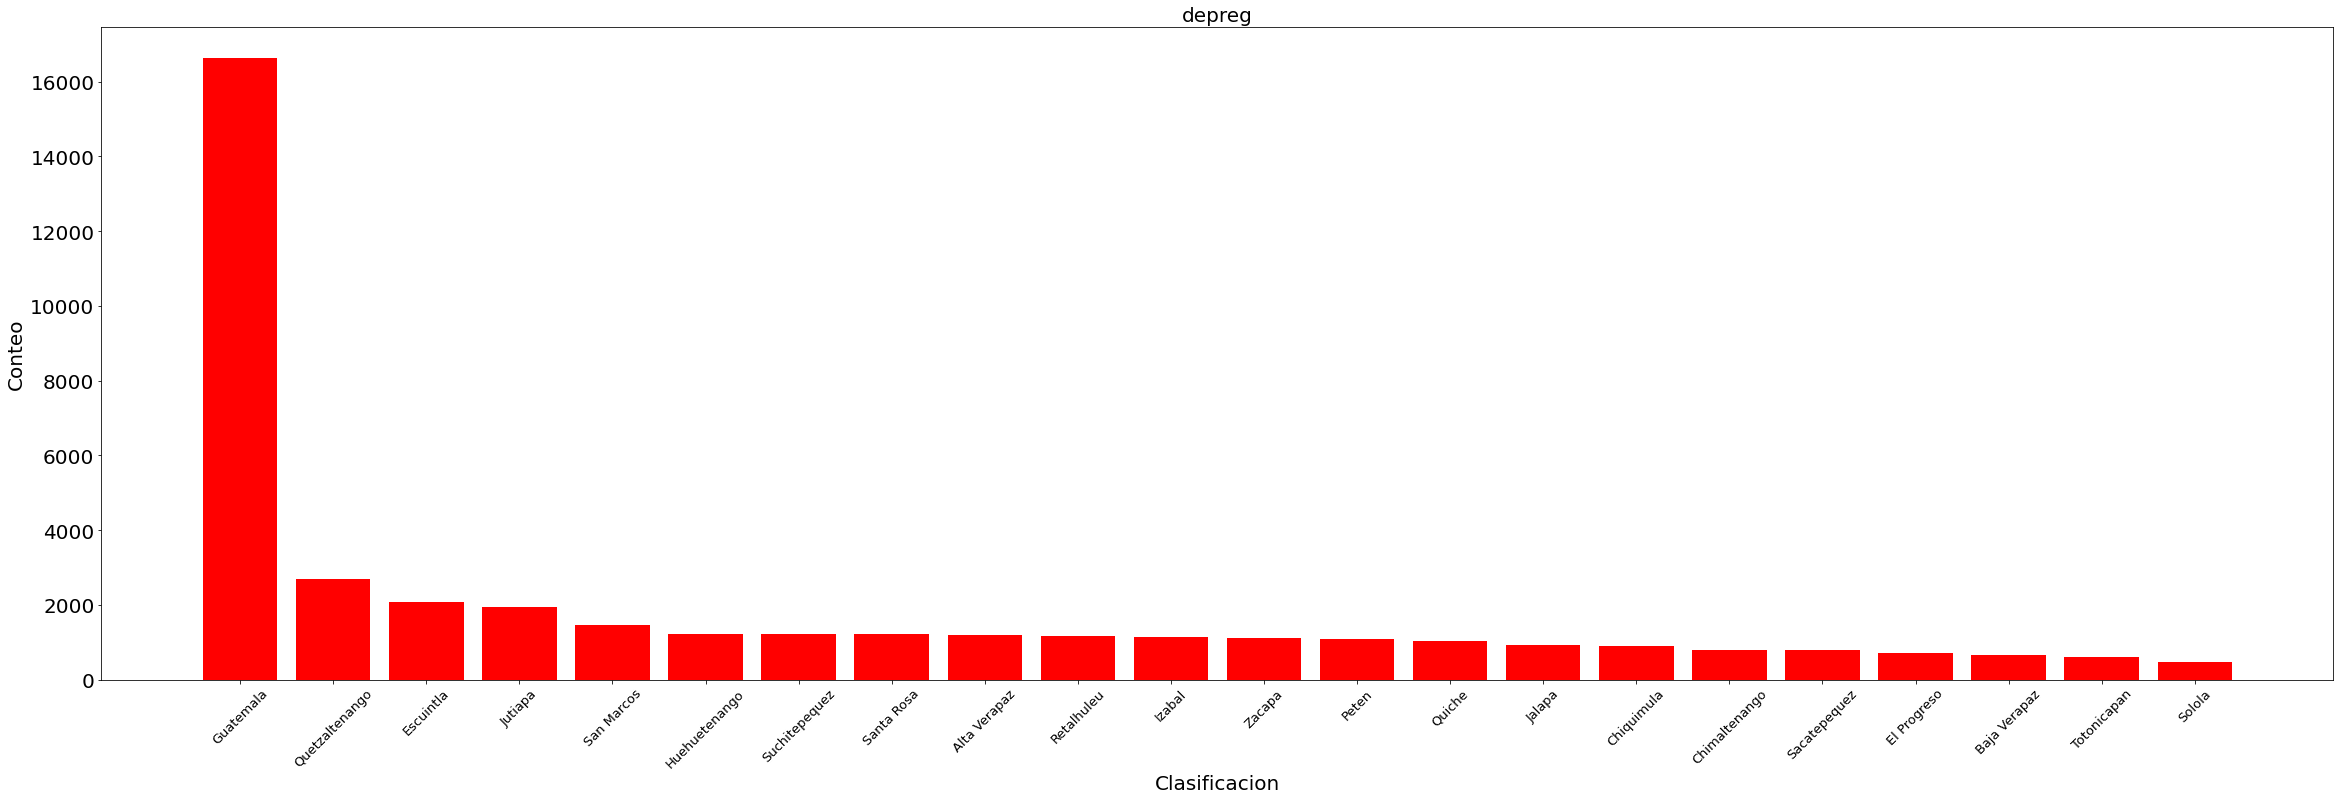

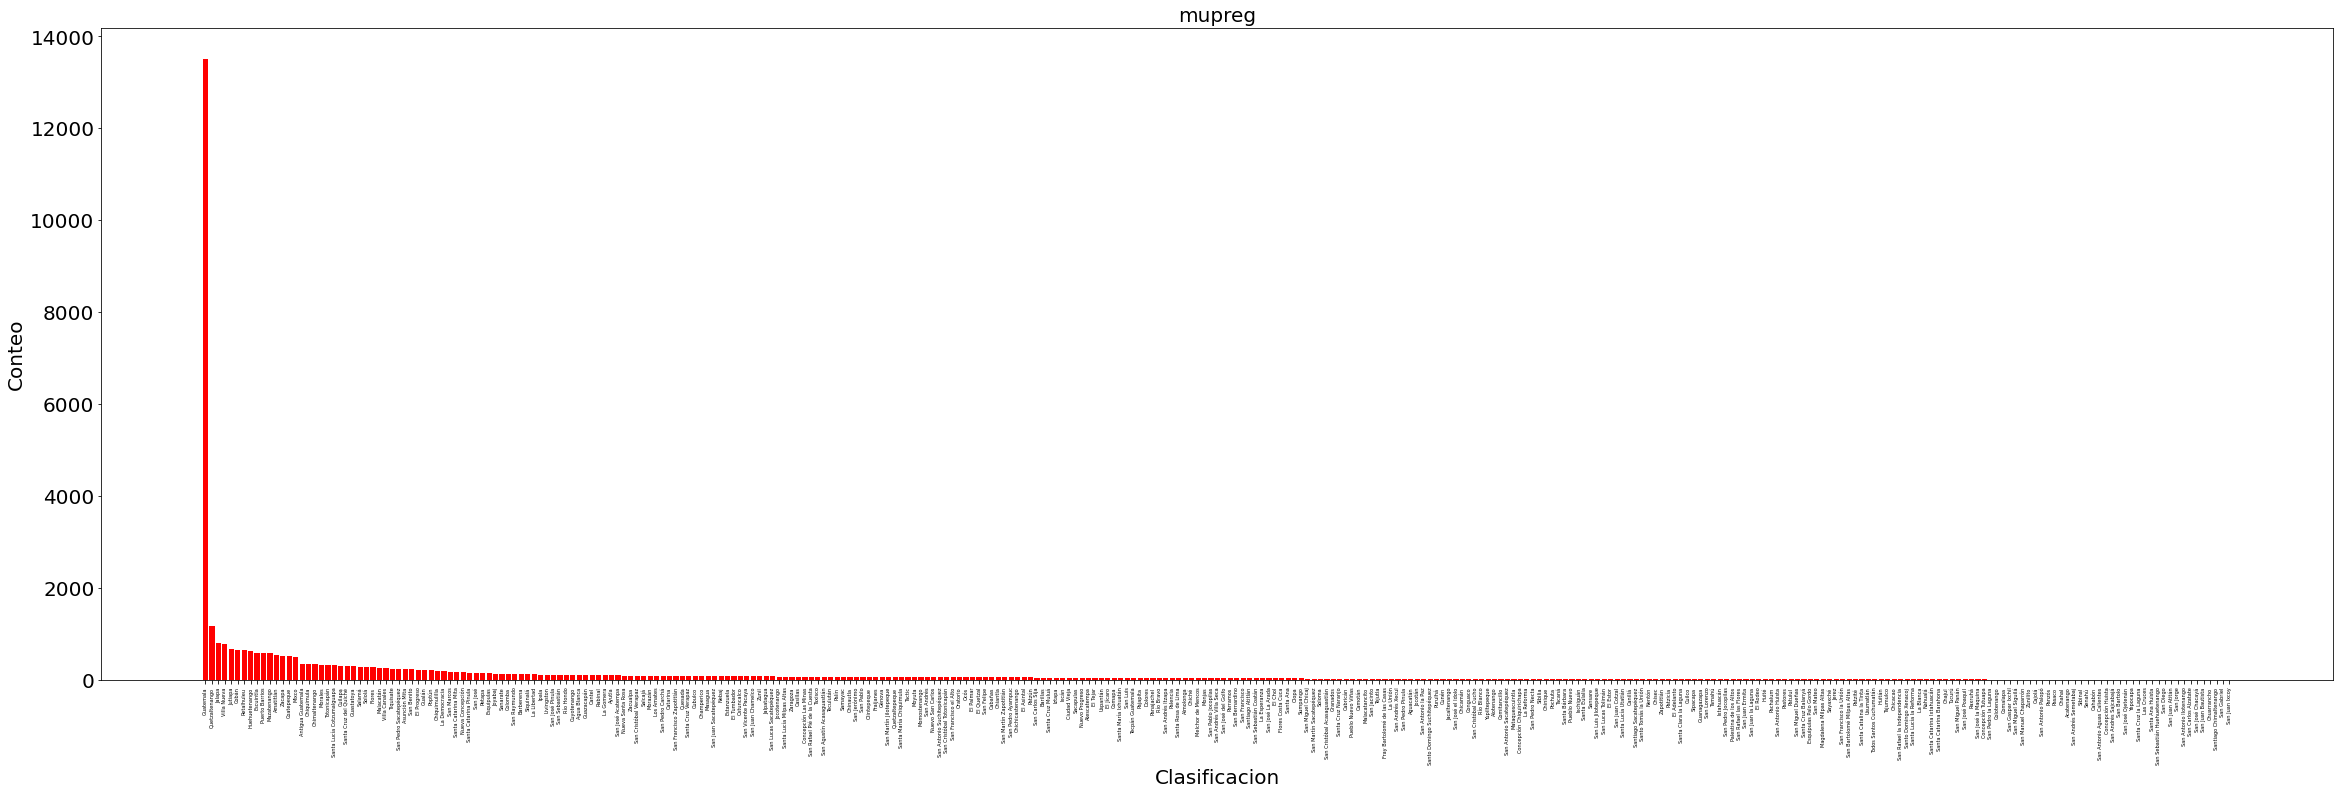

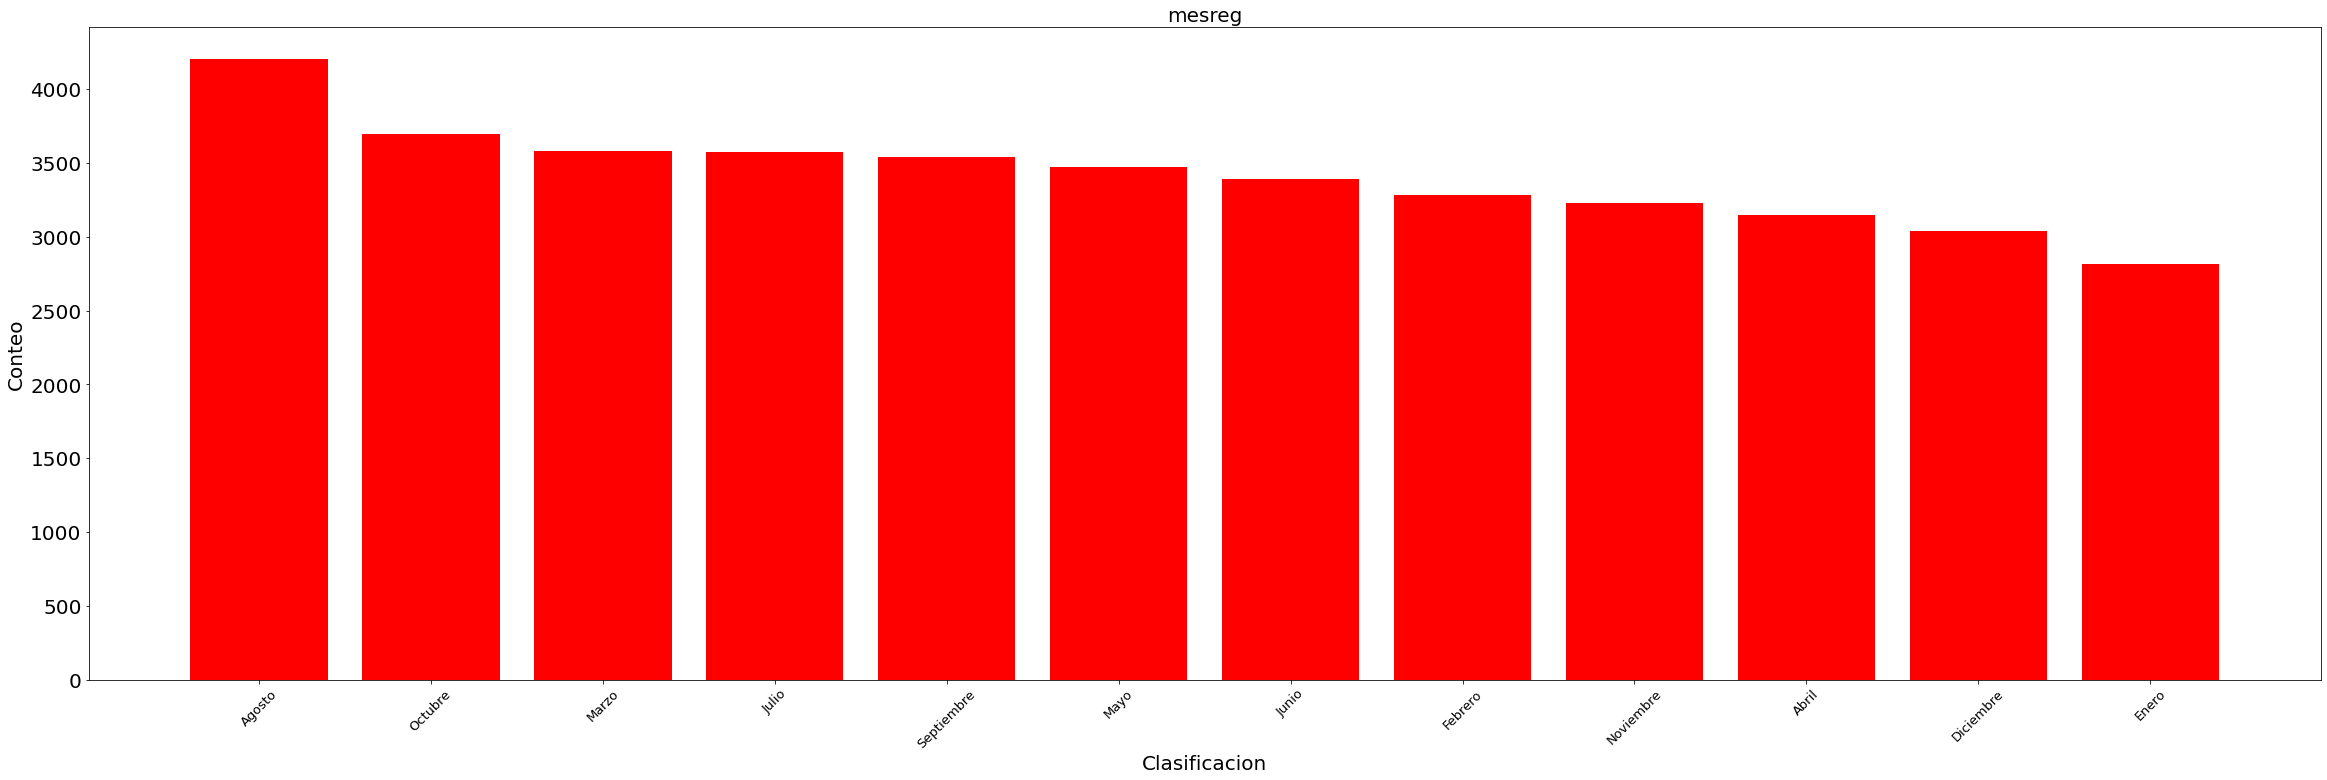

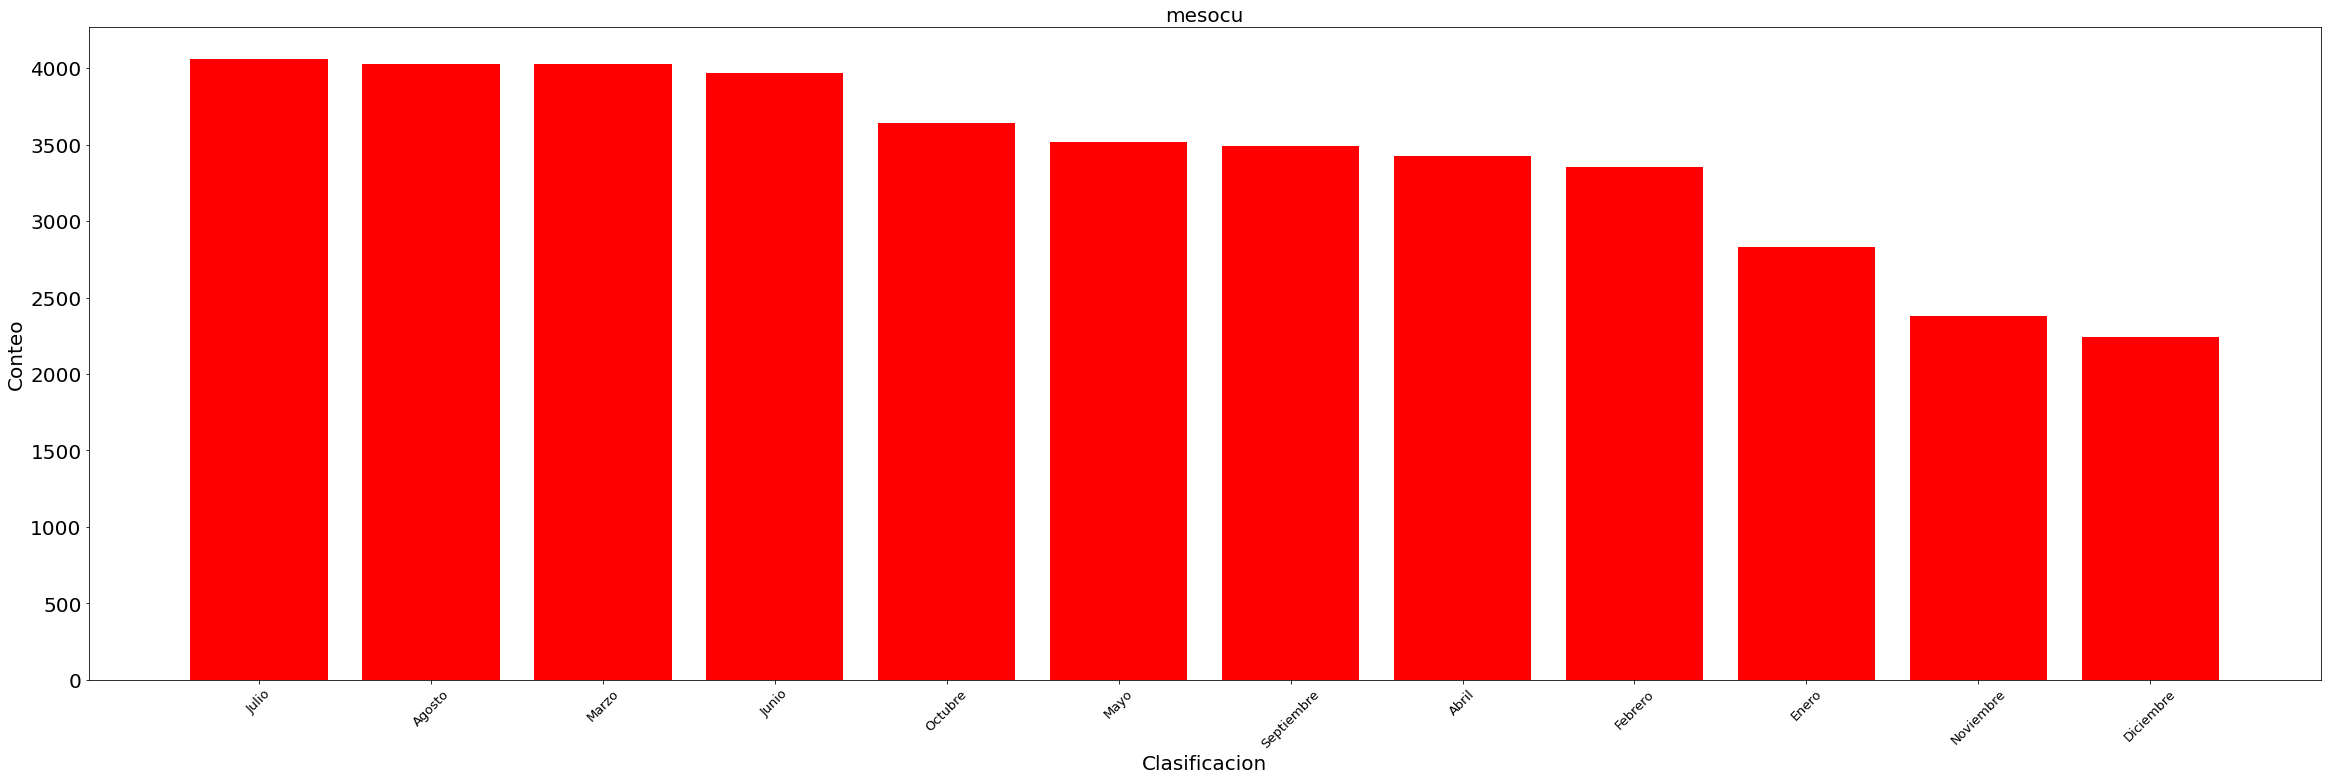

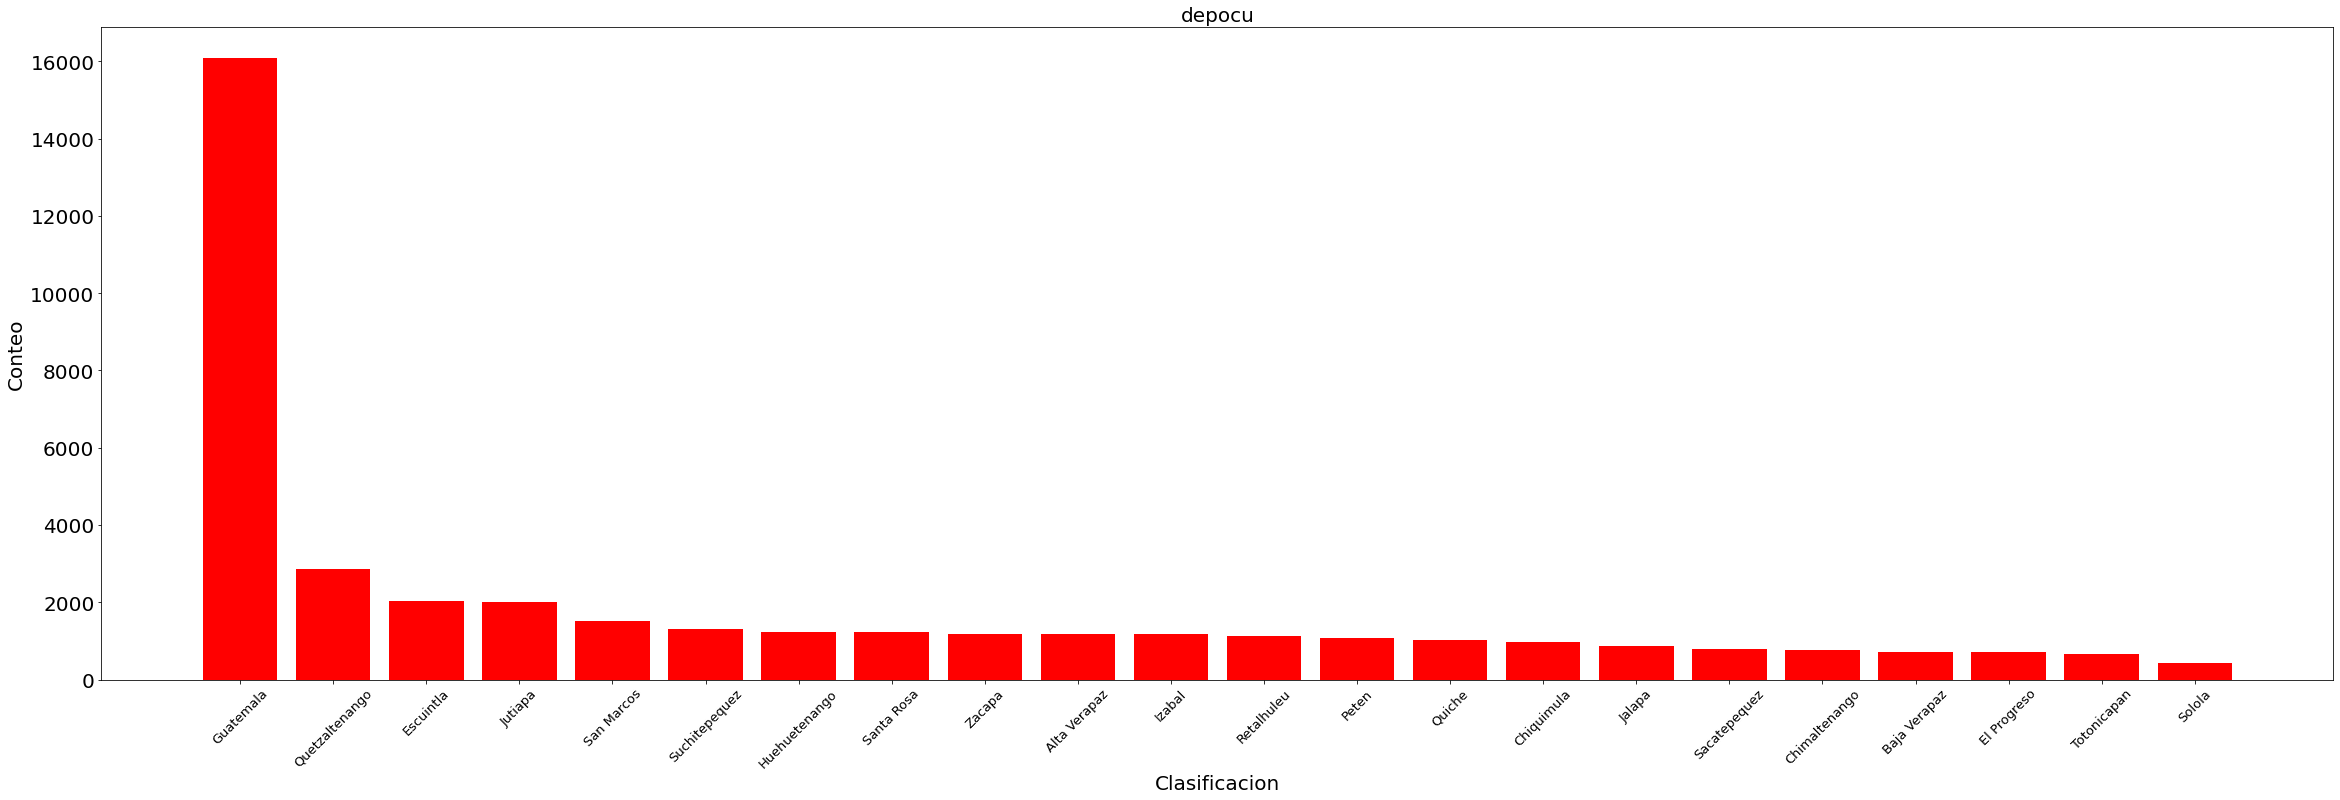

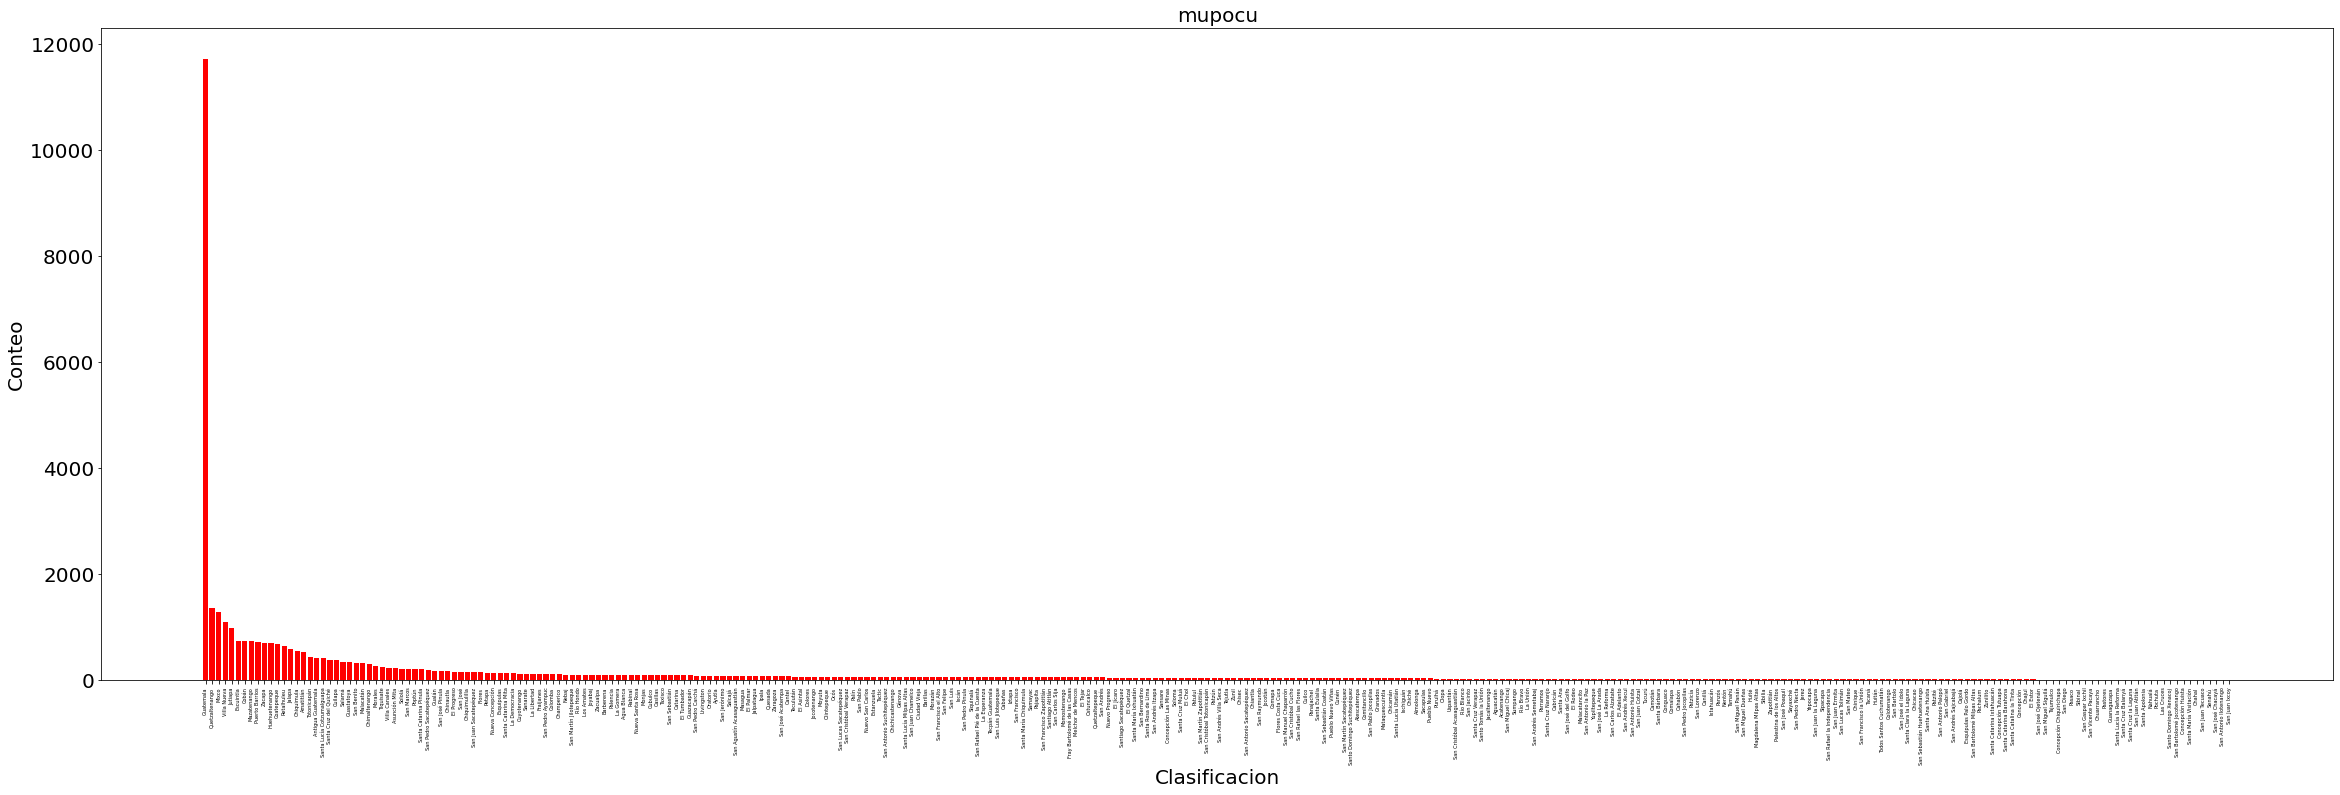

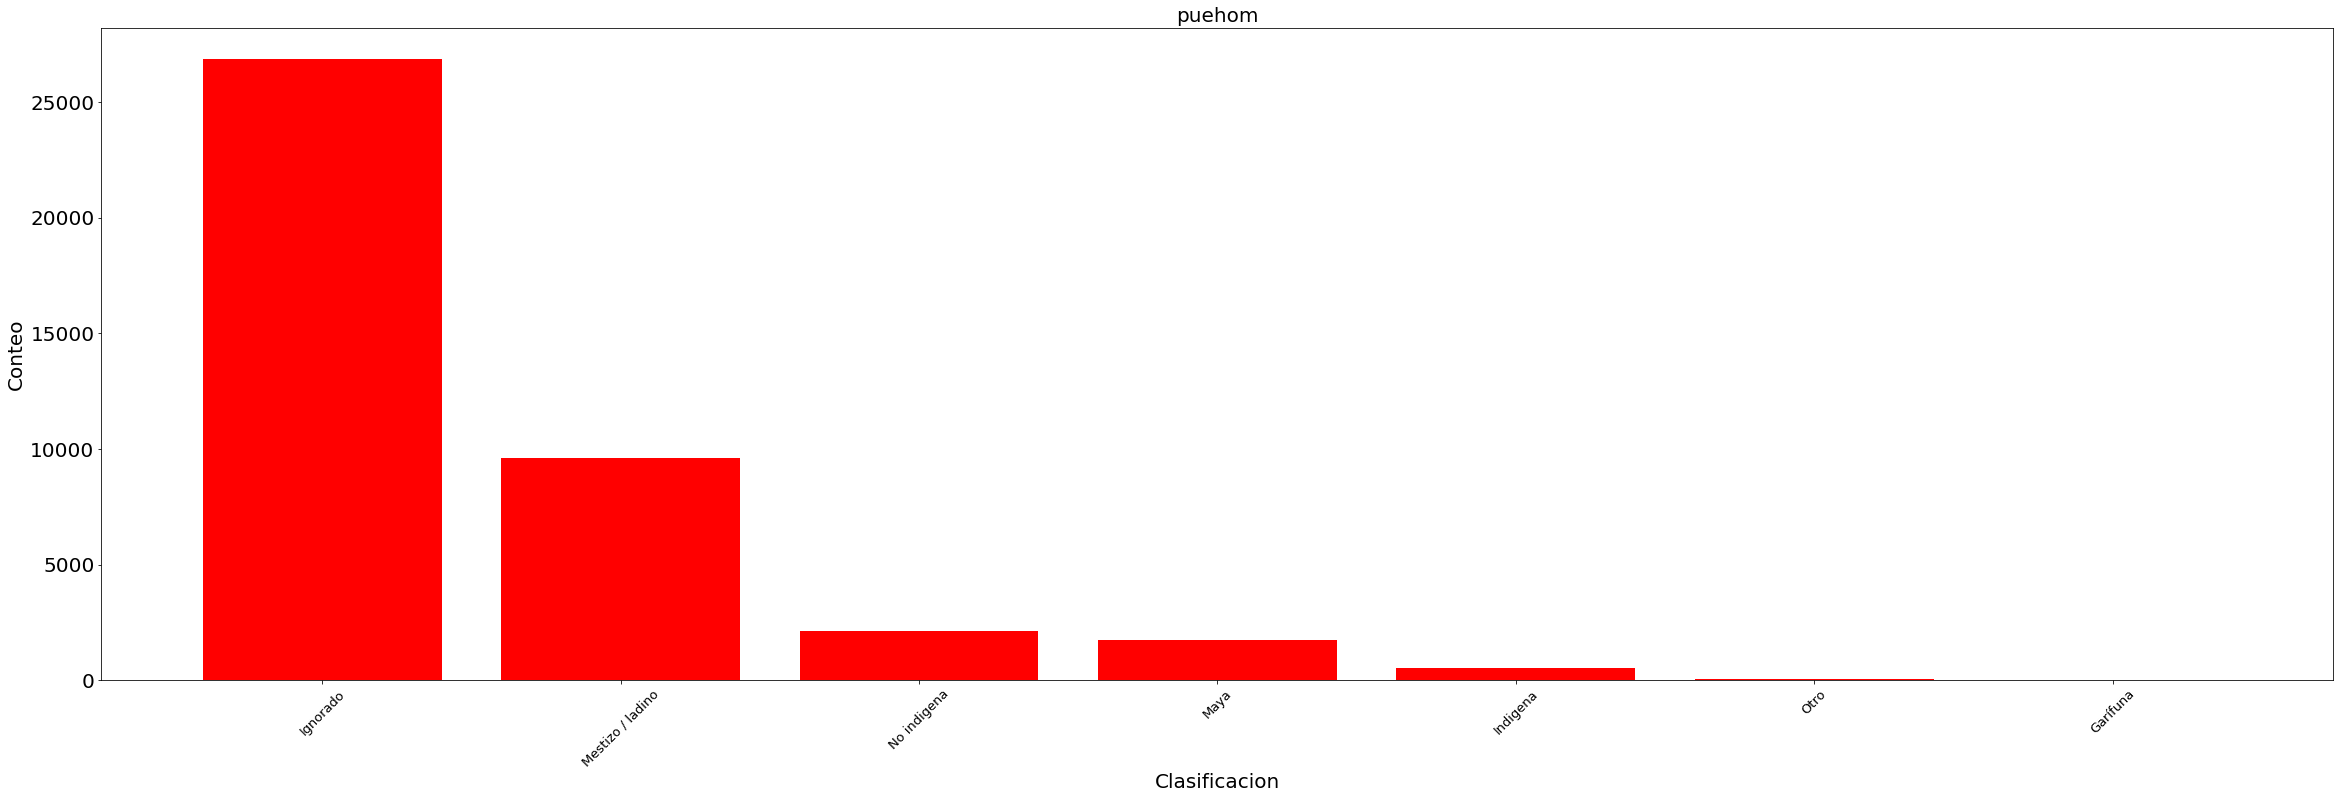

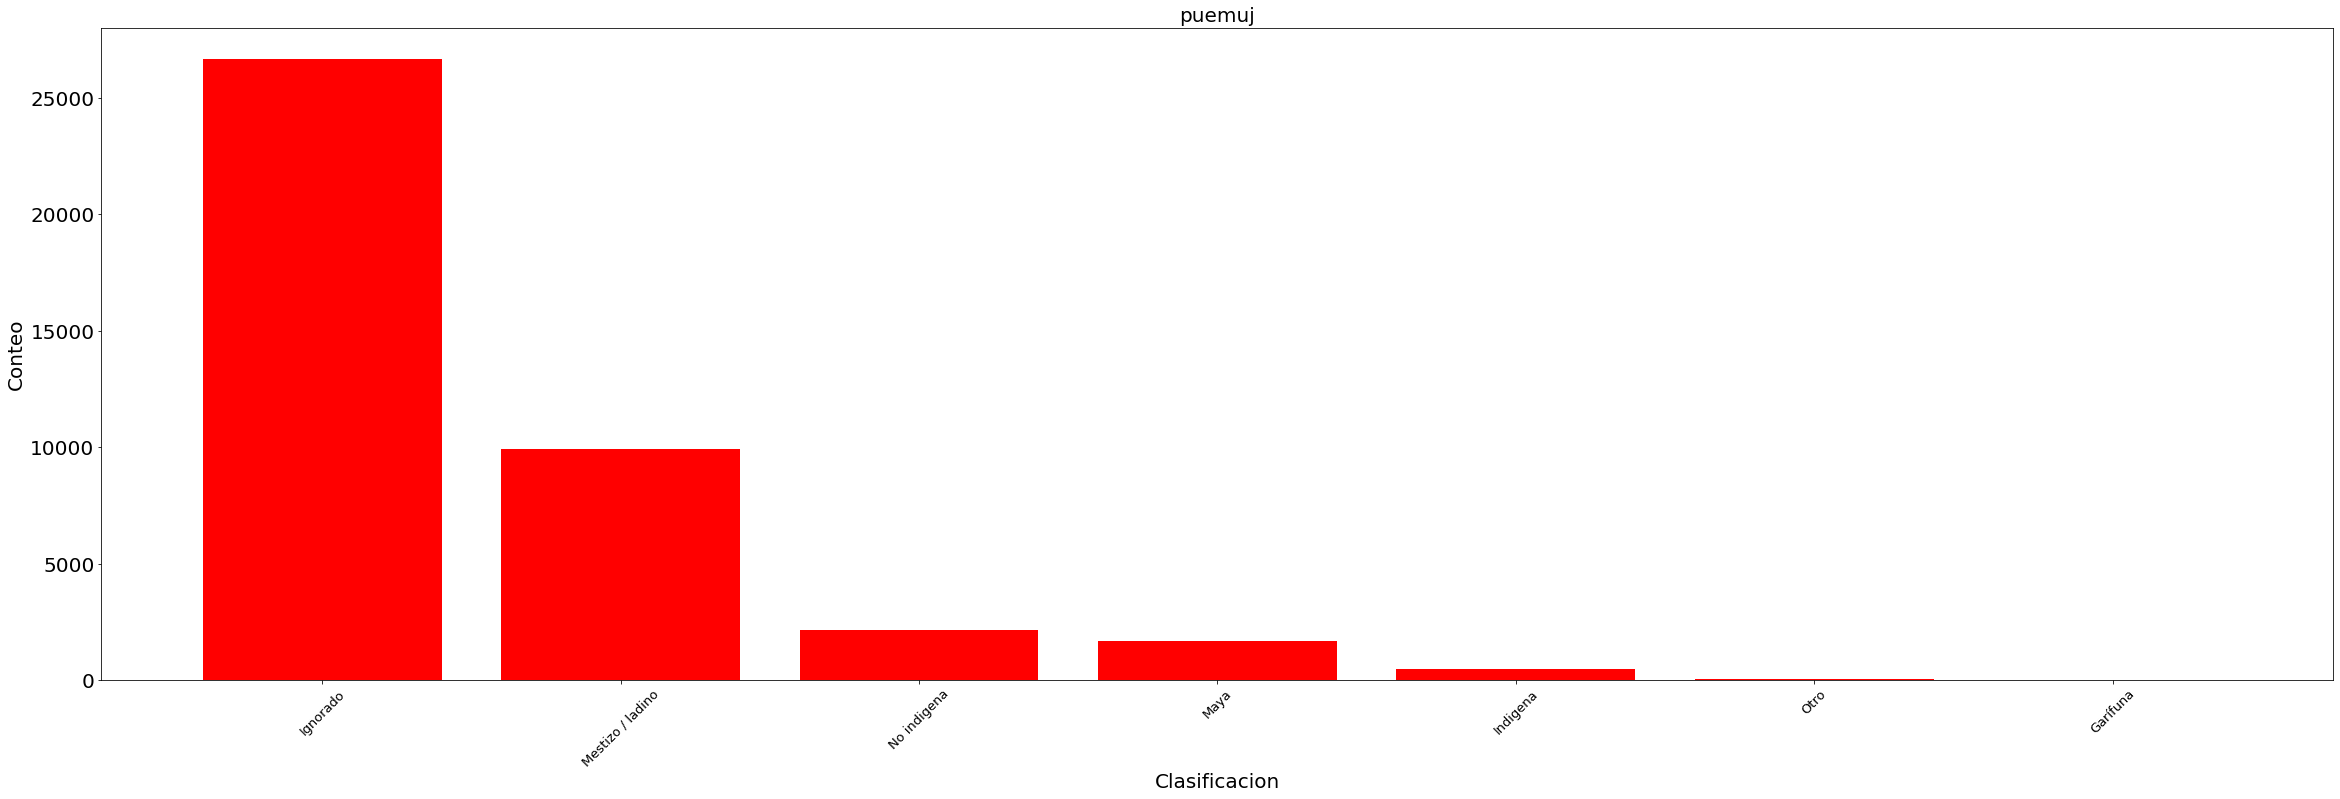

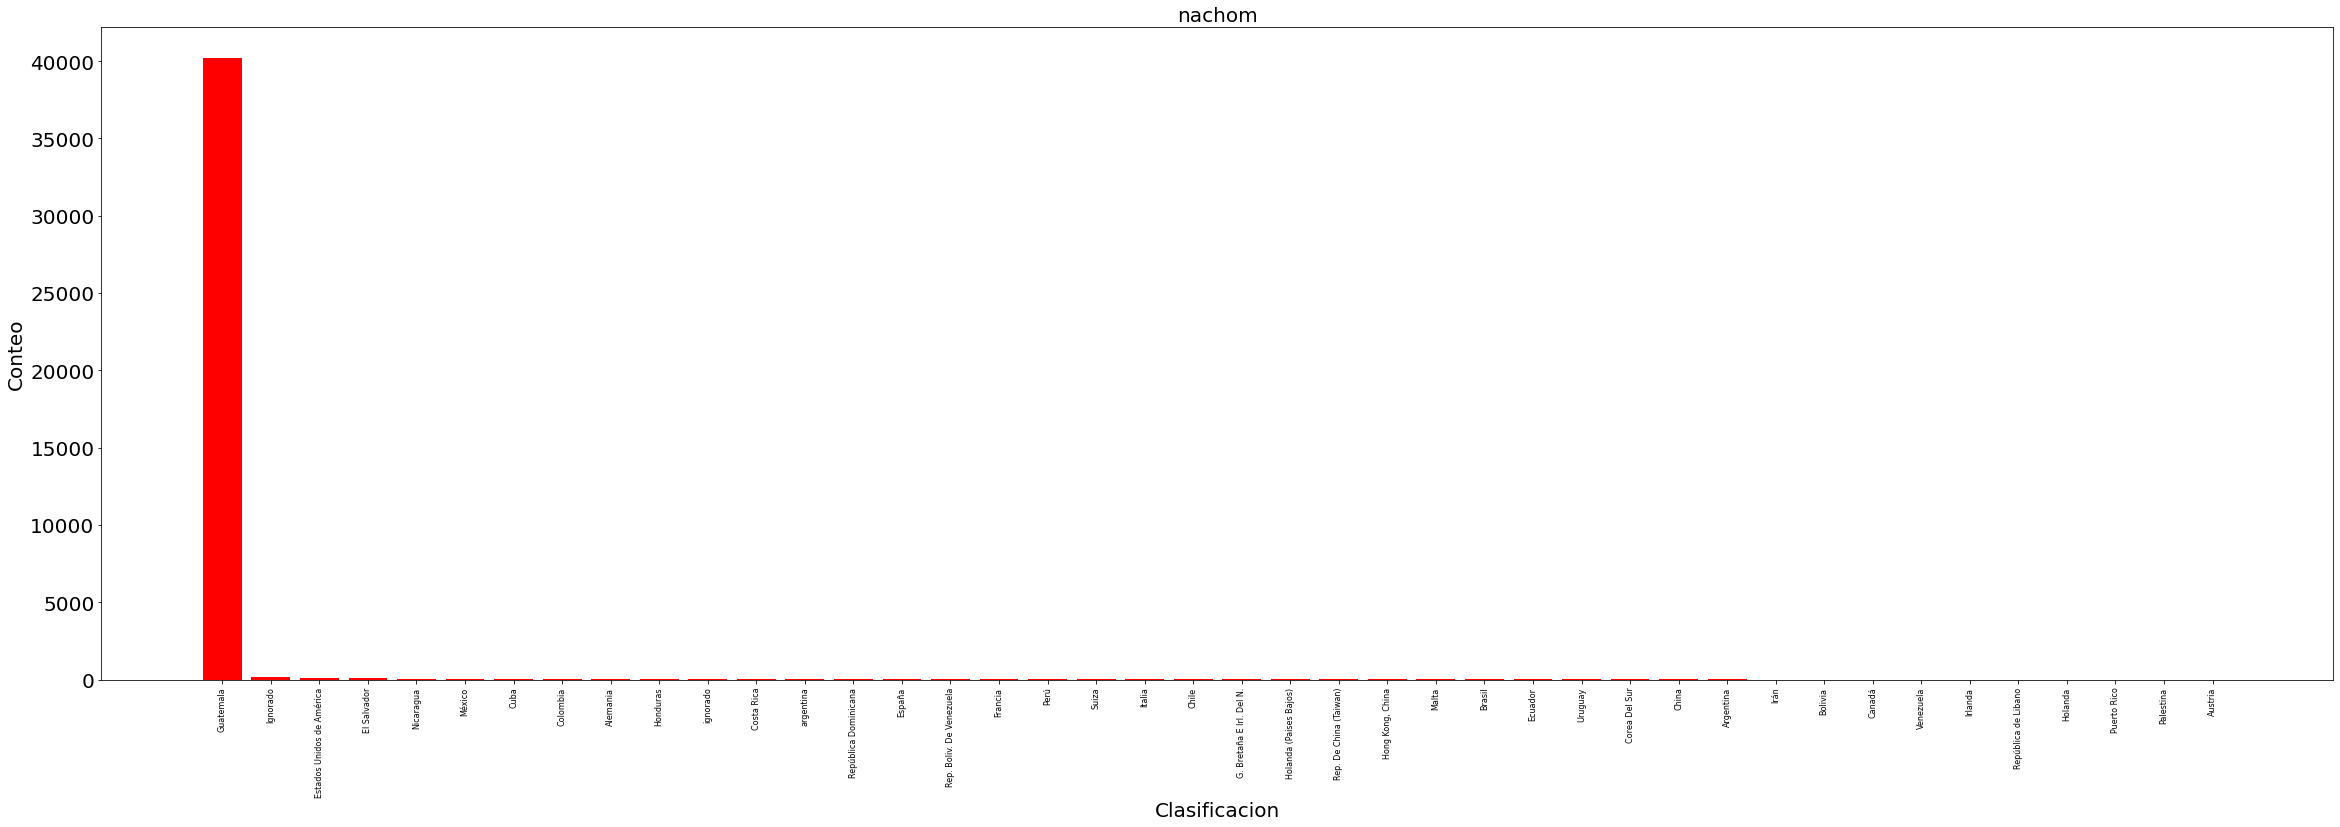

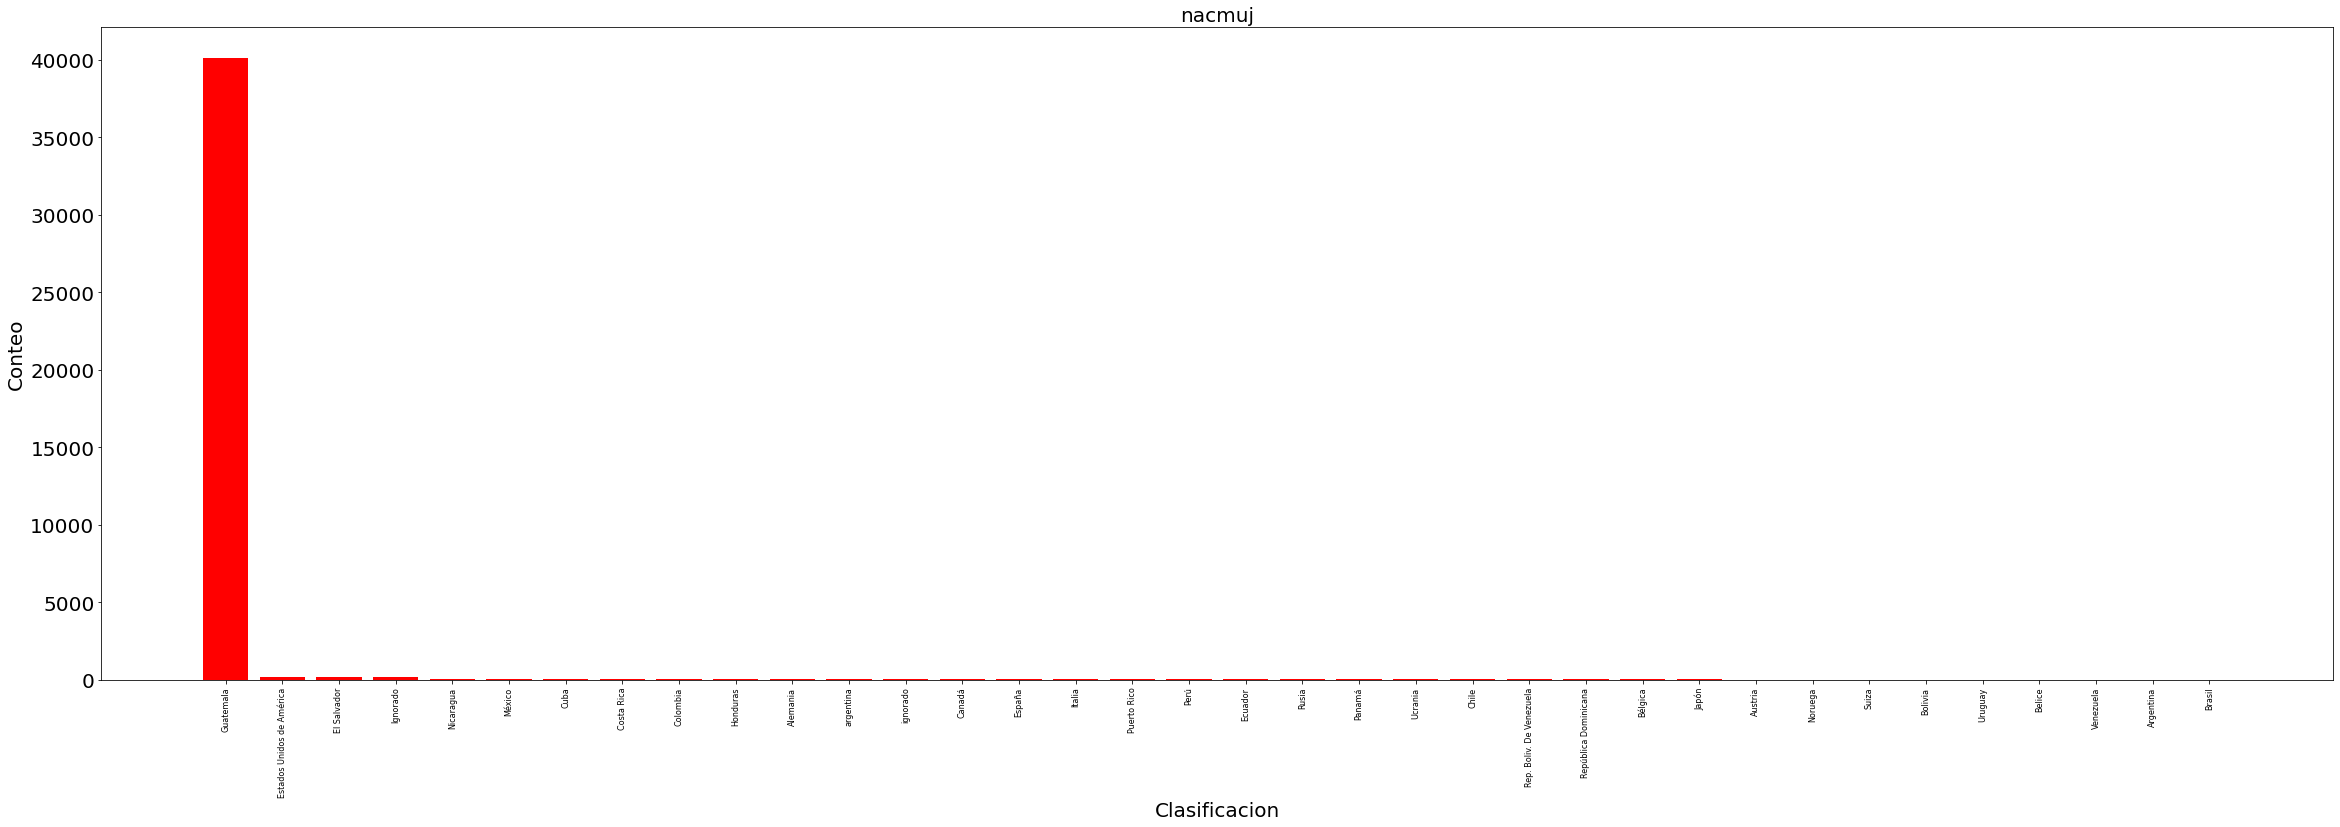

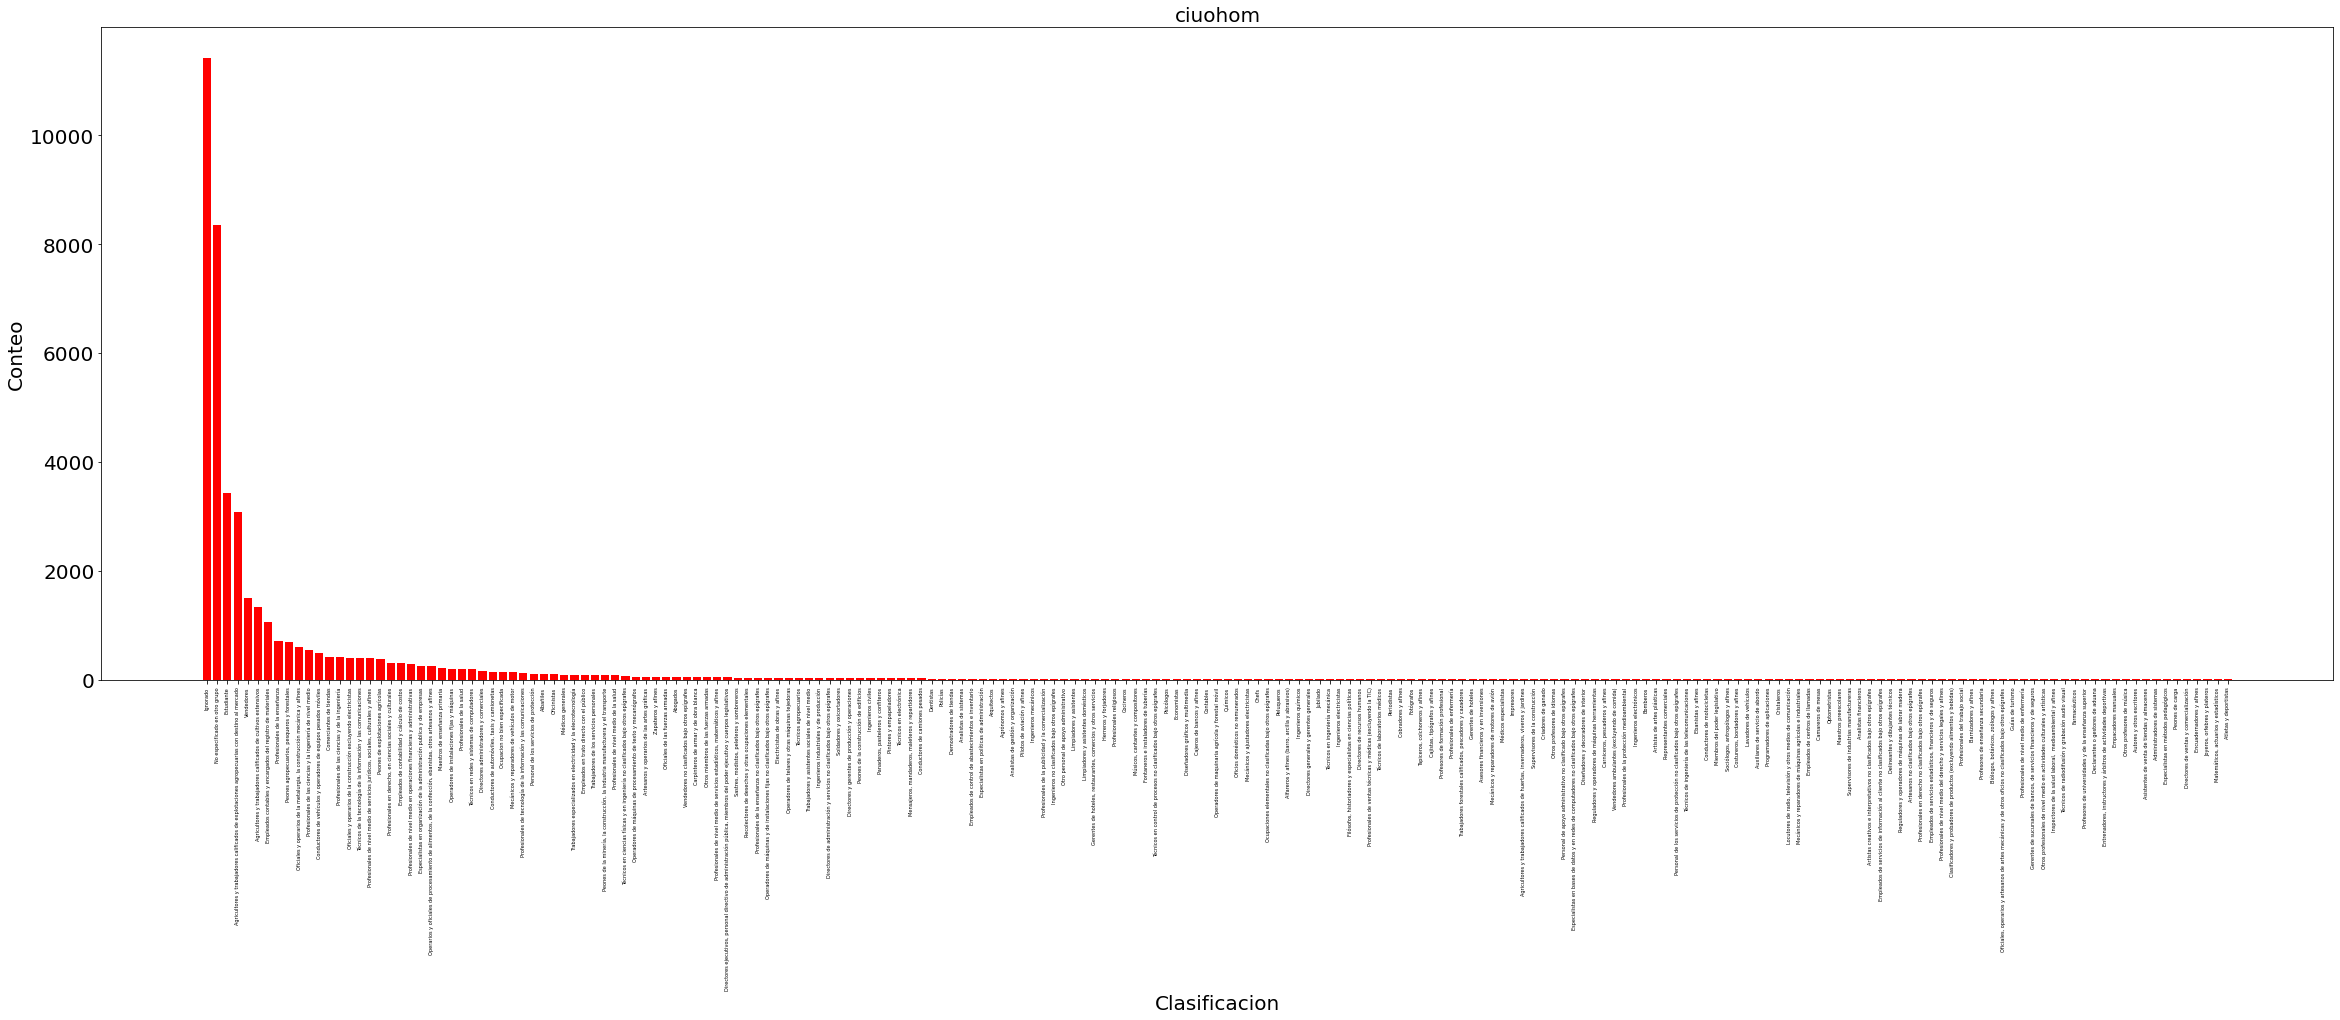

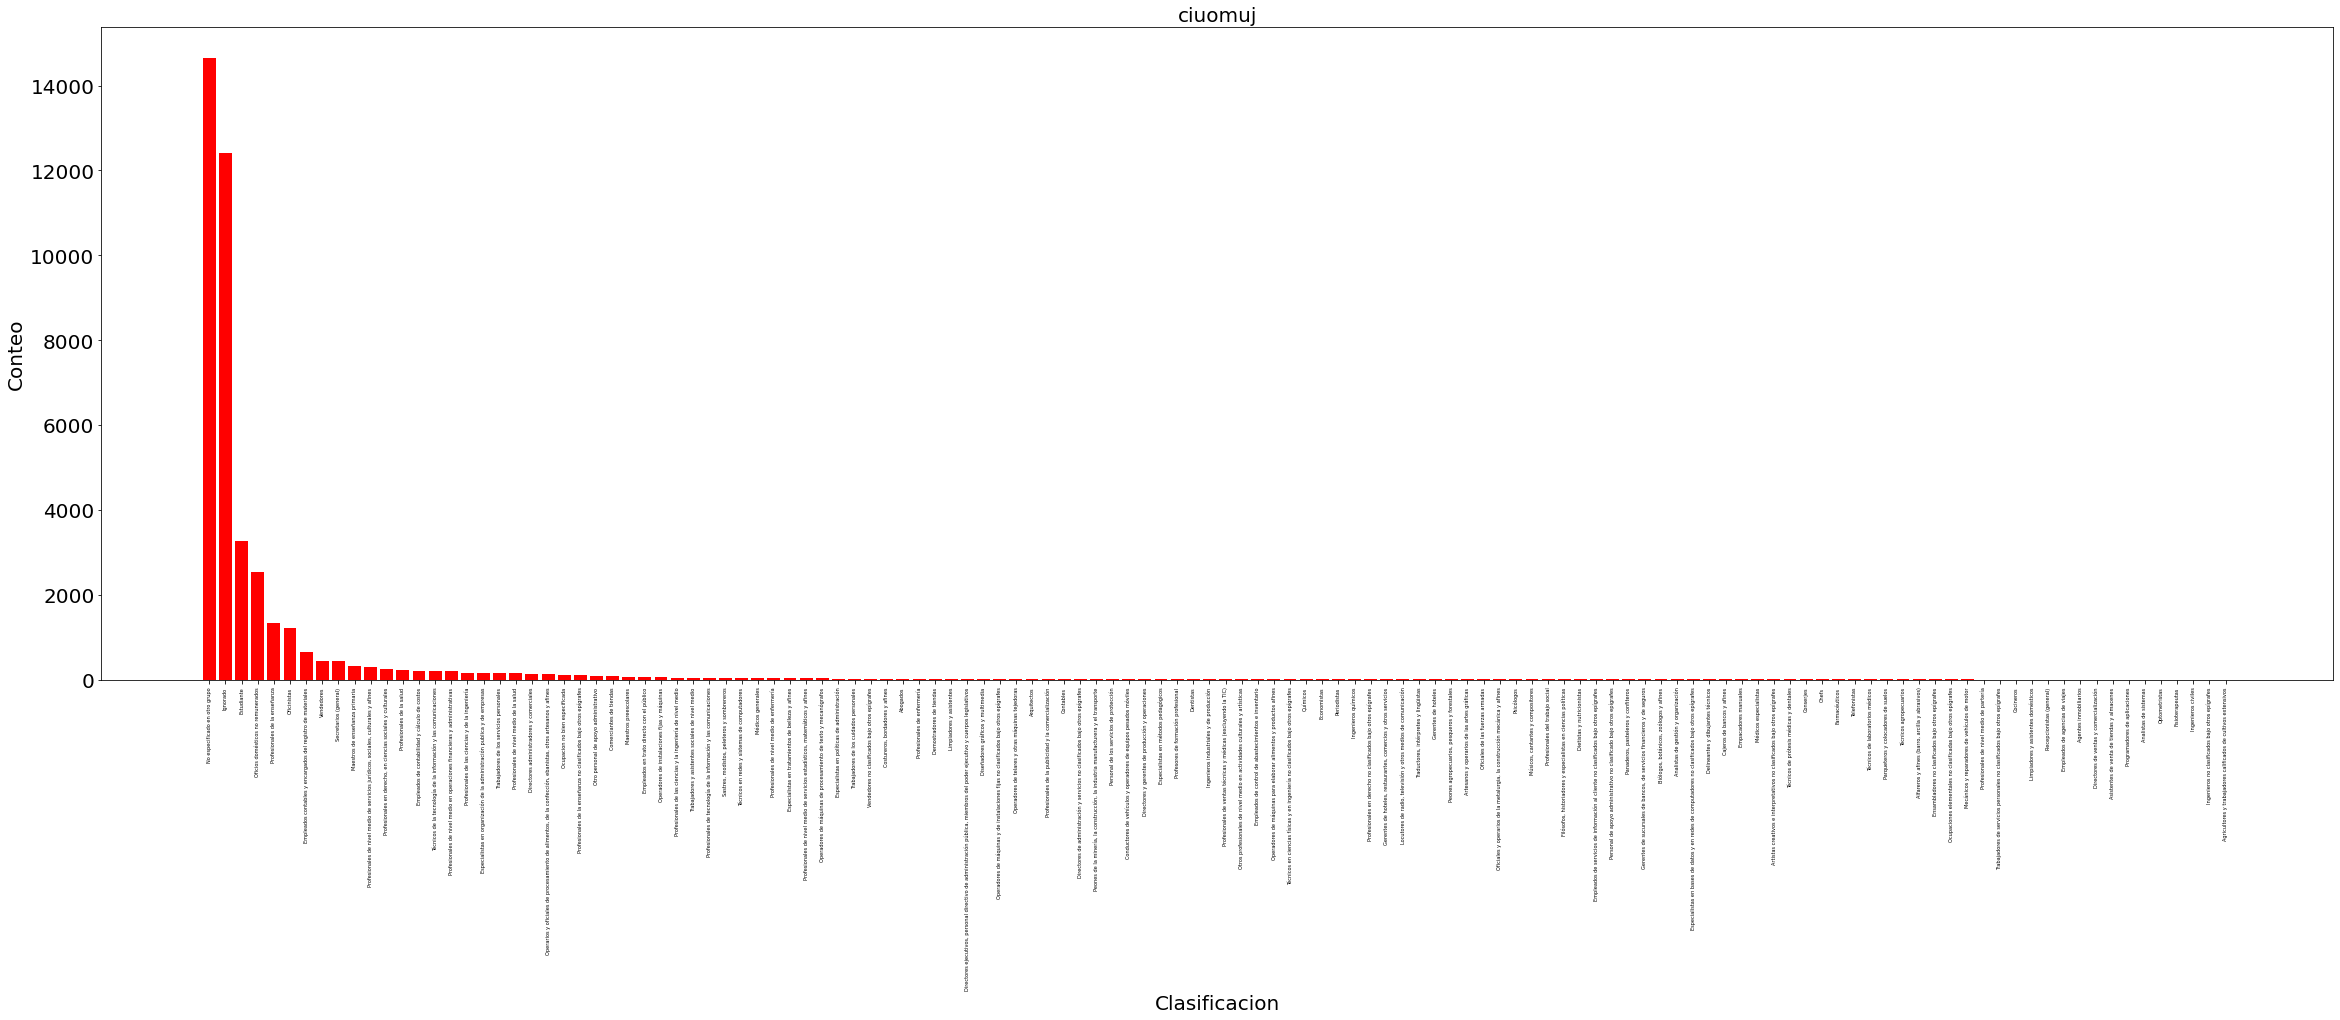

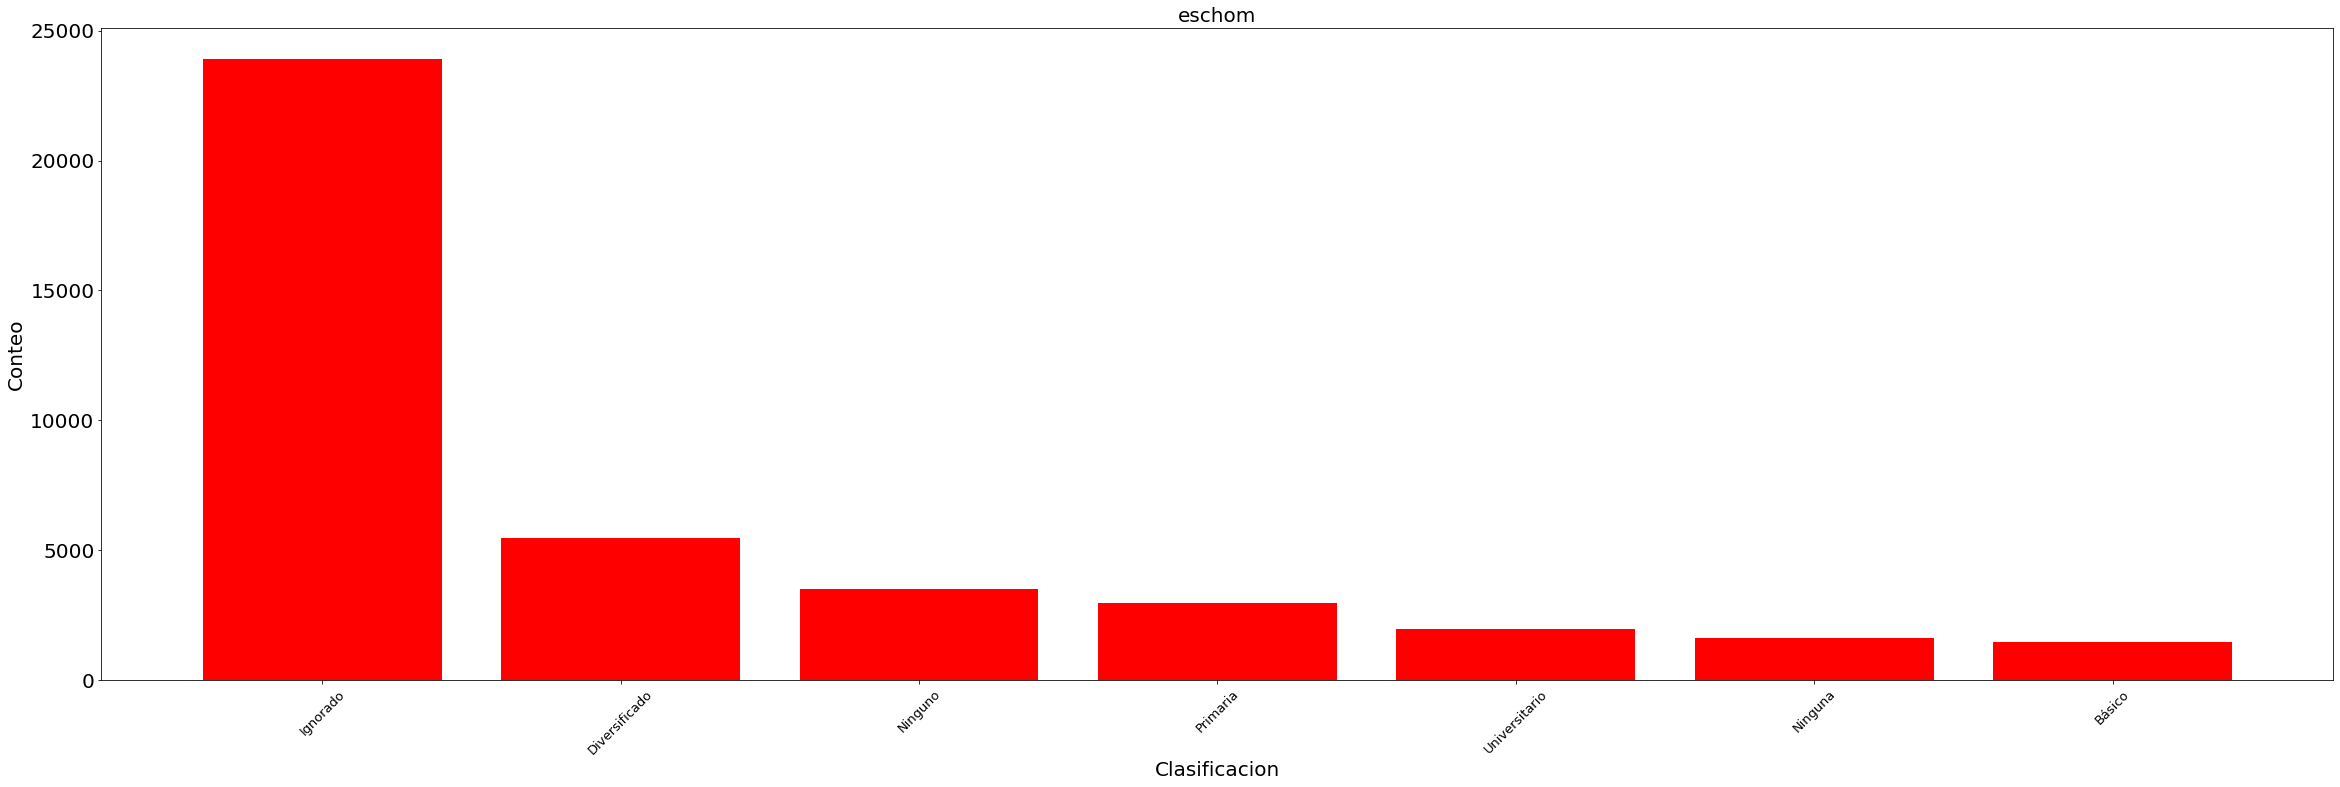

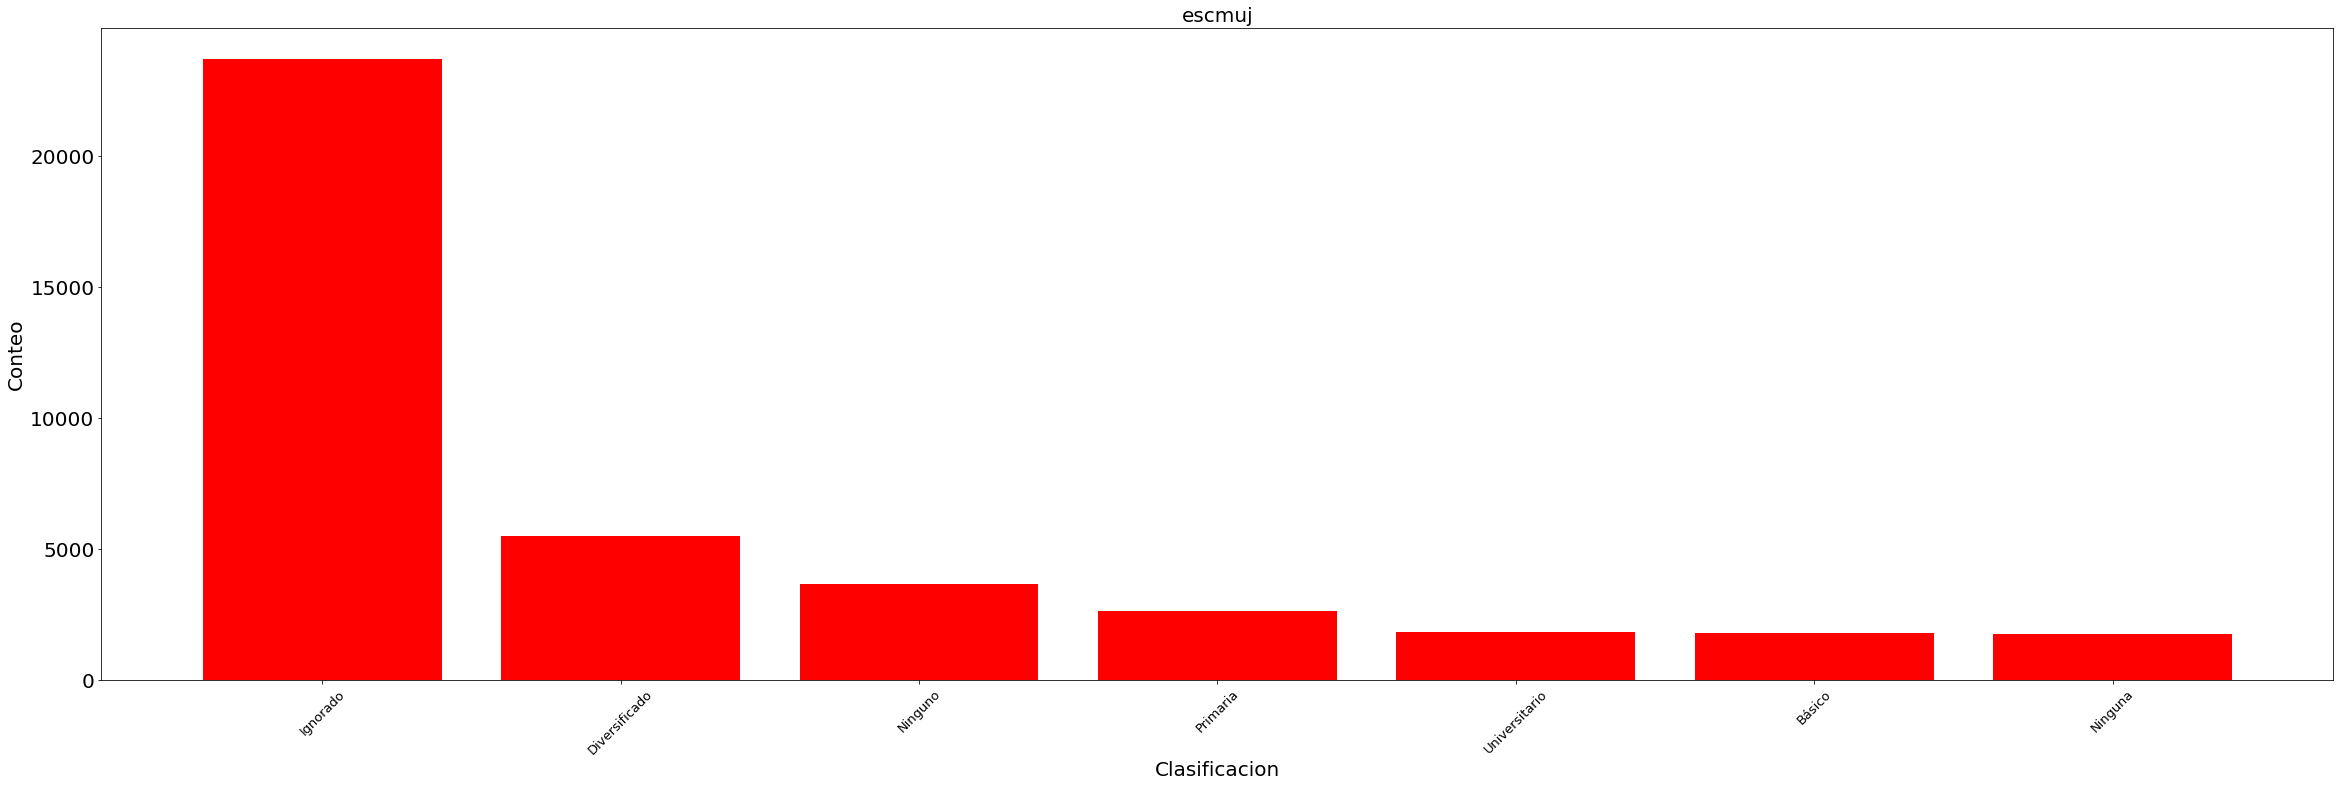

In [10]:
for columna in columnas:
    count = divorcios_cualitativos[columna].value_counts().sort_values(ascending=False).reset_index()
    count = count.rename(columns={"index": columna, columna: "Count"})
    
    if columna == 'mupreg' or columna == 'mupocu' or columna == 'ciuohom' or columna == 'ciuomuj':  
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(rotation=90, size=5)
        plt.yticks(size=20)
        plt.show()
    elif columna == 'nachom' or columna == 'nacmuj':
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(rotation=90, size=8)
        plt.yticks(size=20)
        plt.show()
    else:
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(rotation=45, size=13)
        plt.yticks(size=20)
        plt.show()

<b>Hallazgos de la gráfica de barras</b>

<ul>
    <li>La mayoria de registros y ocurrencias de divorcios sucedieron en Guatemala, Guatemala.</li>
    <li>Tanto del grupo de hombres como de mujeres, la mayoria no dieron de que grupo étnico pertenecen.</li>
    <li>Tanto del grupo de hombres como de mujeres, como segundo lugar las personas estaban en Diversificado.</li>
    <li>Tanto del grupo de hombres como de mujeres, como tercer lugar las personas eran estudiantes.</li>
</ul>

### Tablas de frecuencias de variables cuantitativas

In [11]:
divorcios_cuantitativos = divorcios[['anoreg', 'diaocu', 'anoocu', 'edadhom', 'edadmuj']]
columnas = []

for col in divorcios_cuantitativos.columns:
    columnas.append(col)

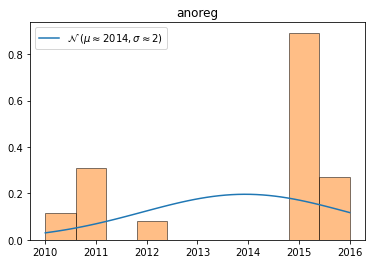

anoreg Kurtosis:  -0.9797271666687228
anoreg Sesgo:  -0.849826992530051


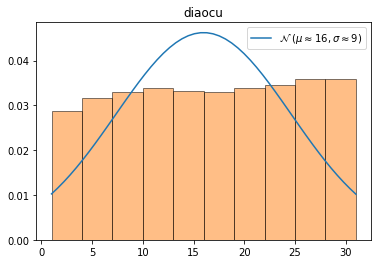

diaocu Kurtosis:  -1.1815350681651762
diaocu Sesgo:  -0.02265851757422267


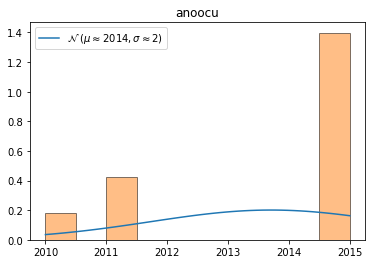

anoocu Kurtosis:  -1.063355878458243
anoocu Sesgo:  -0.9223827342948843


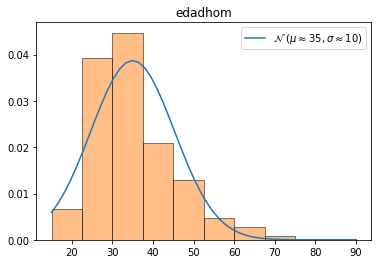

edadhom Kurtosis:  1.7573454699479378
edadhom Sesgo:  1.1949921979916913


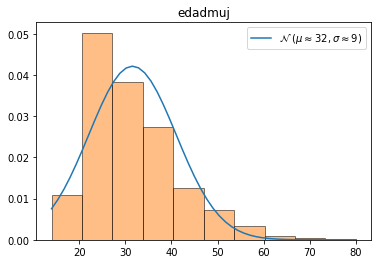

edadmuj Kurtosis:  1.324705216025135
edadmuj Sesgo:  1.0888975903394962


In [12]:
for col in divorcios_cuantitativos:
    serie = pd.to_numeric(divorcios_cuantitativos[col], errors='coerce')

    std = np.std(serie, ddof=1)
    mean = np.mean(serie)
    kurtosis = serie.kurtosis()
    skew = serie.skew()

    domain = np.linspace(np.min(serie), np.max(serie))

    plt.plot(
        domain,
        norm.pdf(domain, mean, std),
        label='$\mathcal{N}$ ' + f'$( \mu \\approx {round(mean)} , \sigma \\approx {round(std)} )$')
    plt.hist(serie, edgecolor='black', alpha=0.5, density=True)
    plt.title(col)
    plt.legend()
    plt.show()

    print(col, 'Kurtosis: ', kurtosis)
    print(col, 'Sesgo: ', skew)

### Graficas de cajas de bigotes

In [13]:
#funcion que recibe un dataframe y el nombre de una columna y saca la kurtosis y el sego, asi como crea un box plot y un histograma
def normalidad_datos(df,columna):
    #pruebas estadisticas para comprobar si es o no normal
    kurtosis = df[[columna]].kurtosis()
    skew = df[[columna]].skew()

    fig = plt.figure(figsize=(10,10),constrained_layout=True)
    gs = fig.add_gridspec(nrows=2,ncols=2)
    fig.suptitle('Pruebas de Normalidad: '+columna + '\n kurtosis: '+ str(kurtosis[0]) + '\n Sesgo: ' + str(skew[0]), fontsize=16, color='w')
    fig.set_facecolor('#5e6e65')

    ax1 = fig.add_subplot(gs[0,0])
    df[[columna]].boxplot(ax=ax1)
    #datos.budget.plot.kde(ax=ax1,secondary_y=True)
    ax1.set_title('Boxplot',color='w')

    ax2 = fig.add_subplot(gs[0,1])
    df[[columna]].hist(ax=ax2)
    #datos.revenue.plot.kde(ax=ax2,secondary_y=True)
    ax2.set_title('hist',color='w')

    plt.show()

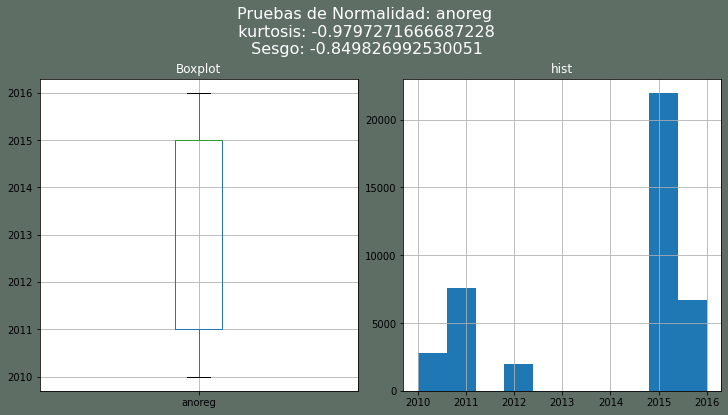

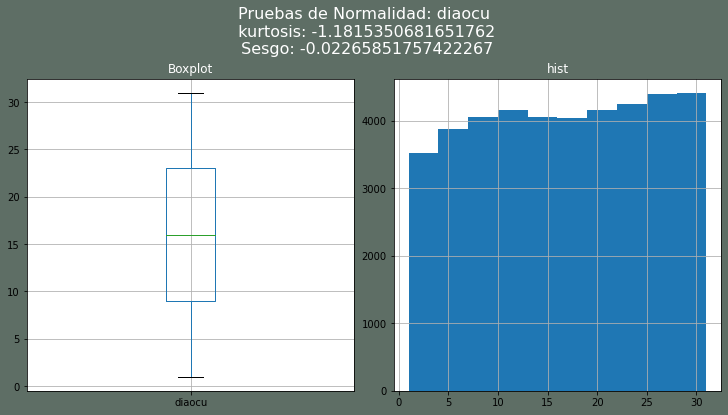

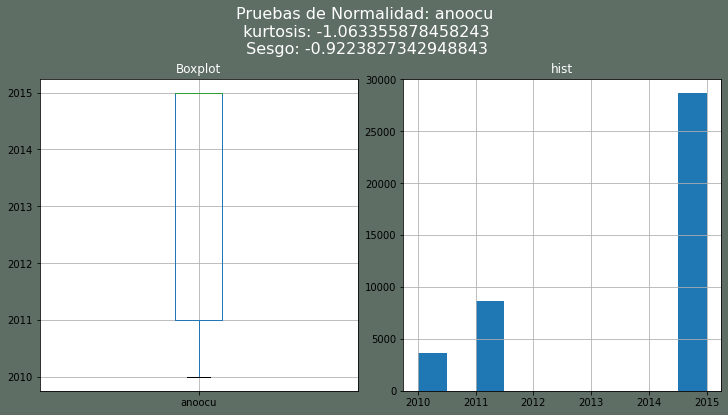

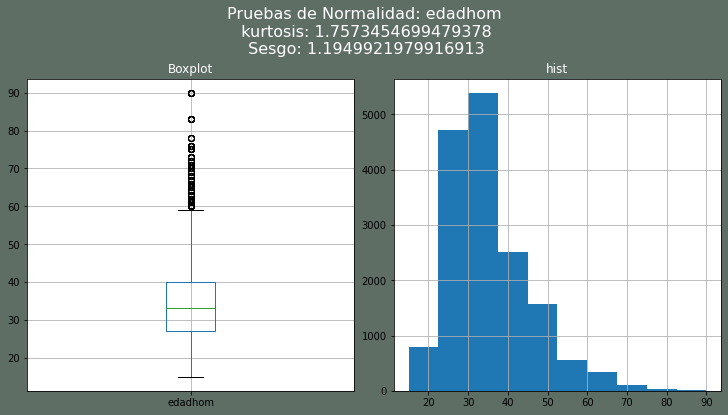

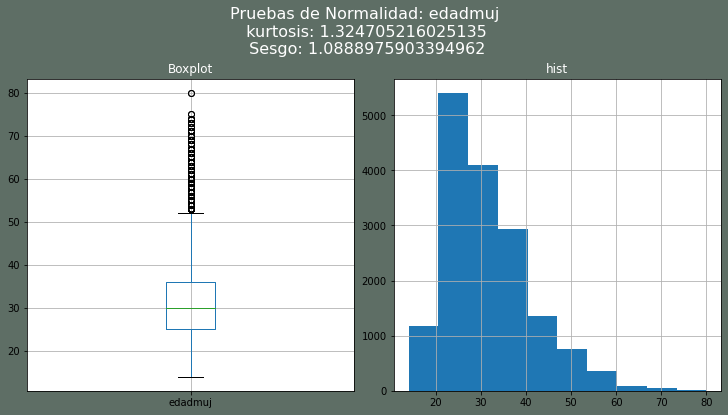

In [14]:
for col in divorcios_cuantitativos:
    normalidad_datos(divorcios,col)

In [15]:
for columna in divorcios_cuantitativos:
    Q1 = divorcios[columna].quantile(0.25)
    Q3 = divorcios[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = divorcios[divorcios[columna] < (Q1 - 1.5 * IQR)].index
    divorcios.drop(indexes, inplace=True)

    indexes = divorcios[divorcios[columna] > (Q3 + 1.5 * IQR)].index
    divorcios.drop(indexes, inplace=True)

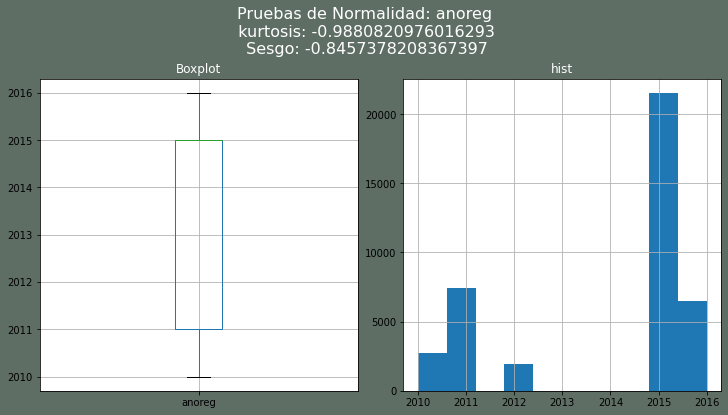

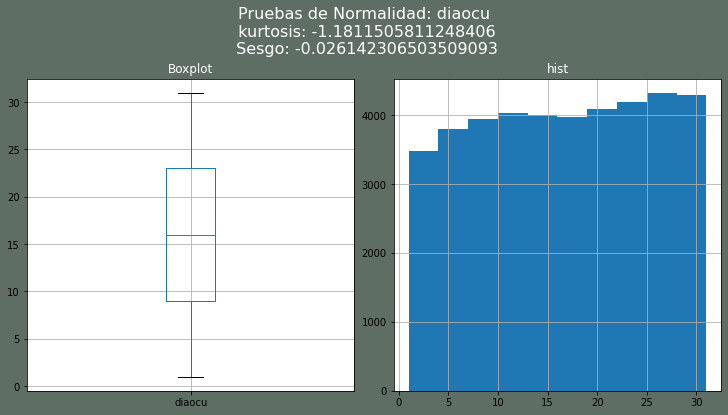

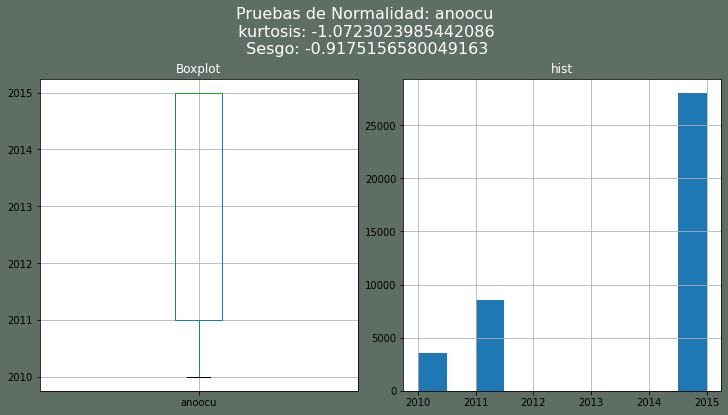

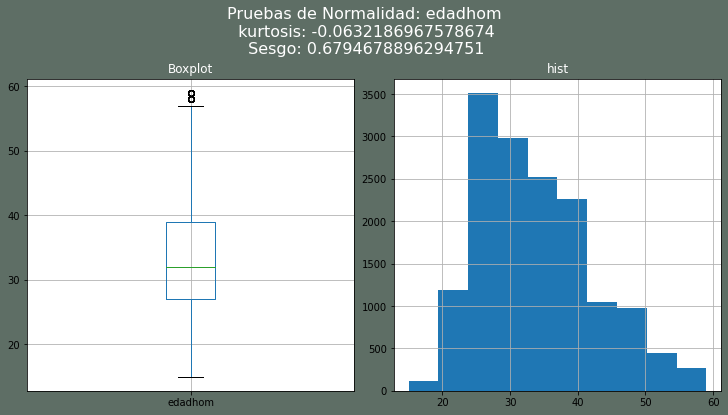

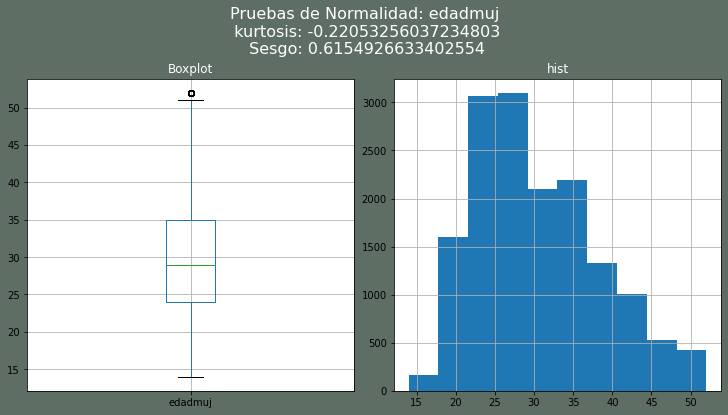

In [16]:
for col in divorcios_cuantitativos:
    normalidad_datos(divorcios,col)

### Resultado

In [17]:
divorcios

,depreg,mupreg,mesreg,anoreg,diaocu,mesocu,anoocu,depocu,mupocu,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,eschom,escmuj
3006,Guatemala,Guatemala,Marzo,2010,16,Febrero,2010,Guatemala,Guatemala,42.0,31.0,Ignorado,Ignorado,Guatemala,Guatemala,Diseñadores gráficos y multimedia,Directores de administración y servicios no cl...,Diversificado,Ignorado
3007,Guatemala,Guatemala,Octubre,2010,25,Agosto,2010,Guatemala,Guatemala,47.0,36.0,Ignorado,Ignorado,Guatemala,Guatemala,Comerciantes de tiendas,Directores de administración y servicios no cl...,Ninguna,Ninguna
3008,Guatemala,Guatemala,Agosto,2010,20,Mayo,2010,Guatemala,Guatemala,NaN,NaN,Ignorado,Ignorado,Estados Unidos de América,México,Estudiante,Directores de administración y servicios no cl...,Ignorado,Ignorado
3009,Alta Verapaz,Cobán,Marzo,2010,28,Enero,2010,Alta Verapaz,Cobán,23.0,37.0,No indigena,No indigena,Guatemala,Guatemala,Estudiante,Directores de ventas y comercialización,Ignorado,Básico
3010,Guatemala,Guatemala,Octubre,2010,23,Junio,2010,Guatemala,Guatemala,NaN,NaN,Ignorado,Ignorado,Guatemala,Guatemala,Vendedores no clasificados bajo otros epígrafes,"Gerentes de sucursales de bancos, de servicios...",Ignorado,Ignorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60621,Sacatepequez,Antigua Guatemala,Diciembre,2011,12,Septiembre,2011,Sacatepequez,Antigua Guatemala,NaN,NaN,No indigena,No indigena,Guatemala,Estados Unidos de América,Ignorado,Ignorado,Ignorado,Ignorado
60622,Suchitepequez,Mazatenango,Julio,2011,27,Mayo,2011,Suchitepequez,Mazatenango,49.0,NaN,No indigena,Ignorado,Guatemala,Estados Unidos de América,Agricultores y trabajadores calificados de cul...,Secretarios (general),Universitario,Ignorado
60623,Solola,Panajachel,Diciembre,2011,1,Diciembre,2011,Solola,Sololá,NaN,NaN,Ignorado,Ignorado,Estados Unidos de América,Estados Unidos de América,Ignorado,Ignorado,Ignorado,Ninguna
60624,Solola,Santa Cruz la Laguna,Enero,2012,5,Diciembre,2011,Solola,Santa Cruz la Laguna,47.0,49.0,No indigena,No indigena,Francia,Estados Unidos de América,"Filósofos, historiadores y especialistas en ci...",Especialistas en tratamientos de belleza y afines,Universitario,Universitario


## Matrimonios

In [18]:
matrimonios = pd.read_csv('./Archivos/matrimonios.csv',low_memory=False)
#matrimonios = matrimonios.dropna()


In [19]:
matrimonios.shape

(907782, 23)

In [20]:
matrimonios.head()

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,nunuho,nunumu,depocu,mupocu,mesocu,anoocu,areagocu,eschom,escmuj,diaocu
0,San Marcos,Comitancillo,Abril,2010.0,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Ignorado,Ignorado,Ignorado,Ignorado,San Marcos,Comitancillo,Septiembre,2009.0,Ignorado,NaN,NaN,NaN
1,Retalhuleu,Retalhuleu,Mayo,2009.0,Matrimonio,16.0,14.0,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,Ignorado,Ignorado,Retalhuleu,Retalhuleu,Marzo,2009.0,Ignorado,NaN,NaN,NaN
2,Huehuetenango,Chiantla,Enero,2010.0,Matrimonio,16.0,14.0,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Huehuetenango,Chiantla,Diciembre,2009.0,Ignorado,NaN,NaN,NaN
3,Quiche,Joyabaj,Agosto,2009.0,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Julio,2009.0,Ignorado,NaN,NaN,NaN
4,Quiche,Joyabaj,Octubre,2009.0,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Octubre,2009.0,Ignorado,NaN,NaN,NaN


In [21]:
#convertir los datos de strings a enteros
matrimonios['edadhom'] = pd.to_numeric(matrimonios['edadhom'],errors='coerce', downcast="integer")
matrimonios['edadmuj'] = pd.to_numeric(matrimonios['edadmuj'],errors='coerce', downcast="integer")
matrimonios['anoreg'] = pd.to_numeric(matrimonios['anoreg'],errors='coerce', downcast="integer")
matrimonios['nunuho'] = pd.to_numeric(matrimonios['nunuho'],errors='coerce', downcast="integer")
matrimonios['nunumu'] = pd.to_numeric(matrimonios['nunumu'],errors='coerce', downcast="integer")


#quedarse con un valor de mestizo y ladino
matrimonios["puehom"]=matrimonios.puehom.str.split('/').str[0]
matrimonios["puemuj"]=matrimonios.puemuj.str.split('/').str[0]
#convertir de string a un numero categorico para poder hacer clusters
matrimonios["puehom"]= matrimonios["puehom"].replace(
    ['Ignorado','Mestizo','Maya','Indigena','No indigena','No Indigena','Ladino','Otro','Garífuna','Xinka'],
                                                     [0,1,2,3,4,4,5,6,7,8],regex=True)
matrimonios["puemuj"]= matrimonios["puemuj"].replace(
    ['Ignorado','Mestizo','Maya','Indigena','No indigena','No Indigena','Ladino','Otro','Garífuna','Xinka'],
                                                     [0,1,2,3,4,4,5,6,7,8],regex=True)
#convertir de string a un numero categorico para poder hacer clusters
matrimonios["eschom"]= matrimonios["eschom"].replace(
    ['Ninguno','Ignorado','Primaria','Básico','Diversificado','DIversificado','Universitario','Postgrado','Post Grado'],
                                                     [0,99,1,2,3,3,4,5,5],regex=True)

matrimonios["escmuj"]= matrimonios["escmuj"].replace(
    ['Ninguno','Ignorado','Primaria','Básico','Diversificado','DIversificado','Universitario','Postgrado','Post Grado'],
                                                     [0,99,1,2,3,3,4,5,5],regex=True)

#crear columna con diferencia de edad
matrimonios['edad_dif'] = abs(matrimonios['edadhom'] - matrimonios['edadmuj'])

#quitar los valores de NaN
matrimonios['nunumu'] = matrimonios['nunumu'].fillna(0)
matrimonios['nunuho'] = matrimonios['nunuho'].fillna(0)
matrimonios['puehom'] = matrimonios['puehom'].fillna(0)
matrimonios['puemuj'] = matrimonios['puemuj'].fillna(0)
matrimonios['eschom'] = matrimonios['eschom'].fillna(0)
matrimonios['escmuj'] = matrimonios['escmuj'].fillna(0)

In [22]:

'''
#####################################################################
#crear una lista con todos los empleos en la columna de ciuohom
lista_empleos_ho=list(set(matrimonios['ciuohom']))
#remover Ignordao y reinsertarlo en la primera posicion
lista_empleos_ho.remove('Ignorado')
lista_empleos_ho.insert(0, 'Ignorado')
#crear una lista desde 0 a len de lista_empleos para poder cambiar de string a numeros 
lst_ho = [i for i in range(0,len(lista_empleos_ho))]
matrimonios["ciuohom"]= matrimonios["ciuohom"].replace(
    lista_empleos_ho,lst_ho,regex=True)

#####################################################
#crear una lista con todos los empleos en la columna de ciuohom
lista_empleos_mj=list(set(matrimonios['ciuomuj']))
#remover Ignordao y reinsertarlo en la primera posicion
lista_empleos_mj.remove('Ignorado')
lista_empleos_mj.insert(0, 'Ignorado')
#crear una lista desde 0 a len de lista_empleos para poder cambiar de string a numeros 
lst_mj = [i for i in range(0,len(lista_empleos_mj))]
matrimonios["ciuomuj"]= matrimonios["ciuomuj"].replace(
    lista_empleos_mj,lst_mj,regex=True)
'''

'\n#####################################################################\n#crear una lista con todos los empleos en la columna de ciuohom\nlista_empleos_ho=list(set(matrimonios[\'ciuohom\']))\n#remover Ignordao y reinsertarlo en la primera posicion\nlista_empleos_ho.remove(\'Ignorado\')\nlista_empleos_ho.insert(0, \'Ignorado\')\n#crear una lista desde 0 a len de lista_empleos para poder cambiar de string a numeros \nlst_ho = [i for i in range(0,len(lista_empleos_ho))]\nmatrimonios["ciuohom"]= matrimonios["ciuohom"].replace(\n    lista_empleos_ho,lst_ho,regex=True)\n\n#####################################################\n#crear una lista con todos los empleos en la columna de ciuohom\nlista_empleos_mj=list(set(matrimonios[\'ciuomuj\']))\n#remover Ignordao y reinsertarlo en la primera posicion\nlista_empleos_mj.remove(\'Ignorado\')\nlista_empleos_mj.insert(0, \'Ignorado\')\n#crear una lista desde 0 a len de lista_empleos para poder cambiar de string a numeros \nlst_mj = [i for i in rang

In [23]:
matrimonios.head()

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,nunuho,nunumu,depocu,mupocu,mesocu,anoocu,areagocu,eschom,escmuj,diaocu,edad_dif
0,San Marcos,Comitancillo,Abril,2010,Matrimonio,16.0,14.0,3,3,Guatemala,Guatemala,Ignorado,Ignorado,0.0,0.0,San Marcos,Comitancillo,Septiembre,2009.0,Ignorado,0.0,0.0,NaN,2.0
1,Retalhuleu,Retalhuleu,Mayo,2009,Matrimonio,16.0,14.0,0,0,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,0.0,0.0,Retalhuleu,Retalhuleu,Marzo,2009.0,Ignorado,0.0,0.0,NaN,2.0
2,Huehuetenango,Chiantla,Enero,2010,Matrimonio,16.0,14.0,0,0,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Huehuetenango,Chiantla,Diciembre,2009.0,Ignorado,0.0,0.0,NaN,2.0
3,Quiche,Joyabaj,Agosto,2009,Matrimonio,16.0,14.0,3,3,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Julio,2009.0,Ignorado,0.0,0.0,NaN,2.0
4,Quiche,Joyabaj,Octubre,2009,Matrimonio,16.0,14.0,3,3,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Octubre,2009.0,Ignorado,0.0,0.0,NaN,2.0



<b>Descripcion de las variables:</b>
<ol>
    <li><p style="color:blue">depreg:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">mupreg:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">mesreg:</p>Cualitativa Nominal</li>
    <li><p style="color:red">anoreg:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">clauni:</p>Cualitativa Nominal</li>
    <li><p style="color:red">diaocu:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">mesocu:</p>Cualitativa Nominal</li>
    <li><p style="color:red">anoocu:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">depocu:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">mupocu:</p>Cualitativa Nominal</li>
    <li><p style="color:red">edadhom:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">edadmuj:</p>Cuantitativa Discreta</li>
    <li><p style="color:blue">puehom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">puemuj:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">nachom:</p>Cualitativa Nominal</li>
    <li><p style="color:blue">nacmuj:</p>Cualitativa Nominal</li>
    <li><p style="color:red">ciuohom:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">ciuomuj:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">eschom:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">escmuj:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">nunuho:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">nunumu:</p>Cuantitativa Discreta</li>
    <li><p style="color:red">edad_dif:</p>Cuantitativa Continua</li>
</ol>

In [24]:
matrimonios.clauni.value_counts()

Comunidad de gananciales    734774
Matrimonio                   62104
Comunidad absoluta           49605
No especificado              44619
Separación absoluta          16680
Name: clauni, dtype: int64

In [25]:
cuantitativas_mat = ['anoreg', 'edadhom', 'edadmuj', 'nunuho', 'nunumu', 'anoocu', 'diaocu','puehom','puemuj','eschom','escmuj','edad_dif']

### Tablas de frecuencias y Graficas de cajas de bigotes

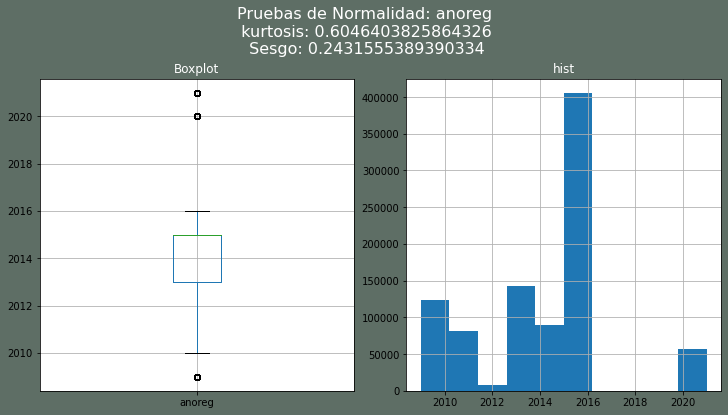

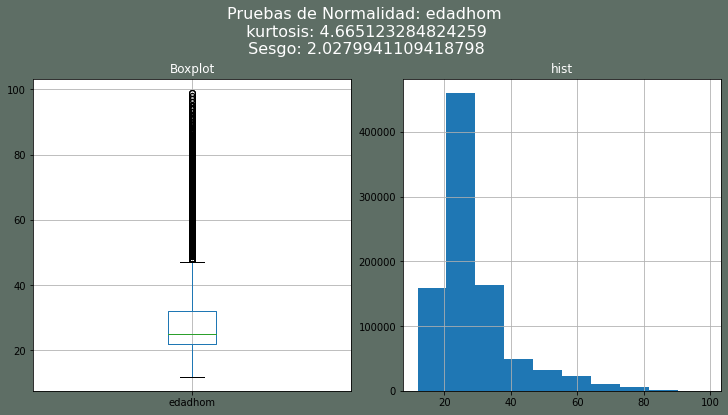

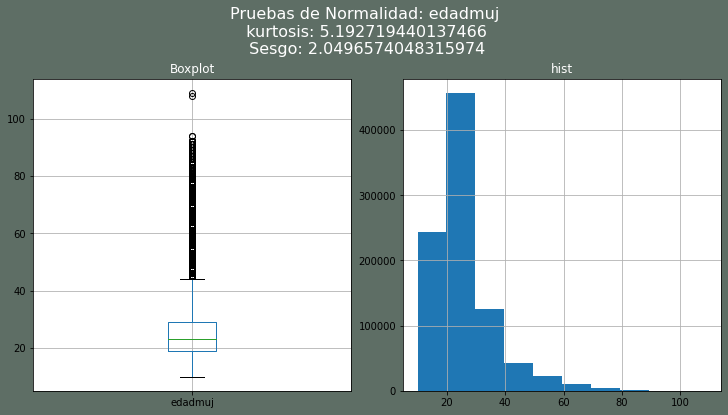

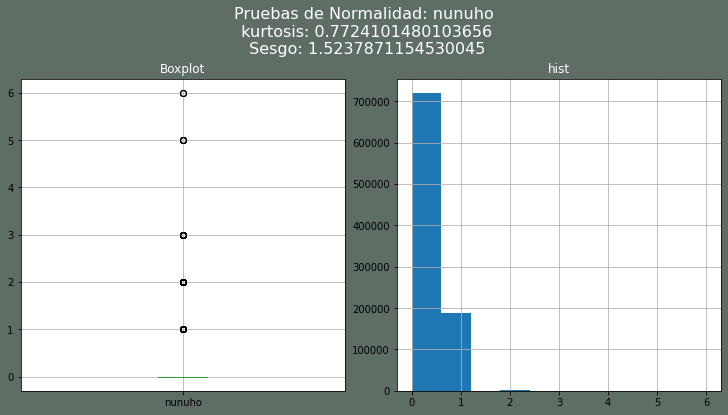

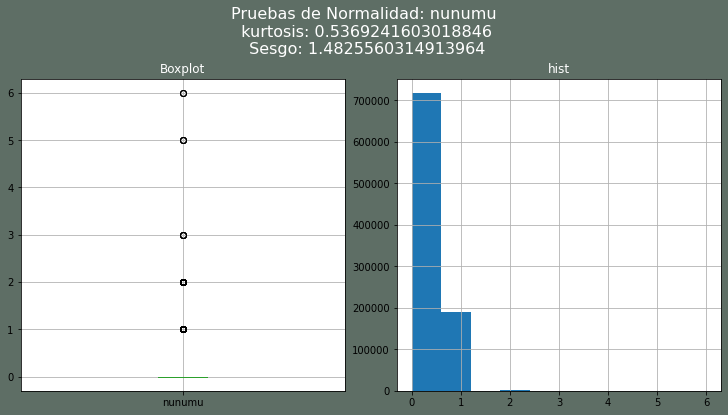

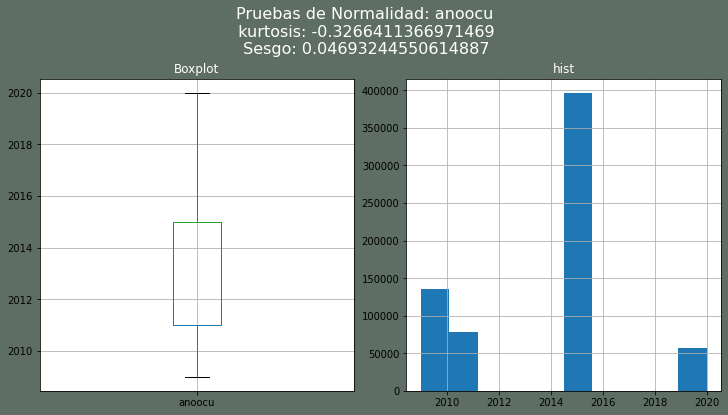

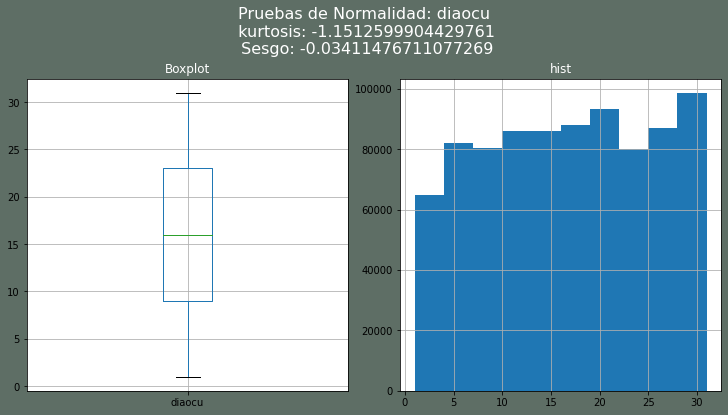

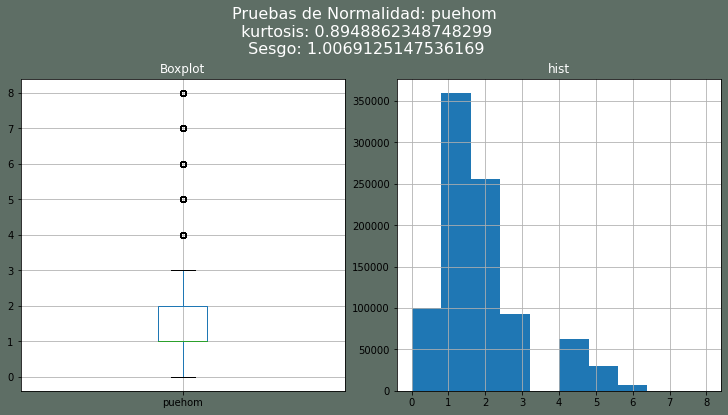

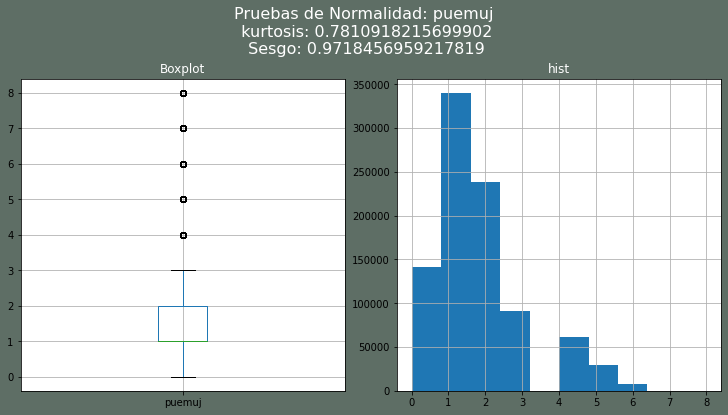

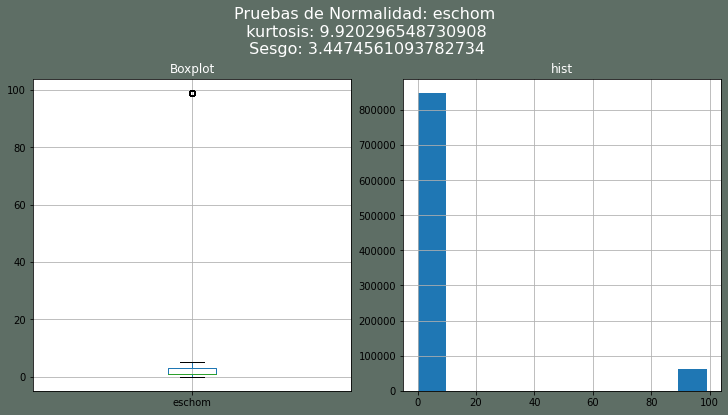

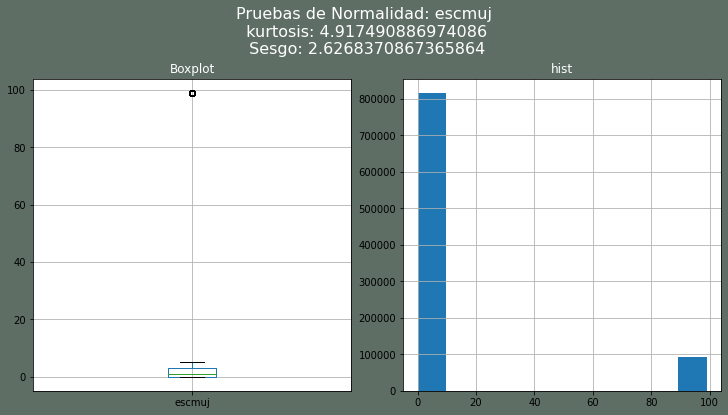

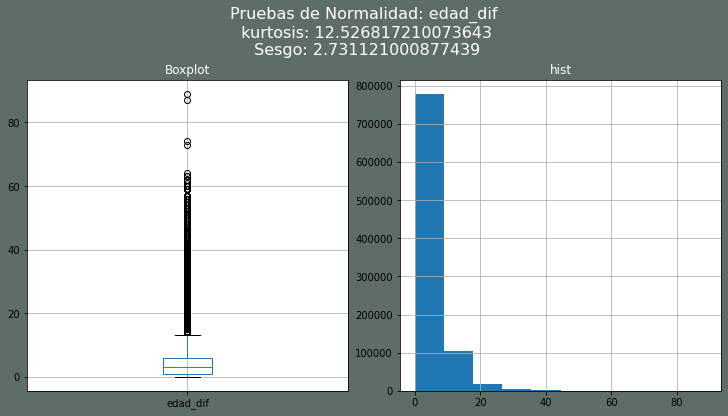

In [26]:
#recorrer lista con columnas cuantitativas y crear graficos boxplot y historgrama
for col in cuantitativas_mat:
    normalidad_datos(matrimonios,col)

In [27]:
for columna in cuantitativas_mat:
    Q1 = matrimonios[columna].quantile(0.25)
    Q3 = matrimonios[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = matrimonios[matrimonios[columna] < (Q1 - 1.5 * IQR)].index
    matrimonios.drop(indexes, inplace=True)

    indexes = matrimonios[matrimonios[columna] > (Q3 + 1.5 * IQR)].index
    matrimonios.drop(indexes, inplace=True)

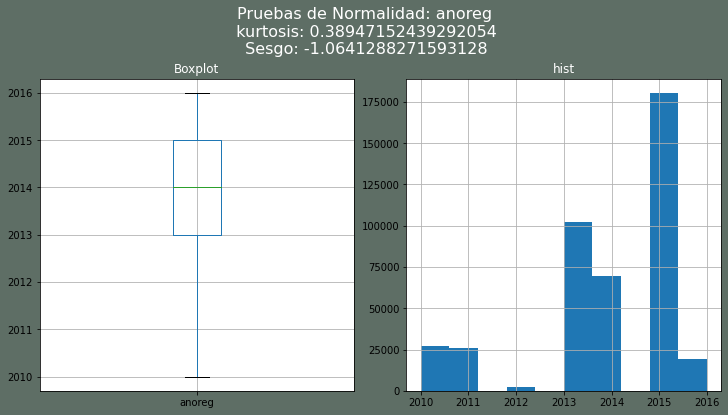

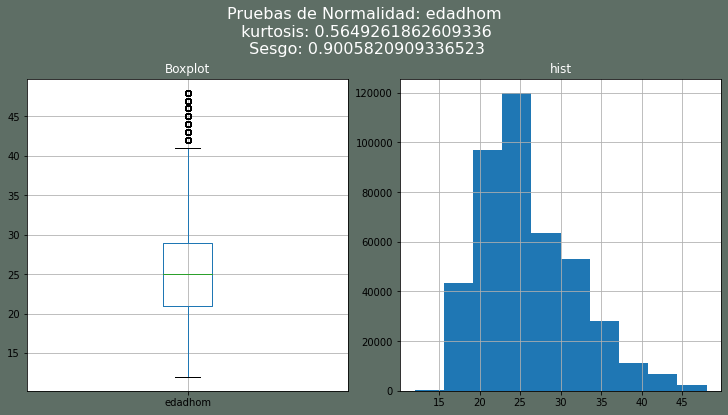

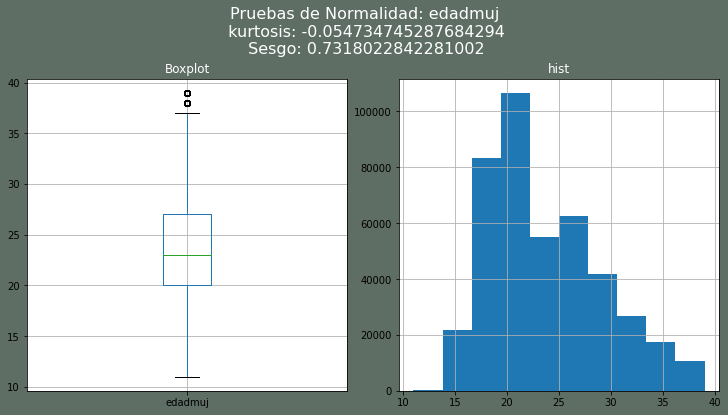

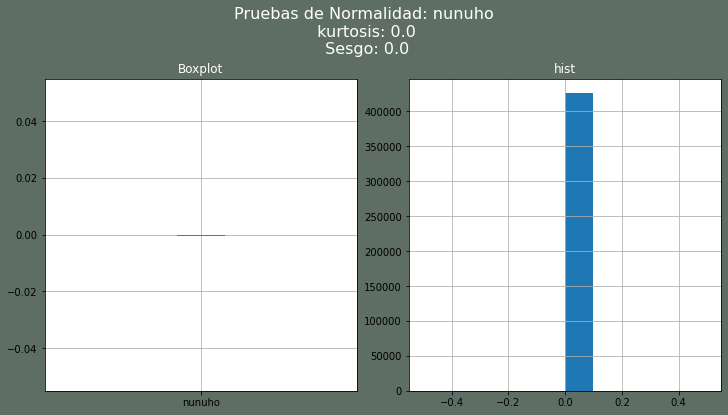

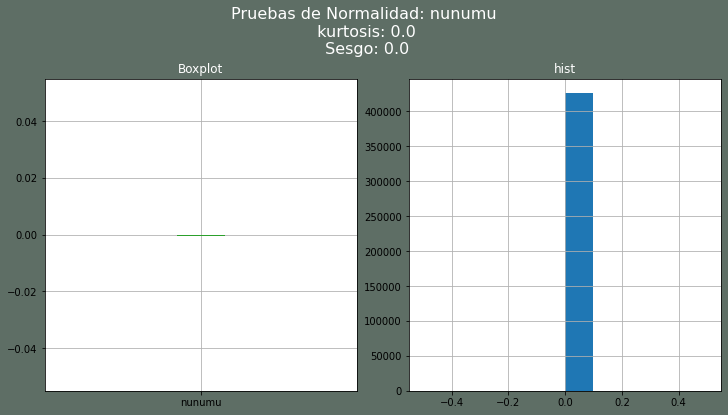

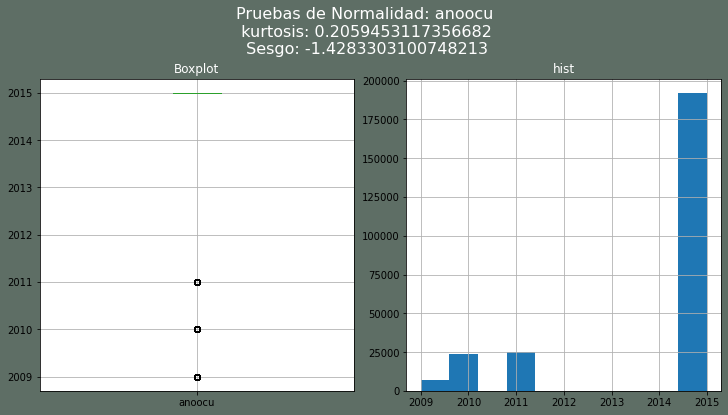

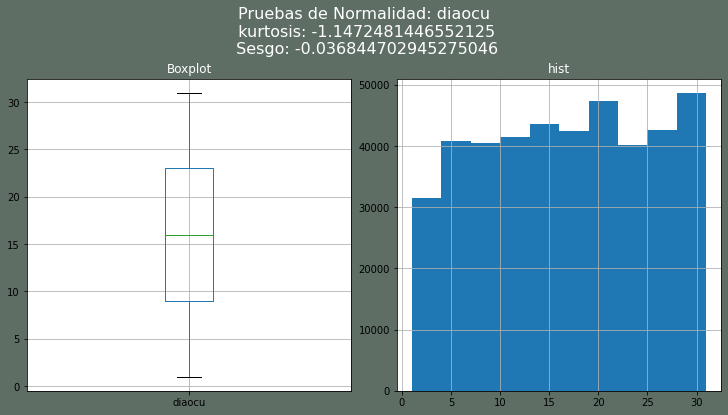

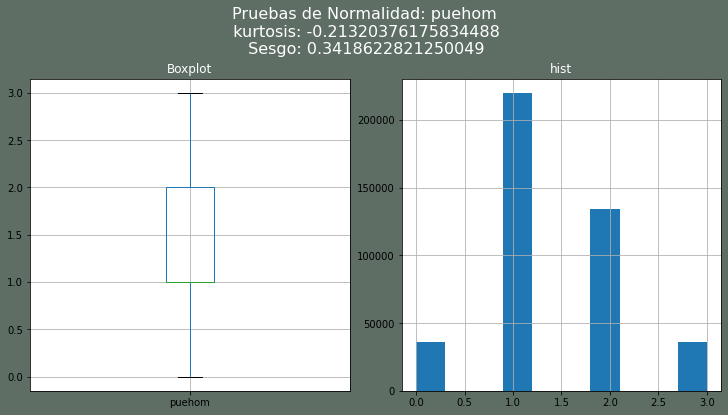

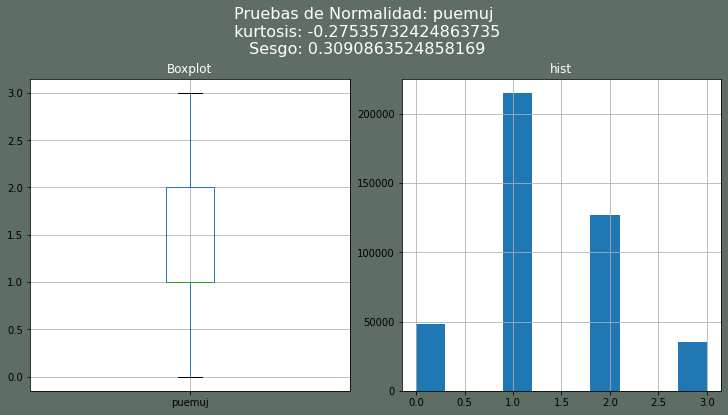

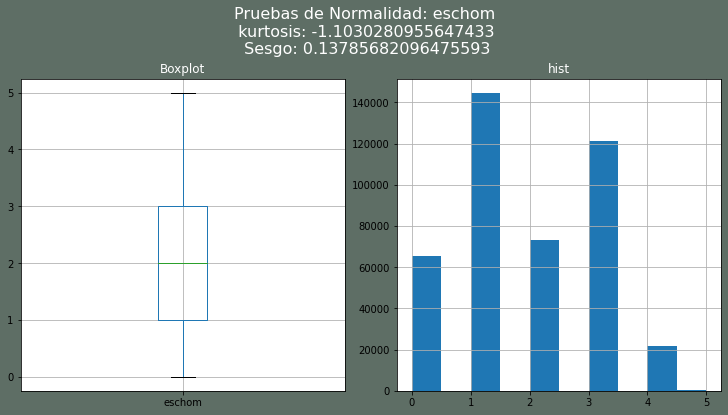

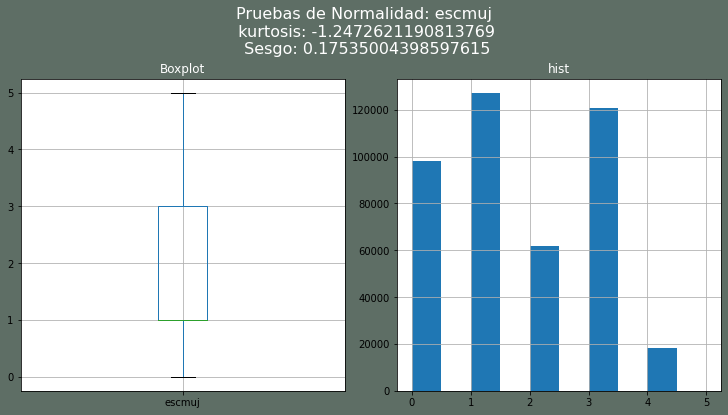

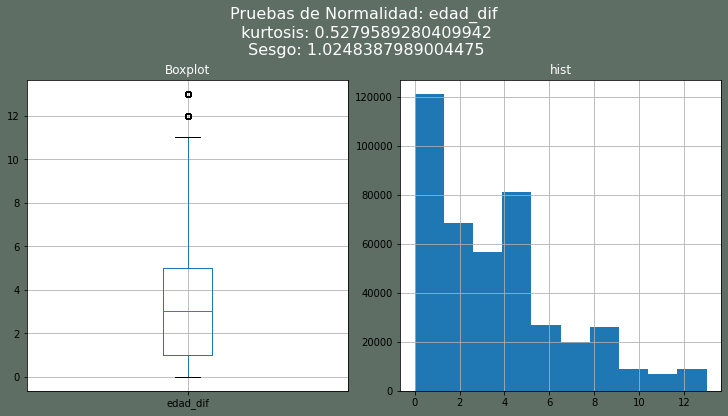

In [28]:
for col in cuantitativas_mat:
    normalidad_datos(matrimonios,col)

### Grafica de barras para el conteo de las clasificaciones de las variables cualitativas, en orden descendente

In [29]:
matrimonios_cualitativos = matrimonios.drop(['anoreg', 'edadhom', 'edadmuj', 'nunuho', 'nunumu', 'anoocu', 'diaocu','puehom','puemuj','eschom','escmuj','edad_dif'], axis=1)
columnas = []

for col in matrimonios_cualitativos.columns:
    columnas.append(col)

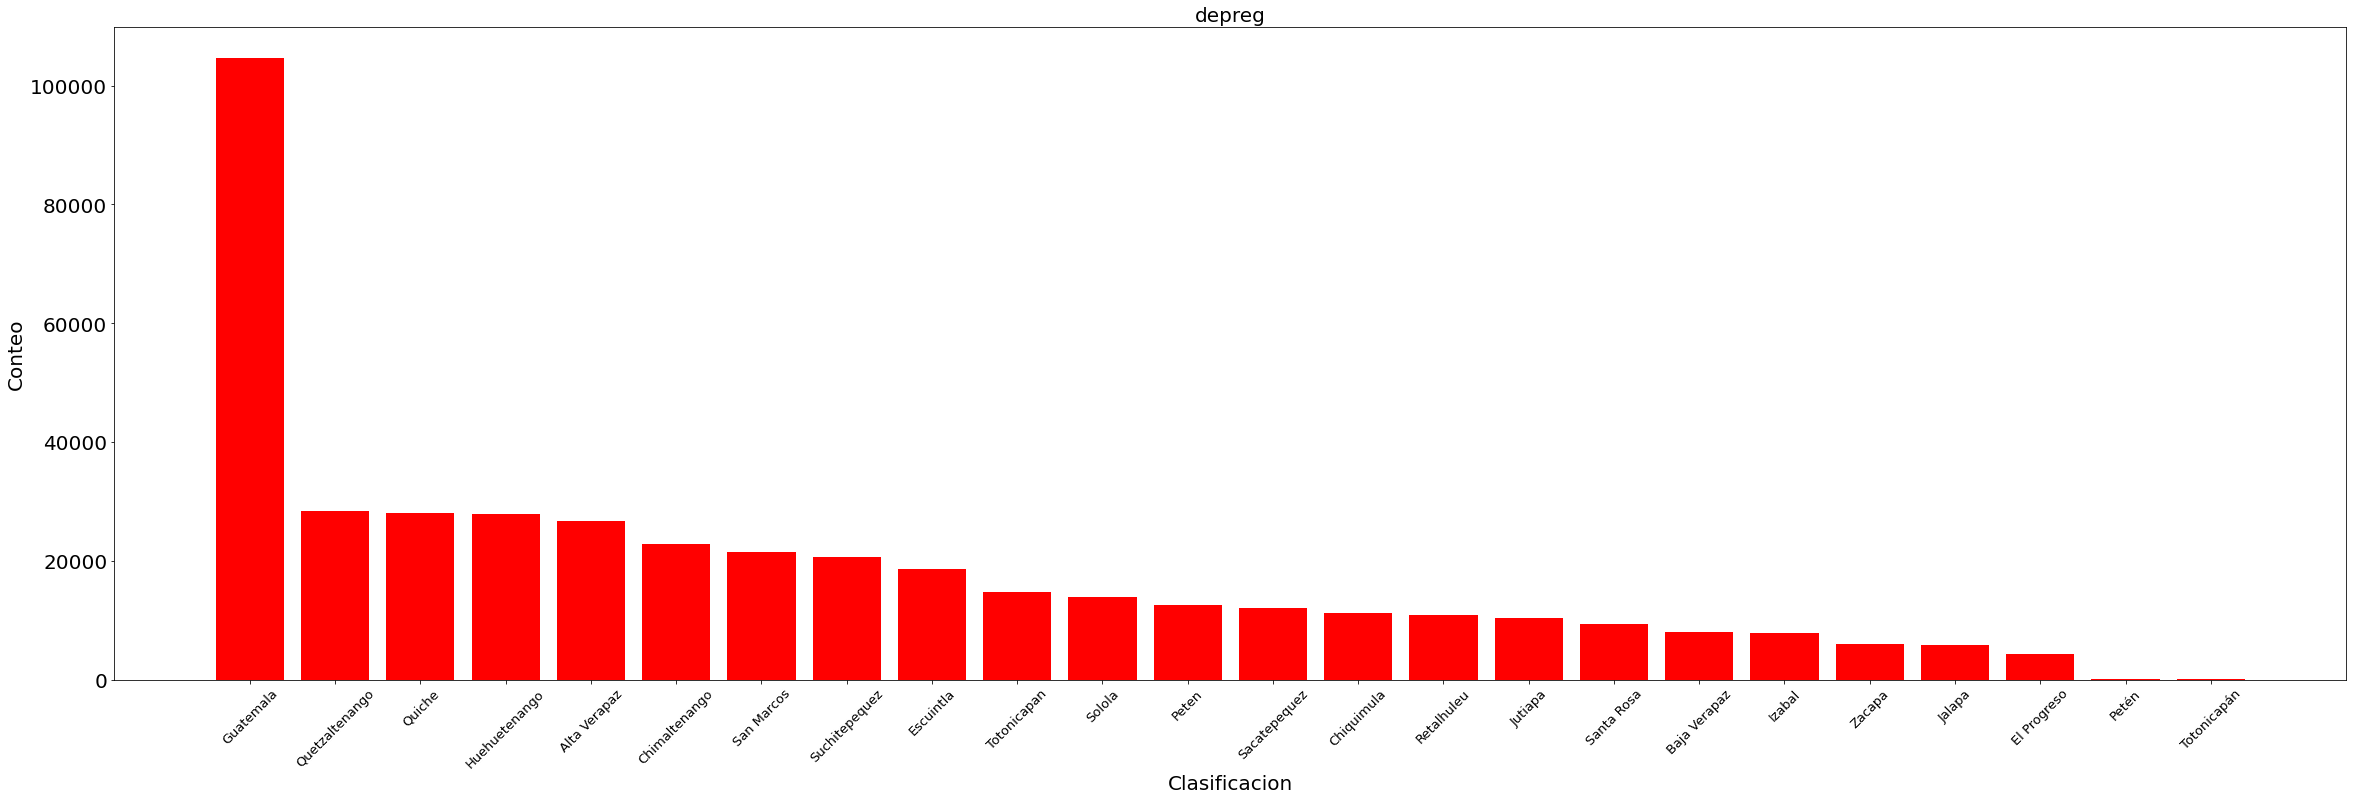

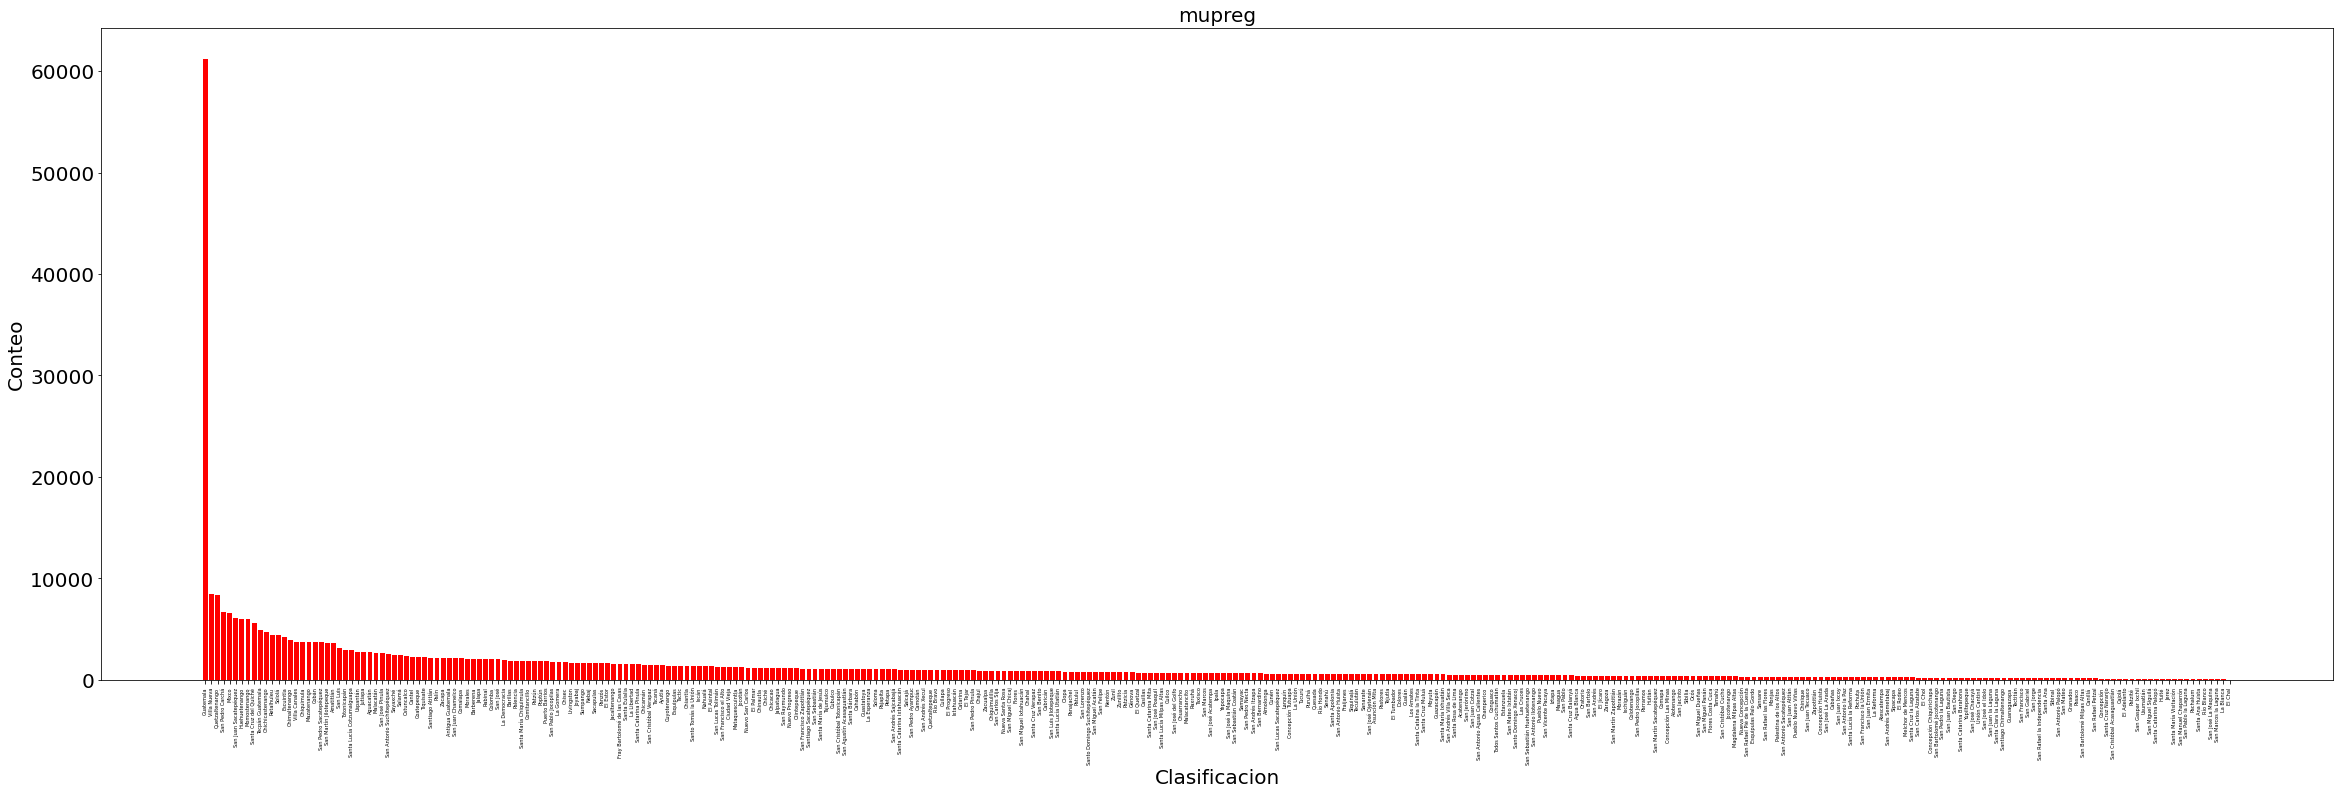

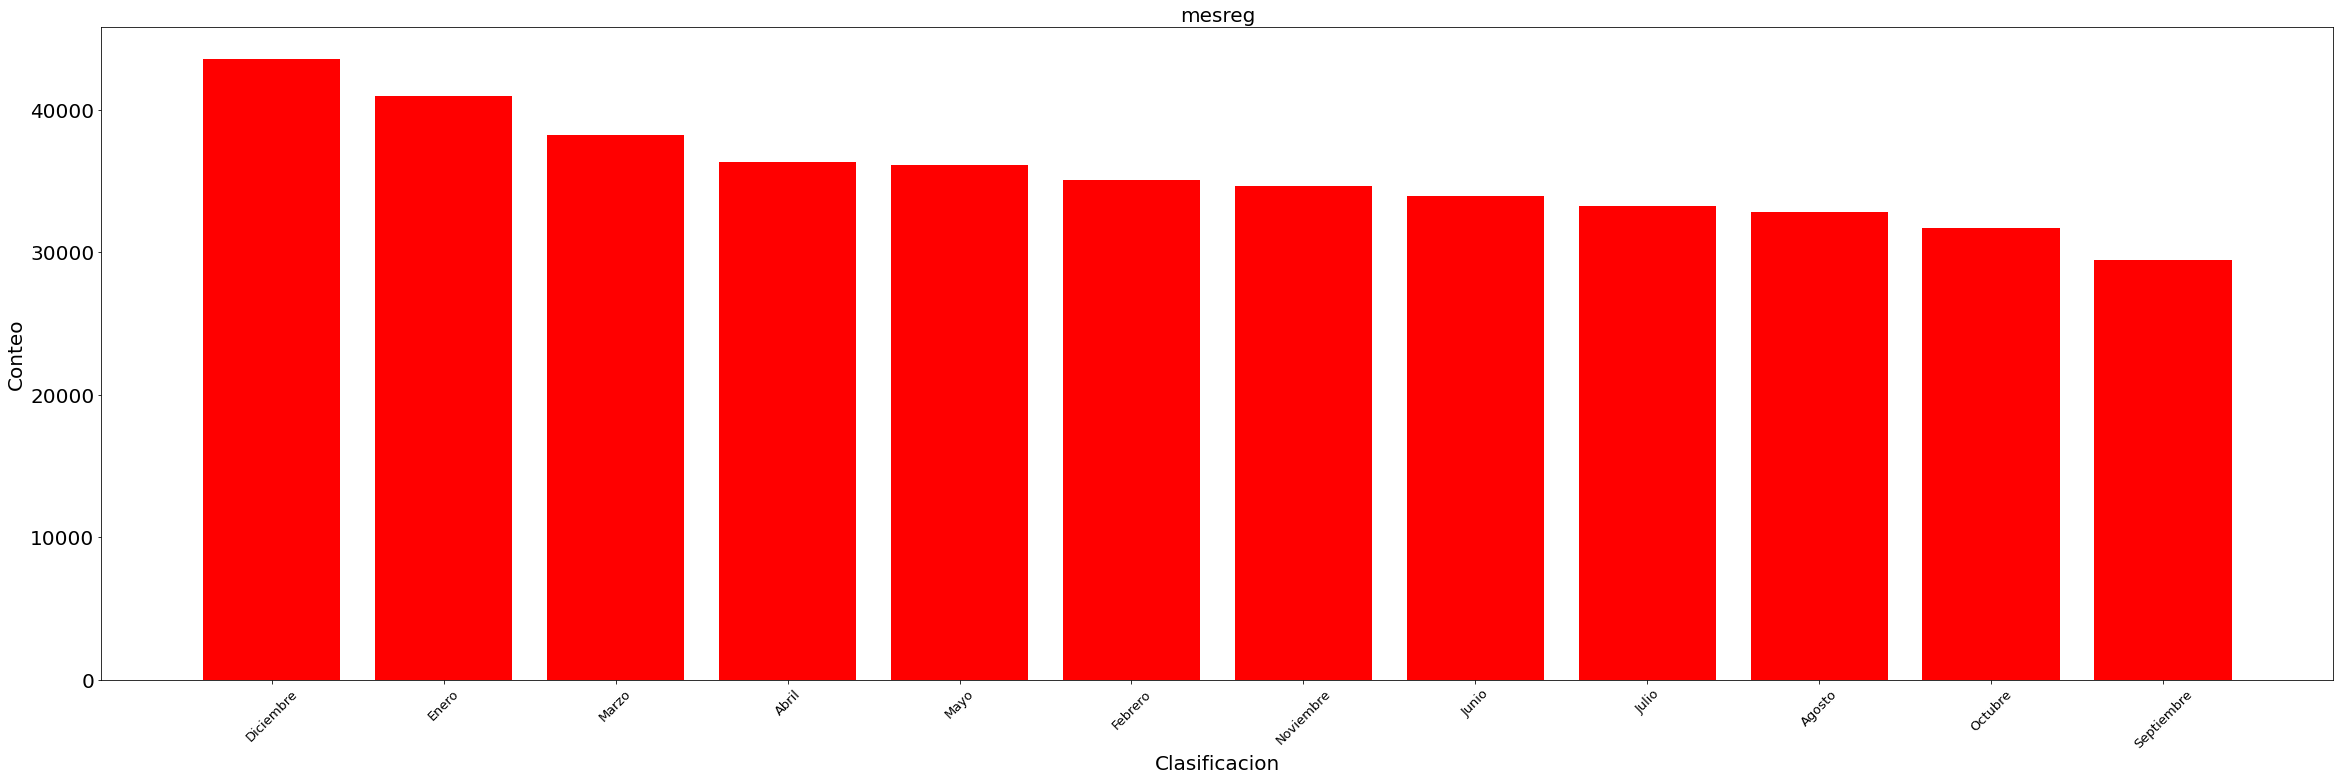

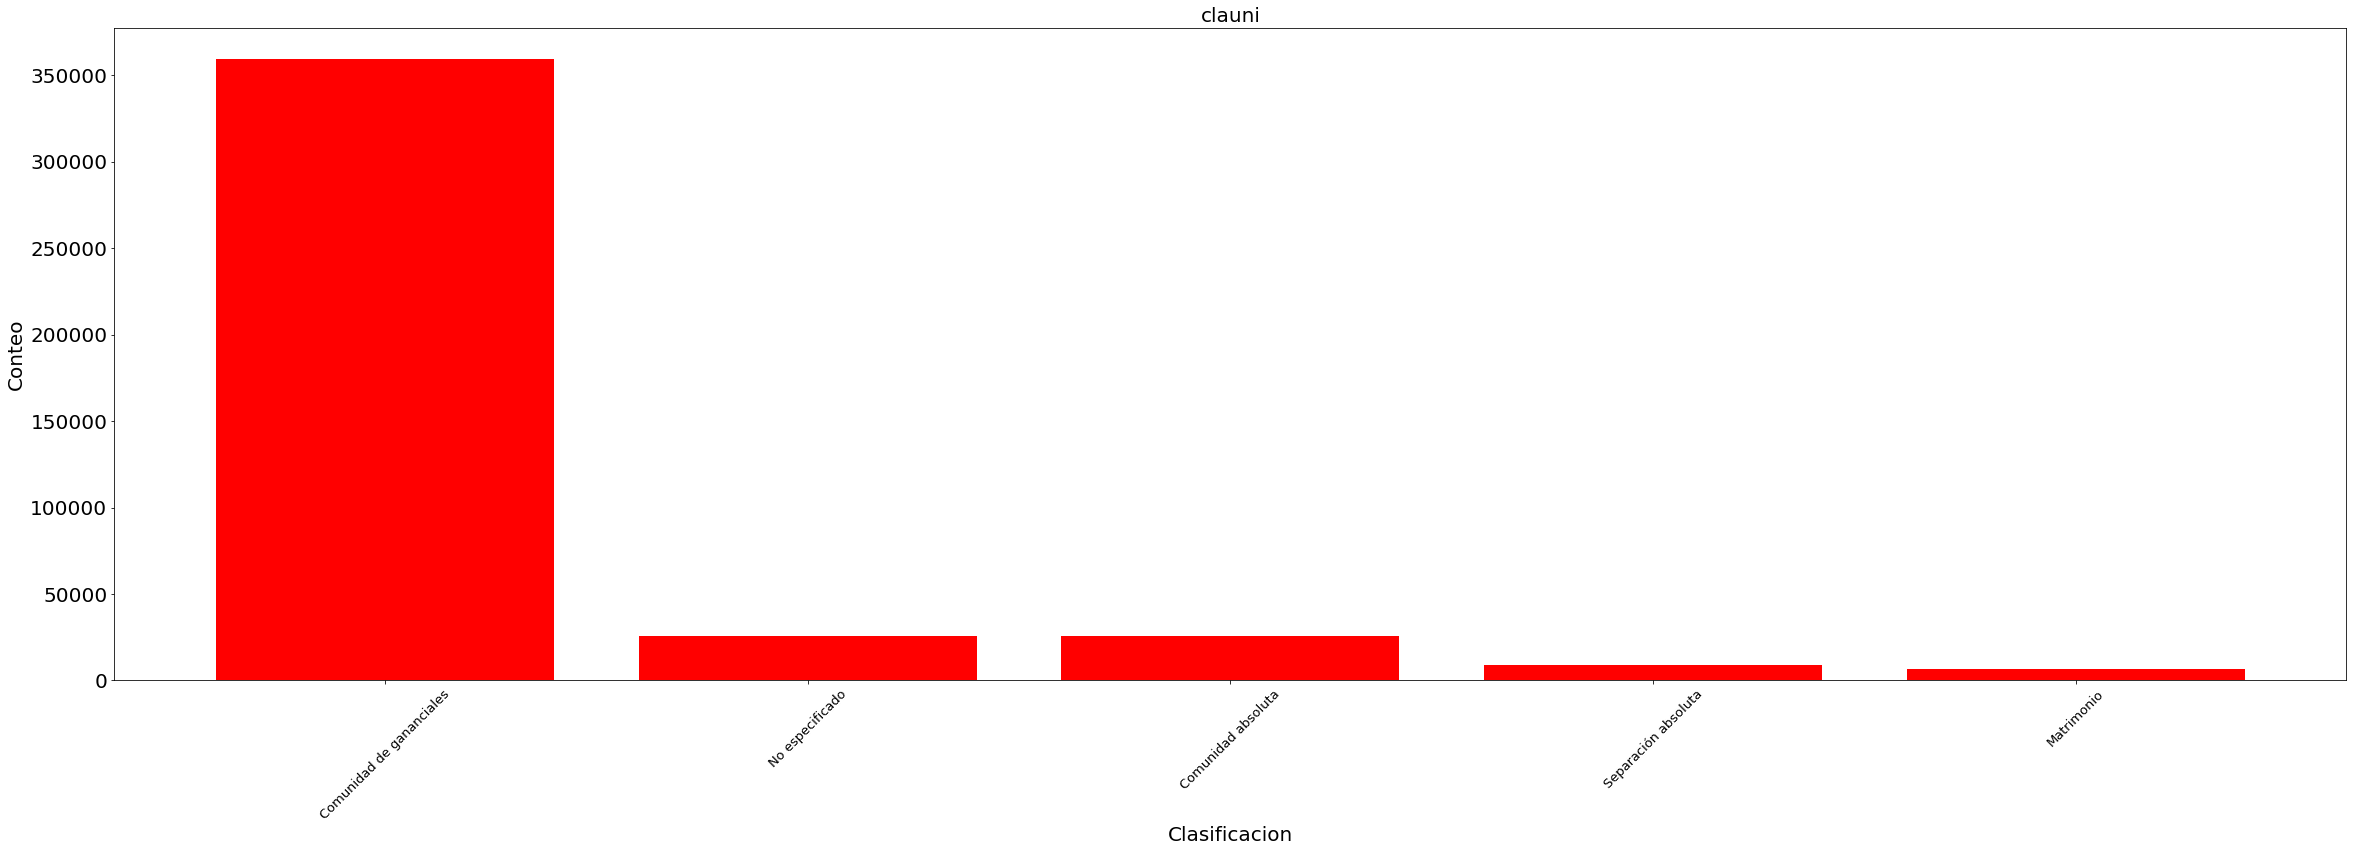

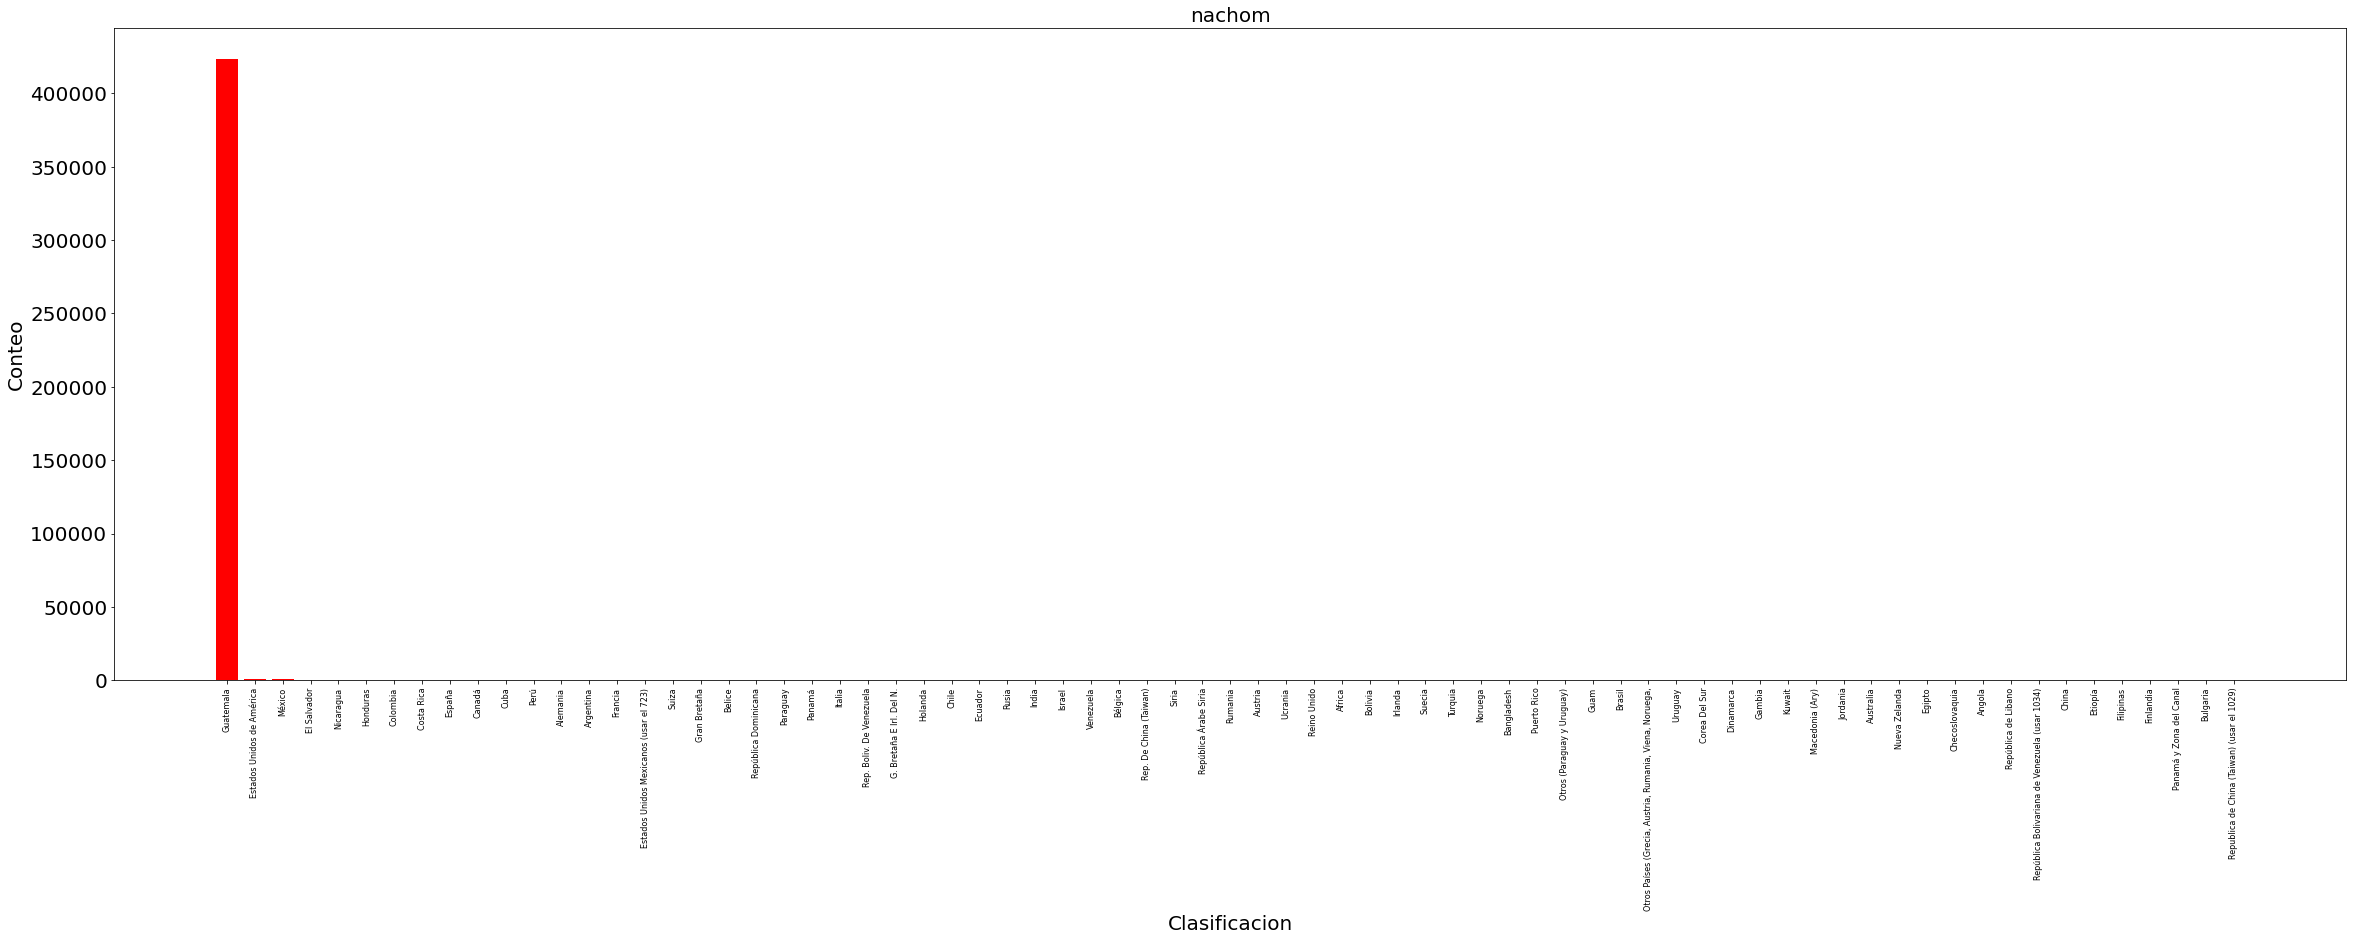

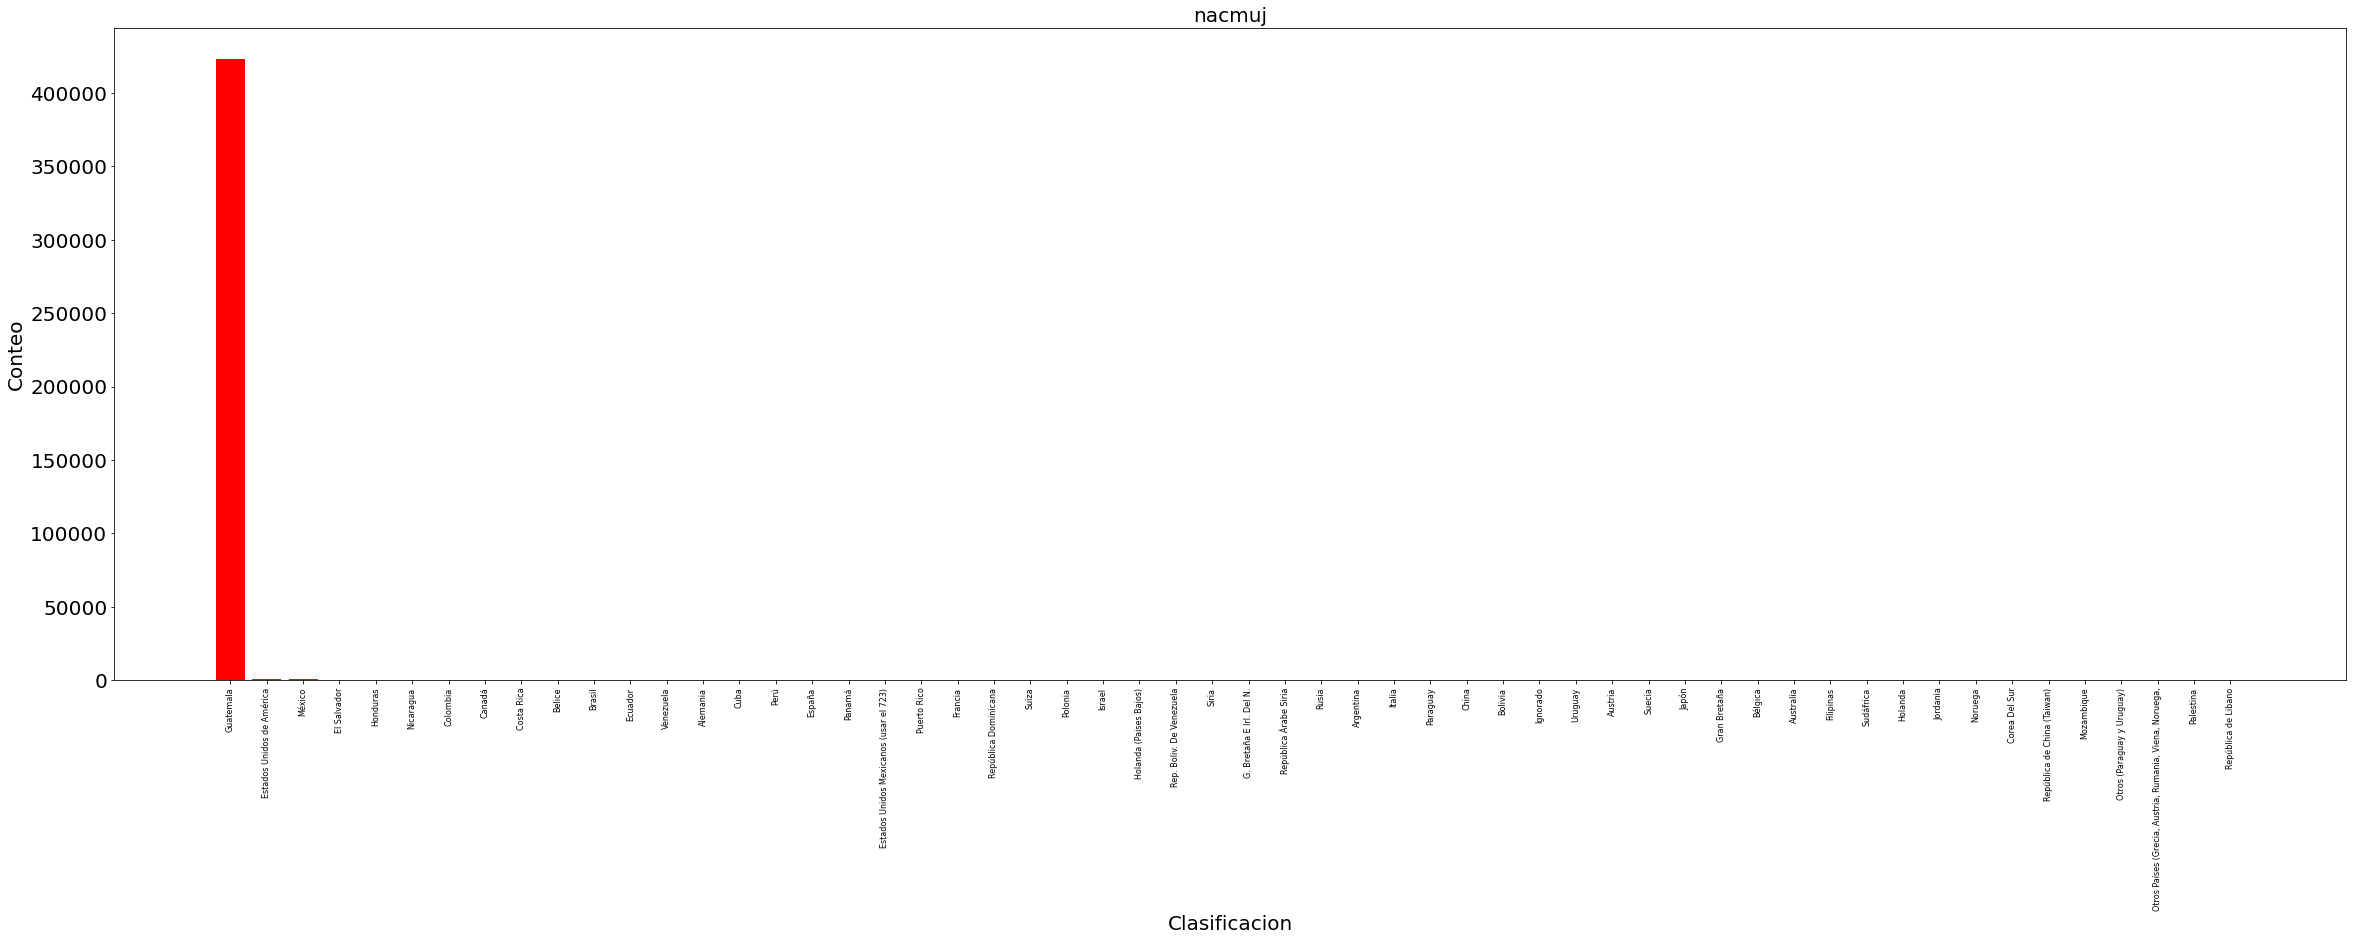

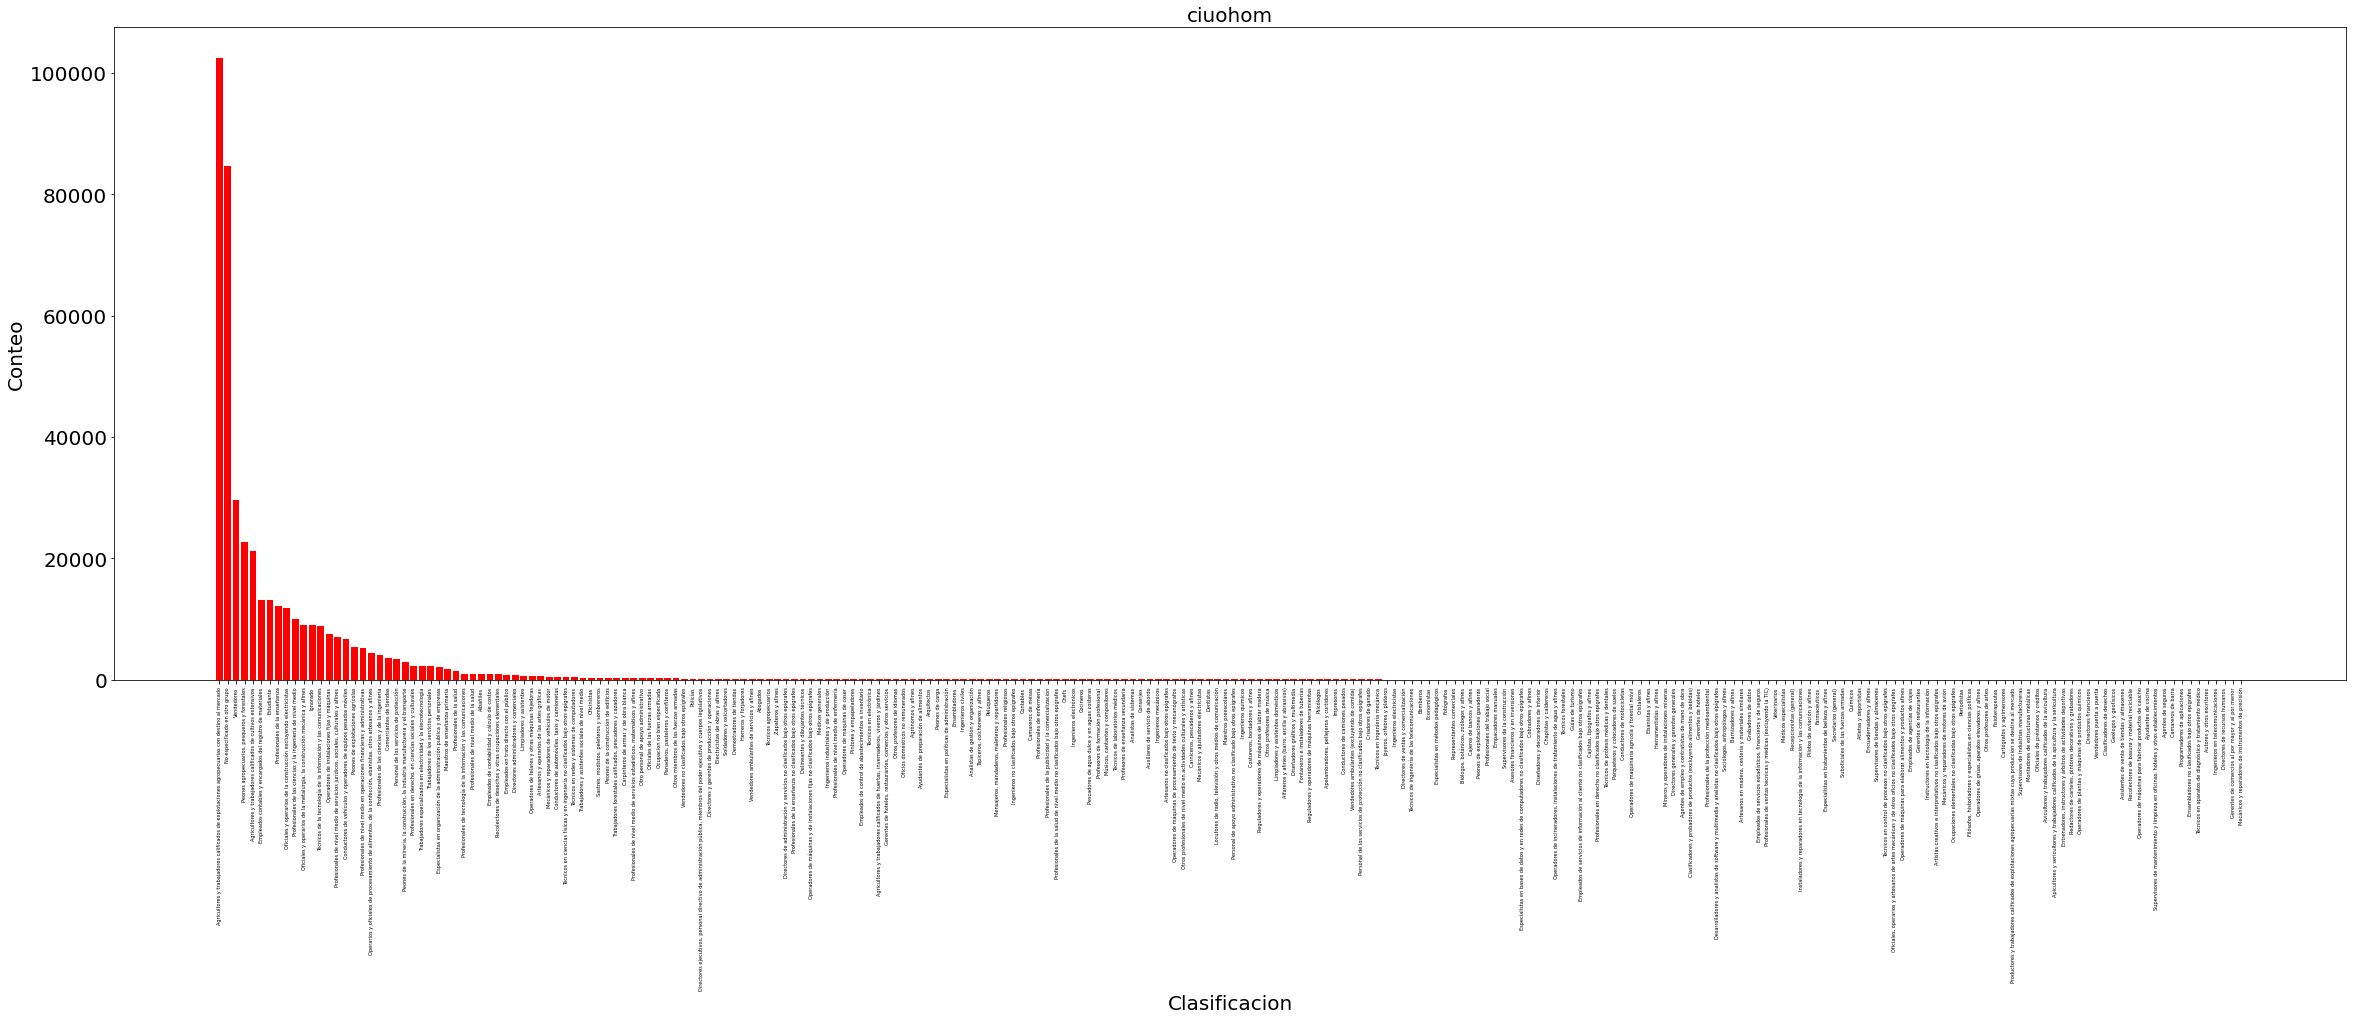

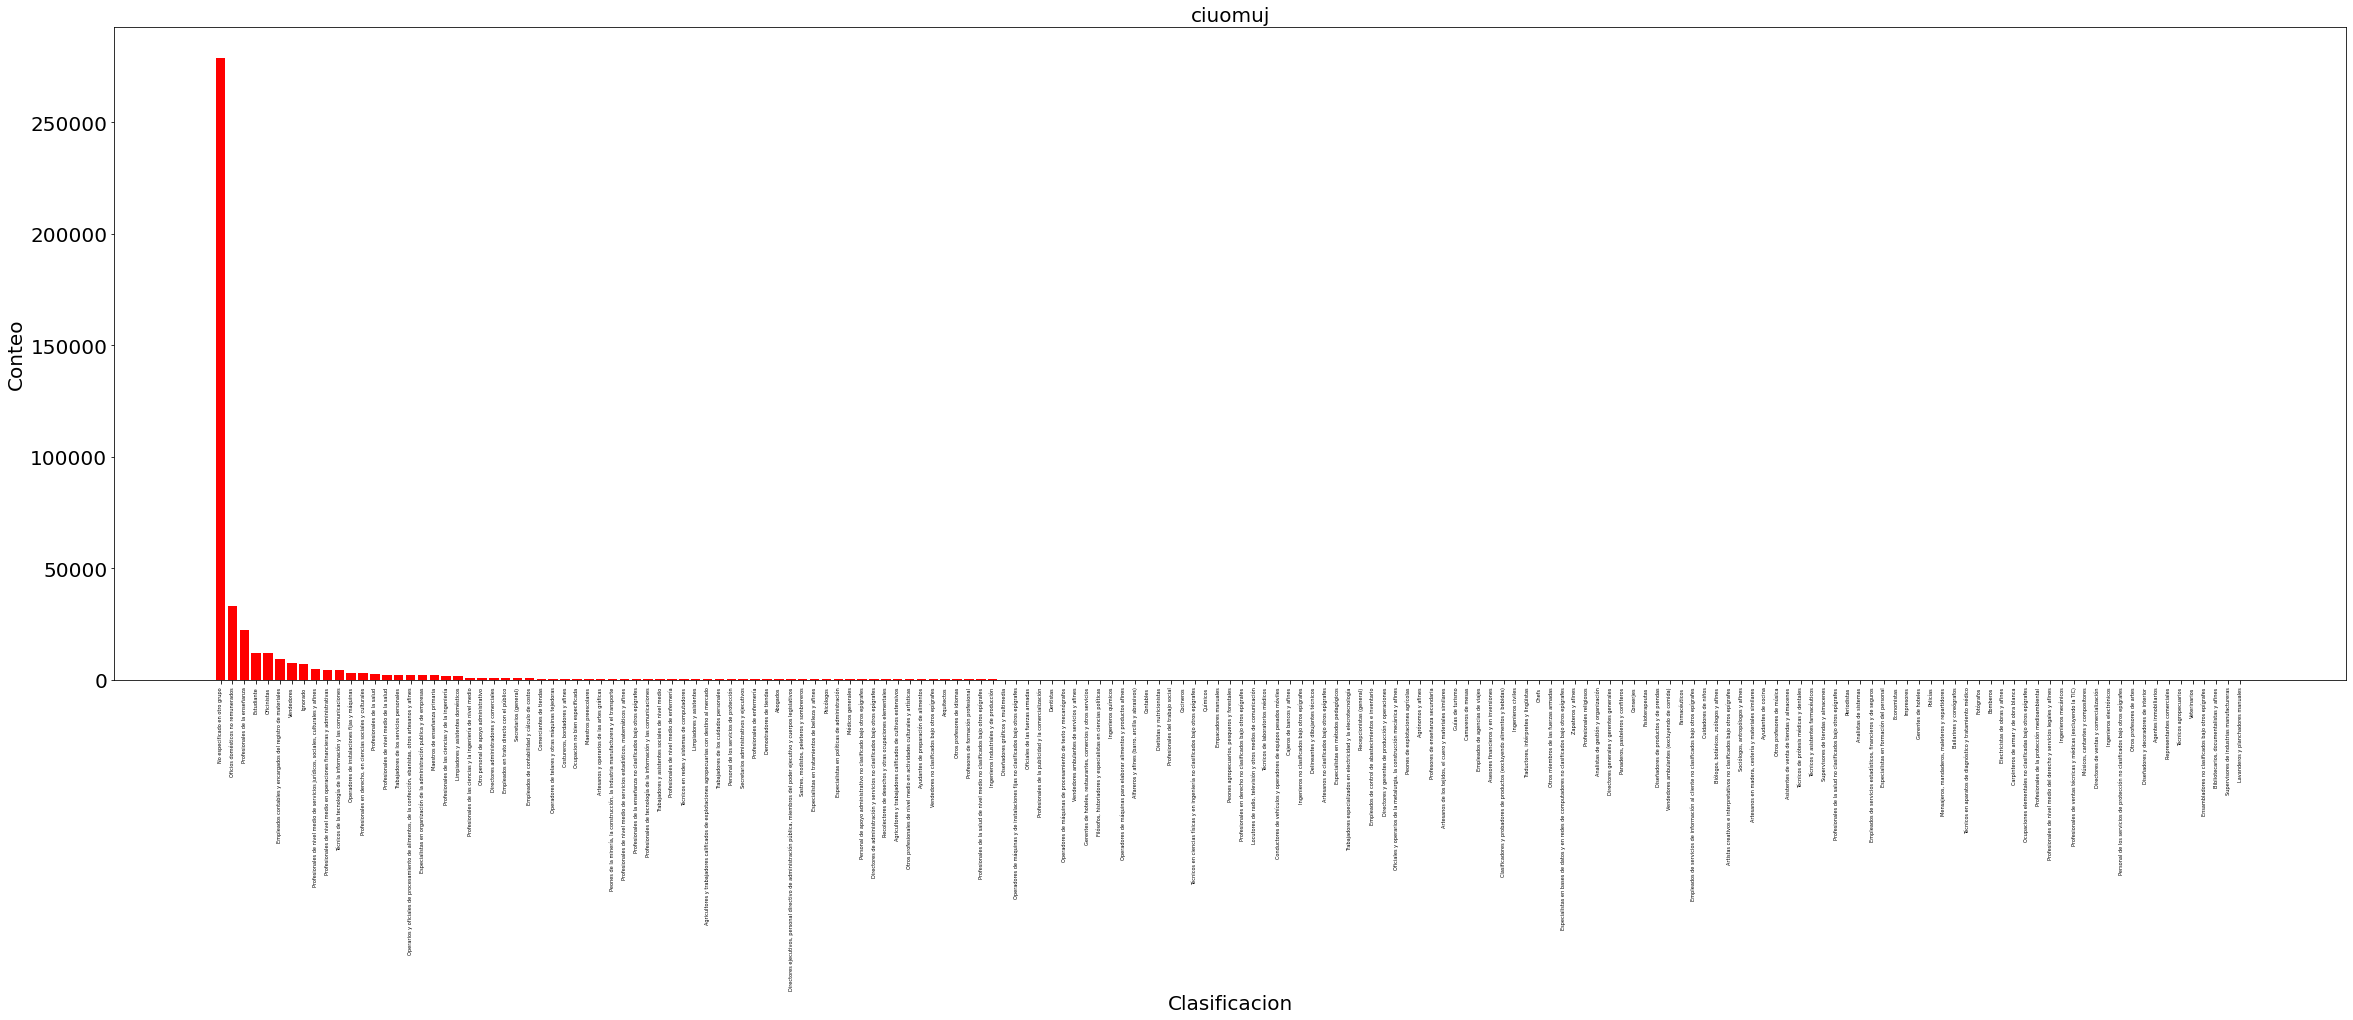

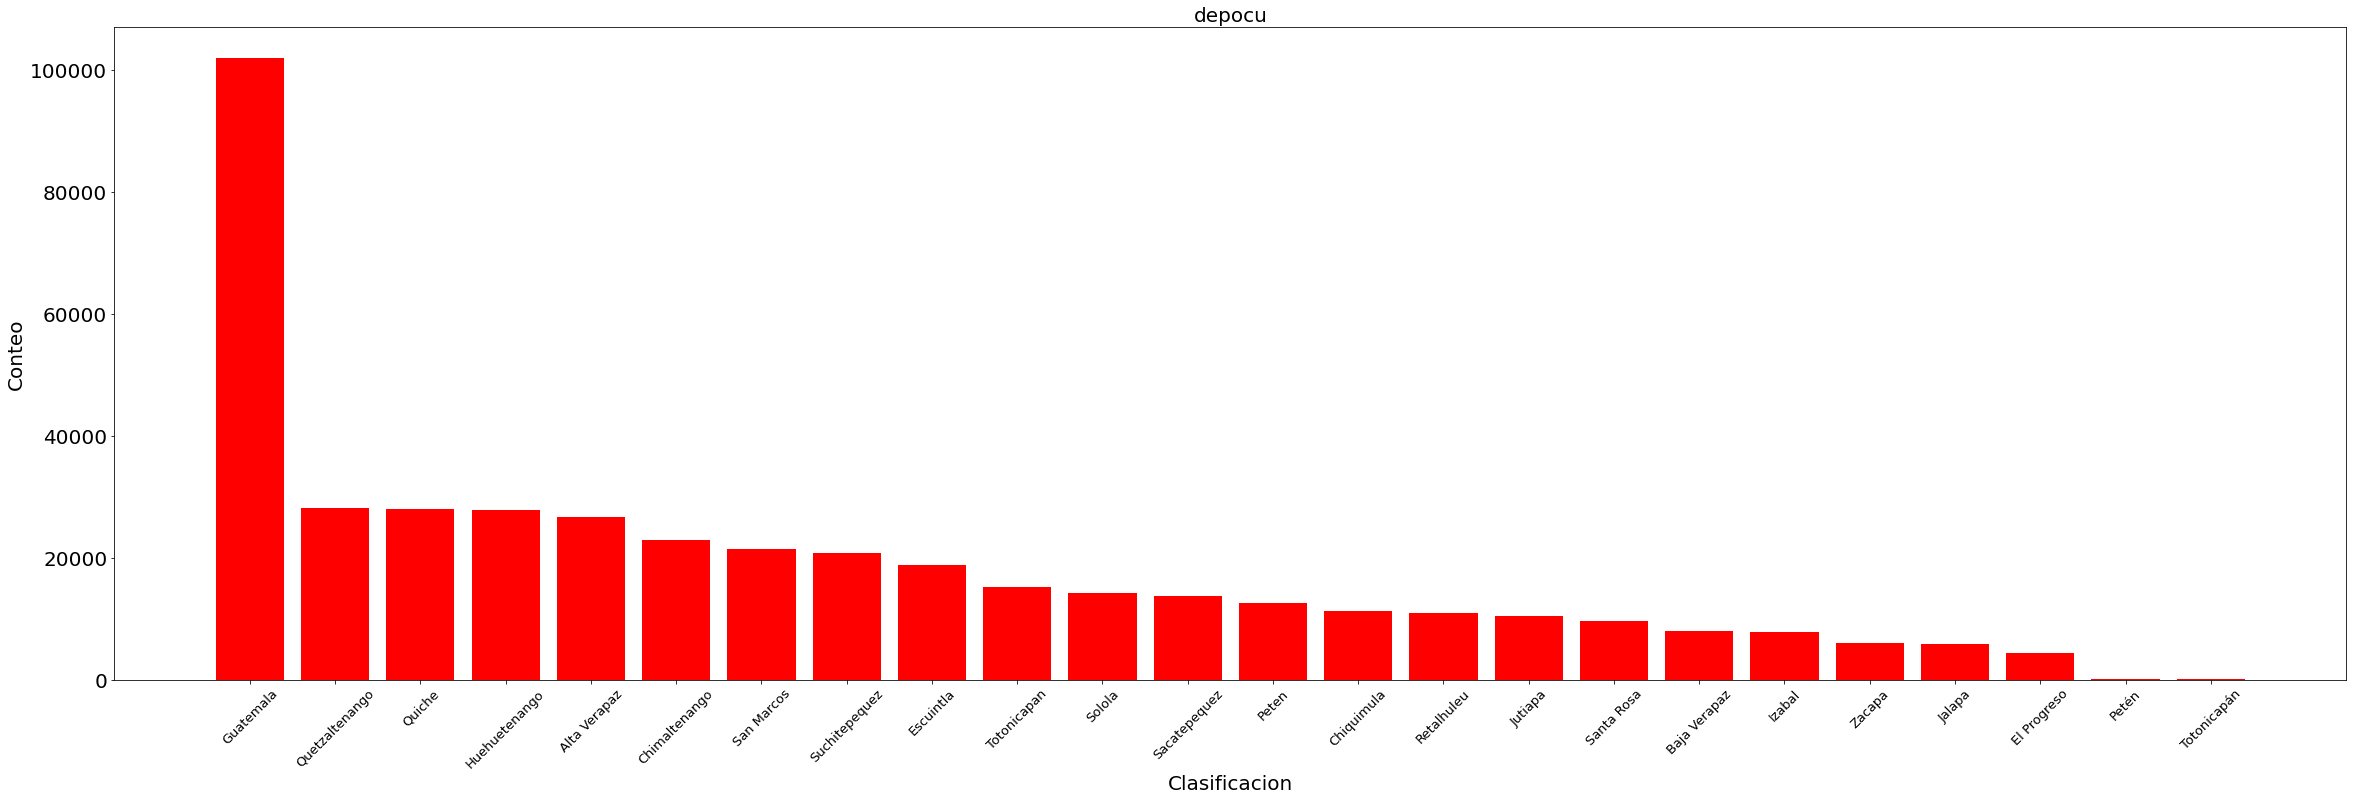

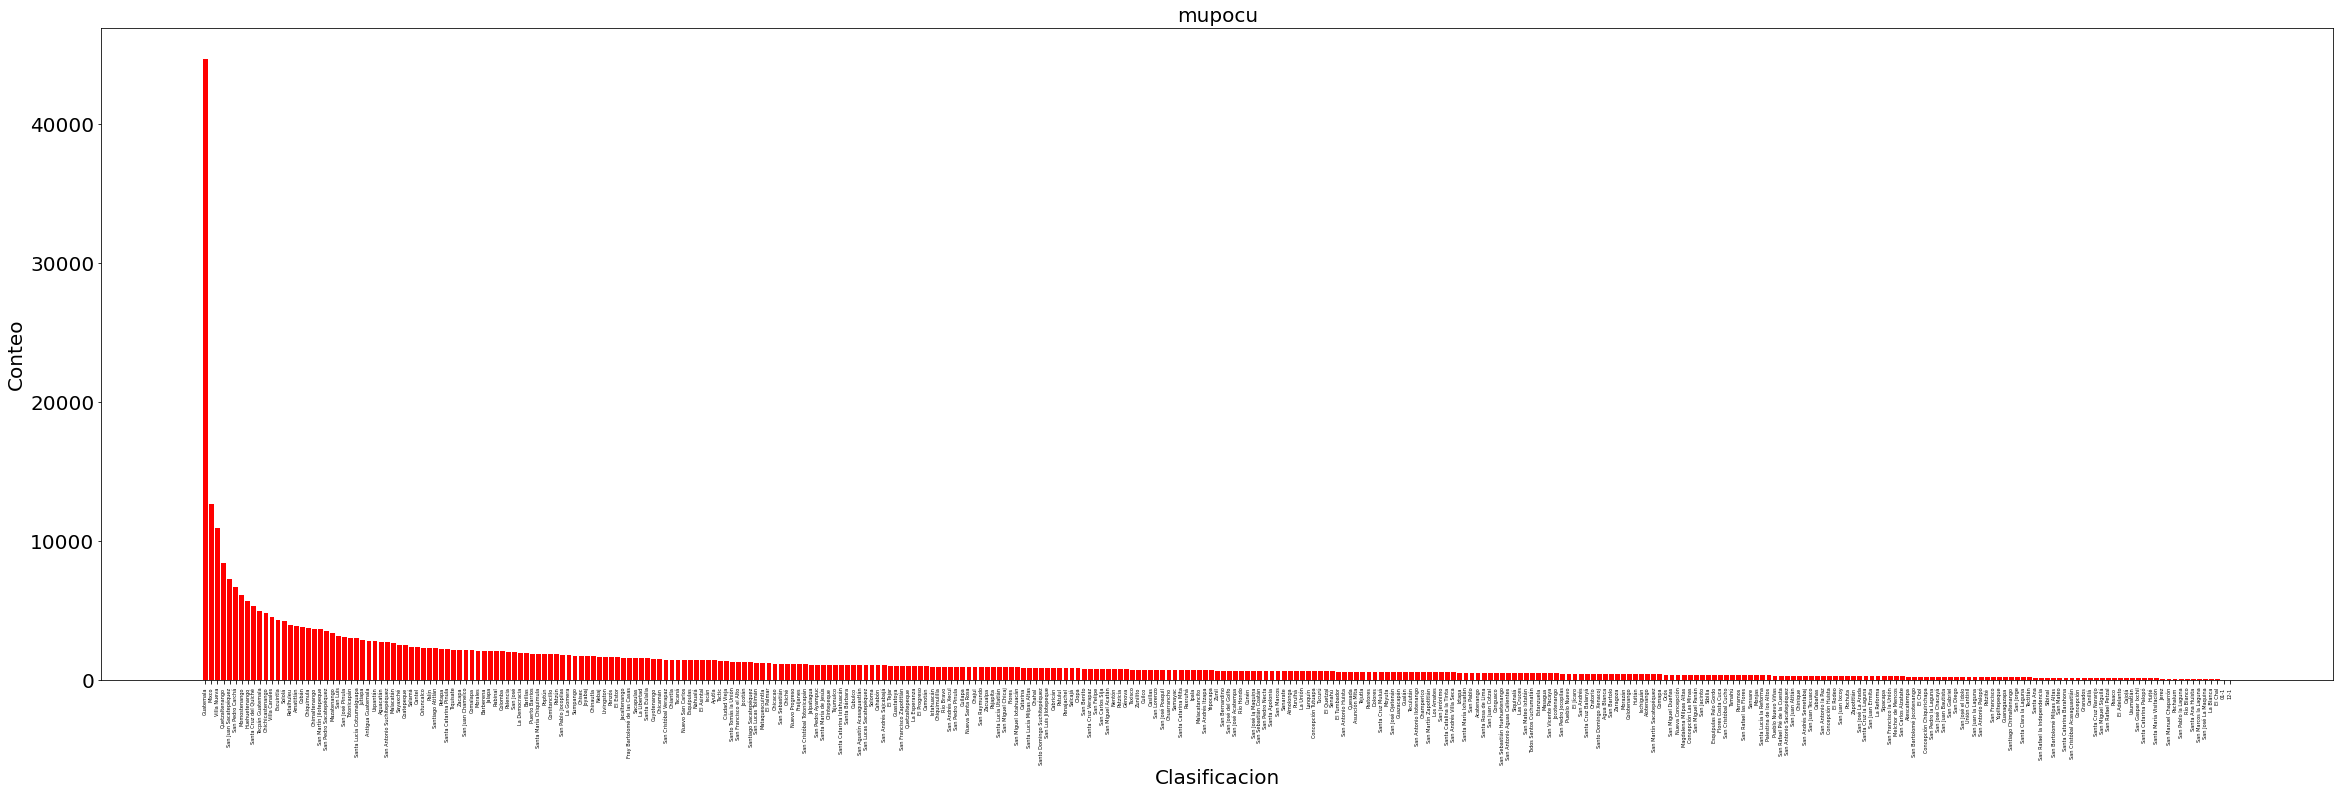

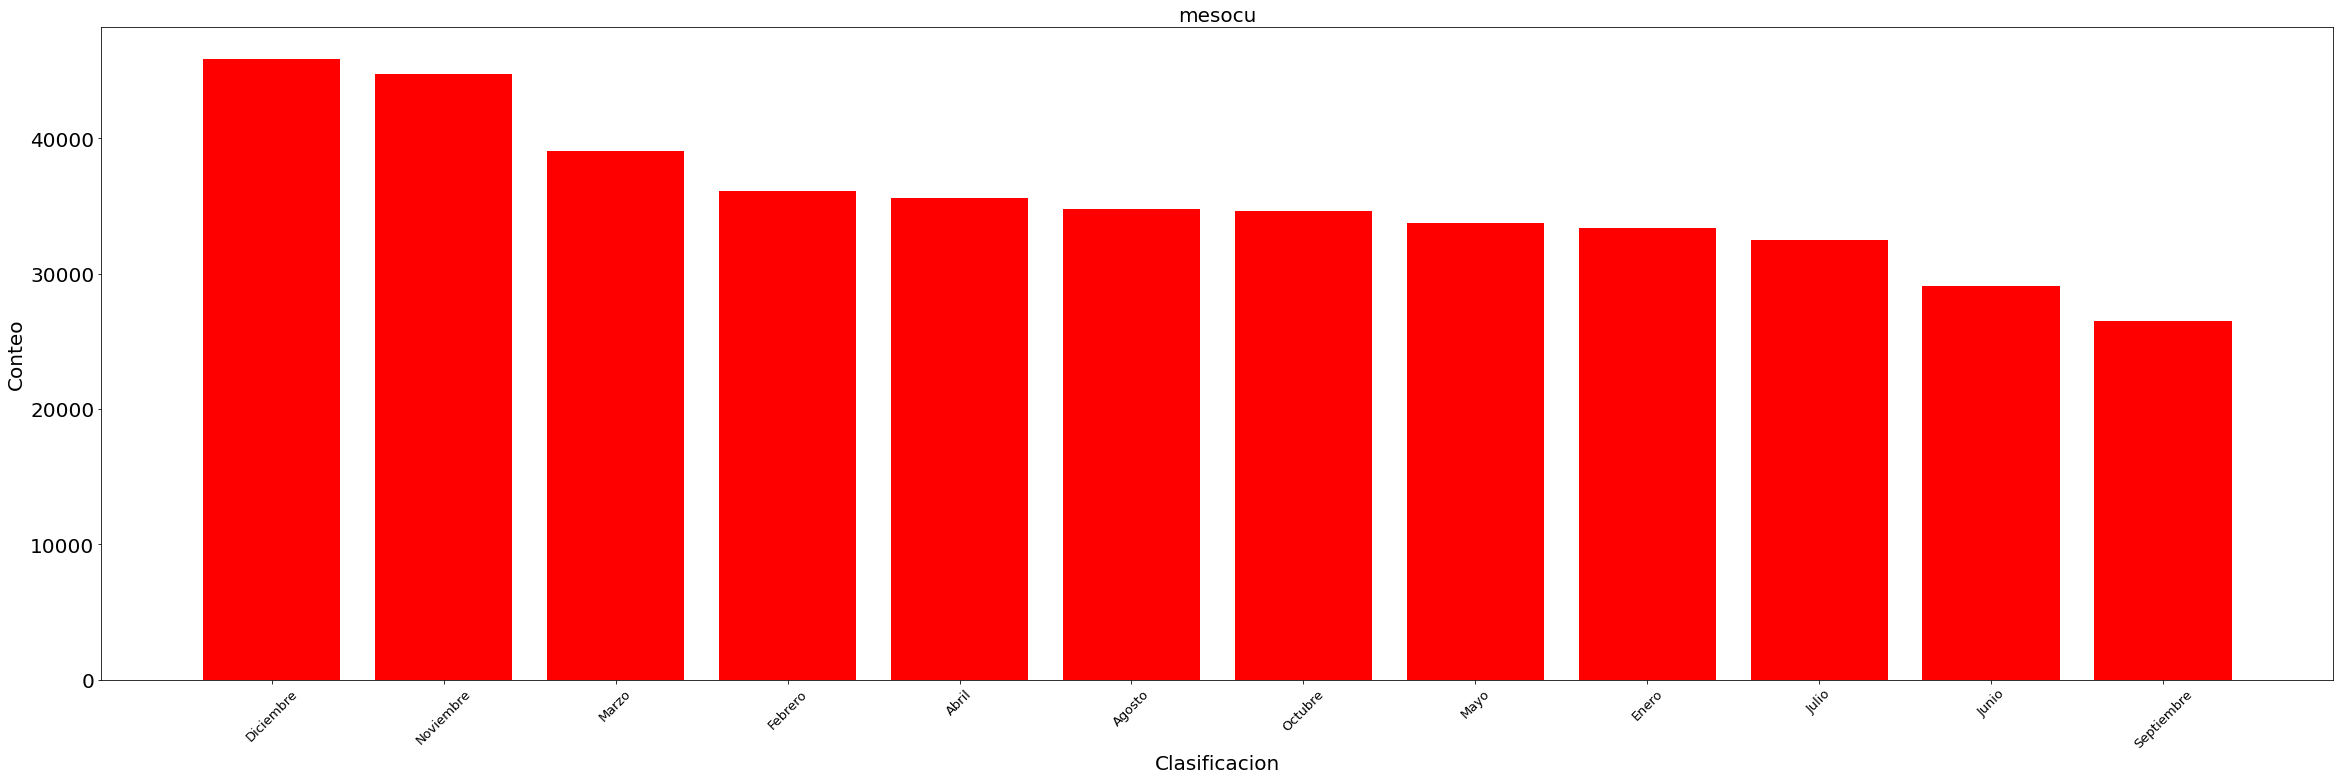

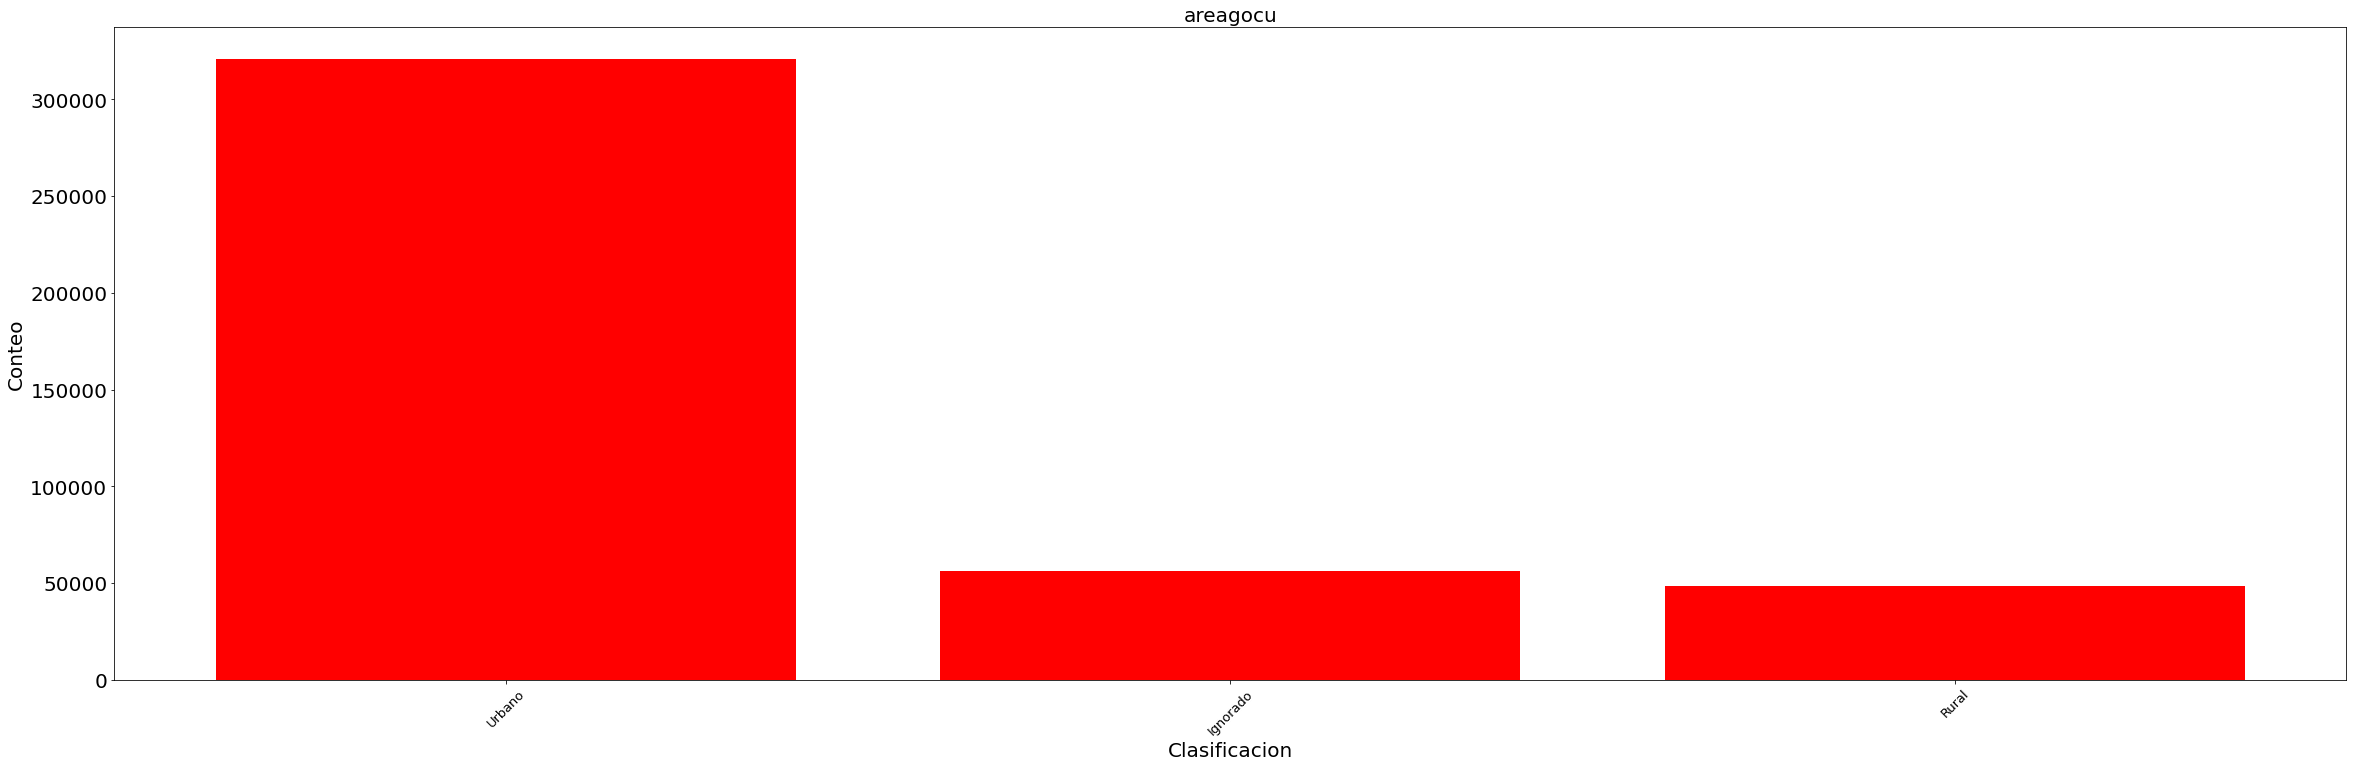

In [30]:
for columna in columnas:
    count = matrimonios_cualitativos[columna].value_counts().sort_values(ascending=False).reset_index()
    count = count.rename(columns={"index": columna, columna: "Count"})
    
    if columna == 'mupreg' or columna == 'mupocu' or columna == 'ciuohom' or columna == 'ciuomuj':  
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(rotation=90, size=5)
        plt.yticks(size=20)
        plt.show()
    elif columna == 'nachom' or columna == 'nacmuj':
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(rotation=90, size=8)
        plt.yticks(size=20)
        plt.show()
    else:
        plt.figure(figsize=(40,12))
        plt.bar(count[columna], count['Count'], color='r')
        plt.title(columna, size=20)
        plt.xlabel('Clasificacion', size=20)
        plt.ylabel('Conteo', size=20)
        plt.xticks(rotation=45, size=13)
        plt.yticks(size=20)
        plt.show()

<b>Hallazgos de la gráfica de barras</b>

<ul>
    <li>La mayoria de registros y ocurrencias de matrimonios sucedieron en Guatemala, Guatemala.</li>
    <li>La mayoria de los mtrimonios se llevaron a cabo el mes de diciembre.</li>
    <li>Tanto del grupo de hombres como de mujeres, la mayoria de ellos pertecene al grupo étnico de los "mestizos".</li>
    <li>Tanto del grupo de hombres como de mujeres, la mayoria, por bastante diferencia tenia nacionalidad Guatemalteca, en         segundo lugar eran de nacionalidad estadounidense y como tercer lugar tenia nacionalidad mexicana</li>
    <li>Tanto del grupo de hombres como de mujeres, la escolaridad para la mayoria dichos grupos era de primaria.</li>
    <li>La area geografica de la mayoria de las personas que contrageron matrimonio es del area urbana.</li>
</ul>

In [31]:
matrimonios.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
anoreg,425952.0,2013.826250,1.546288,2010.0,2013.0,2014.0,2015.0,2016.0
edadhom,425304.0,25.893215,5.819883,12.0,21.0,25.0,29.0,48.0
edadmuj,425314.0,23.656430,5.431138,11.0,20.0,23.0,27.0,39.0
puehom,425952.0,1.400287,0.762002,0.0,1.0,1.0,2.0,3.0
puemuj,425952.0,1.351718,0.789254,0.0,1.0,1.0,2.0,3.0
nunuho,425952.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
nunumu,425952.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
anoocu,246991.0,2013.956302,1.972961,2009.0,2015.0,2015.0,2015.0,2015.0
eschom,425952.0,1.739926,1.173746,0.0,1.0,2.0,3.0,5.0
escmuj,425952.0,1.610698,1.234682,0.0,1.0,1.0,3.0,5.0


In [32]:
matrimonios.describe(include=["O"]).transpose()

,count,unique,top,freq
depreg,425952,24,Guatemala,104587
mupreg,425952,333,Guatemala,61217
mesreg,425952,12,Diciembre,43582
clauni,425952,5,Comunidad de gananciales,359237
nachom,425952,73,Guatemala,423564
nacmuj,425952,56,Guatemala,423193
ciuohom,425952,240,Agricultores y trabajadores calificados de exp...,102426
ciuomuj,425952,171,No especificado en otro grupo,278813
depocu,425952,24,Guatemala,101886
mupocu,425952,335,Guatemala,44711


In [33]:
result = matrimonios.groupby('eschom').nunique()
result

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,nunuho,nunumu,depocu,mupocu,mesocu,anoocu,areagocu,escmuj,diaocu,edad_dif
eschom,,,,,,,,,,,,,,,,,,,,,,,
0.0,24,333,12,7,5,36,29,4,4,60,33,210,144,1,1,24,333,12,4,3,6,31,14
1.0,22,333,12,7,4,35,29,4,4,8,12,143,94,1,1,22,334,12,3,3,6,31,14
2.0,22,333,12,7,4,35,28,4,4,12,14,134,76,1,1,22,333,12,3,3,6,31,14
3.0,22,332,12,7,4,33,28,4,4,29,33,147,109,1,1,22,333,12,3,3,6,31,14
4.0,22,294,12,7,4,31,27,4,4,37,35,98,80,1,1,22,300,12,3,3,6,31,14
5.0,16,25,12,4,3,24,18,3,3,5,3,13,13,1,1,14,30,12,1,3,6,31,14


In [34]:
divorcios

,depreg,mupreg,mesreg,anoreg,diaocu,mesocu,anoocu,depocu,mupocu,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,eschom,escmuj
3006,Guatemala,Guatemala,Marzo,2010,16,Febrero,2010,Guatemala,Guatemala,42.0,31.0,Ignorado,Ignorado,Guatemala,Guatemala,Diseñadores gráficos y multimedia,Directores de administración y servicios no cl...,Diversificado,Ignorado
3007,Guatemala,Guatemala,Octubre,2010,25,Agosto,2010,Guatemala,Guatemala,47.0,36.0,Ignorado,Ignorado,Guatemala,Guatemala,Comerciantes de tiendas,Directores de administración y servicios no cl...,Ninguna,Ninguna
3008,Guatemala,Guatemala,Agosto,2010,20,Mayo,2010,Guatemala,Guatemala,NaN,NaN,Ignorado,Ignorado,Estados Unidos de América,México,Estudiante,Directores de administración y servicios no cl...,Ignorado,Ignorado
3009,Alta Verapaz,Cobán,Marzo,2010,28,Enero,2010,Alta Verapaz,Cobán,23.0,37.0,No indigena,No indigena,Guatemala,Guatemala,Estudiante,Directores de ventas y comercialización,Ignorado,Básico
3010,Guatemala,Guatemala,Octubre,2010,23,Junio,2010,Guatemala,Guatemala,NaN,NaN,Ignorado,Ignorado,Guatemala,Guatemala,Vendedores no clasificados bajo otros epígrafes,"Gerentes de sucursales de bancos, de servicios...",Ignorado,Ignorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60621,Sacatepequez,Antigua Guatemala,Diciembre,2011,12,Septiembre,2011,Sacatepequez,Antigua Guatemala,NaN,NaN,No indigena,No indigena,Guatemala,Estados Unidos de América,Ignorado,Ignorado,Ignorado,Ignorado
60622,Suchitepequez,Mazatenango,Julio,2011,27,Mayo,2011,Suchitepequez,Mazatenango,49.0,NaN,No indigena,Ignorado,Guatemala,Estados Unidos de América,Agricultores y trabajadores calificados de cul...,Secretarios (general),Universitario,Ignorado
60623,Solola,Panajachel,Diciembre,2011,1,Diciembre,2011,Solola,Sololá,NaN,NaN,Ignorado,Ignorado,Estados Unidos de América,Estados Unidos de América,Ignorado,Ignorado,Ignorado,Ninguna
60624,Solola,Santa Cruz la Laguna,Enero,2012,5,Diciembre,2011,Solola,Santa Cruz la Laguna,47.0,49.0,No indigena,No indigena,Francia,Estados Unidos de América,"Filósofos, historiadores y especialistas en ci...",Especialistas en tratamientos de belleza y afines,Universitario,Universitario


### Correlacion de variables en dataset Matrimonio

<AxesSubplot:>

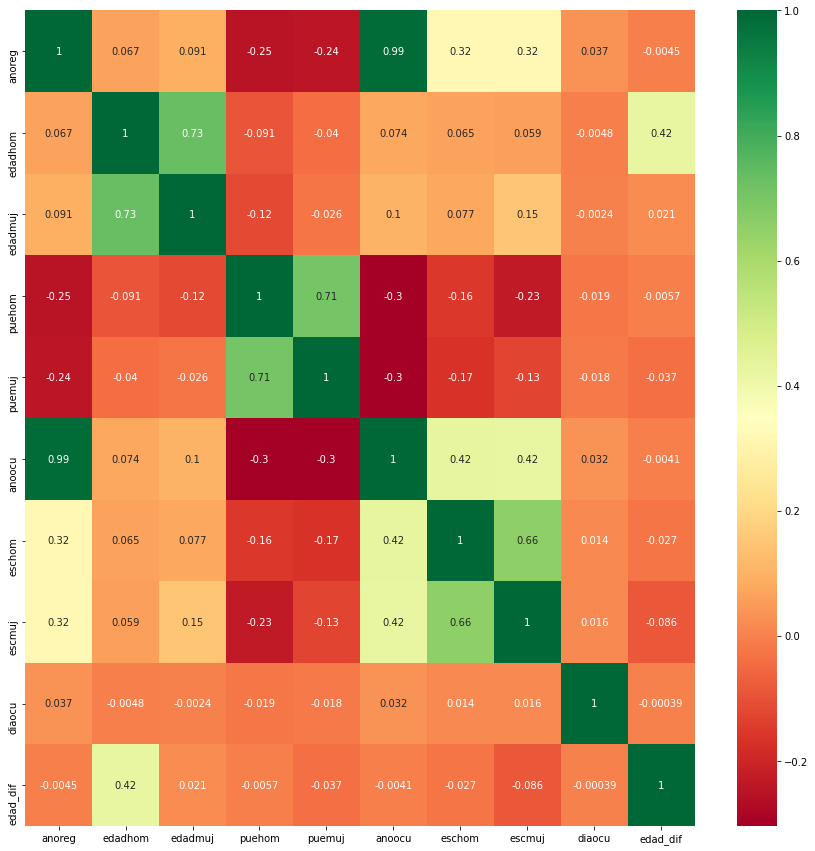

In [35]:
matrimonios1 = matrimonios.copy()
drop_colummns = ['nunuho','nunumu']
matrimonios1 = matrimonios1.drop(drop_colummns, axis=1)


correlacion = matrimonios1.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
cmap = plt.get_cmap('RdYlGn').copy()
cmap.set_bad('lightblue')
sns.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns,annot=True, ax=ax,cmap=cmap)

In [36]:
matrimonios.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False).describe()

,anoreg,edadhom,edadmuj,puehom,puemuj,nunuho,nunumu,anoocu,eschom,escmuj,diaocu,edad_dif
count,239922.000000,239922.000000,239922.000000,239922.000000,239922.000000,239922.0,239922.0,239922.000000,239922.000000,239922.000000,239922.000000,239922.000000
mean,2014.203445,25.971741,23.777636,1.442723,1.397108,0.0,0.0,2014.100274,1.767424,1.655576,16.375805,3.599011
std,1.825945,5.797392,5.417288,0.846793,0.868366,0.0,0.0,1.809899,1.191369,1.242450,8.521436,2.968437
min,2010.000000,12.000000,11.000000,0.000000,0.000000,0.0,0.0,2010.000000,0.000000,0.000000,1.000000,0.000000
25%,2015.000000,22.000000,20.000000,1.000000,1.000000,0.0,0.0,2015.000000,1.000000,1.000000,9.000000,1.000000
50%,2015.000000,25.000000,23.000000,1.000000,1.000000,0.0,0.0,2015.000000,2.000000,1.000000,17.000000,3.000000
75%,2015.000000,29.000000,27.000000,2.000000,2.000000,0.0,0.0,2015.000000,3.000000,3.000000,24.000000,5.000000
max,2016.000000,48.000000,39.000000,3.000000,3.000000,0.0,0.0,2015.000000,5.000000,5.000000,31.000000,13.000000


In [37]:
divorcios.head()

,depreg,mupreg,mesreg,anoreg,diaocu,mesocu,anoocu,depocu,mupocu,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,eschom,escmuj
3006,Guatemala,Guatemala,Marzo,2010,16,Febrero,2010,Guatemala,Guatemala,42.0,31.0,Ignorado,Ignorado,Guatemala,Guatemala,Diseñadores gráficos y multimedia,Directores de administración y servicios no cl...,Diversificado,Ignorado
3007,Guatemala,Guatemala,Octubre,2010,25,Agosto,2010,Guatemala,Guatemala,47.0,36.0,Ignorado,Ignorado,Guatemala,Guatemala,Comerciantes de tiendas,Directores de administración y servicios no cl...,Ninguna,Ninguna
3008,Guatemala,Guatemala,Agosto,2010,20,Mayo,2010,Guatemala,Guatemala,NaN,NaN,Ignorado,Ignorado,Estados Unidos de América,México,Estudiante,Directores de administración y servicios no cl...,Ignorado,Ignorado
3009,Alta Verapaz,Cobán,Marzo,2010,28,Enero,2010,Alta Verapaz,Cobán,23.0,37.0,No indigena,No indigena,Guatemala,Guatemala,Estudiante,Directores de ventas y comercialización,Ignorado,Básico
3010,Guatemala,Guatemala,Octubre,2010,23,Junio,2010,Guatemala,Guatemala,NaN,NaN,Ignorado,Ignorado,Guatemala,Guatemala,Vendedores no clasificados bajo otros epígrafes,"Gerentes de sucursales de bancos, de servicios...",Ignorado,Ignorado


### Correlacion de variables en dataset Divorcios

<AxesSubplot:>

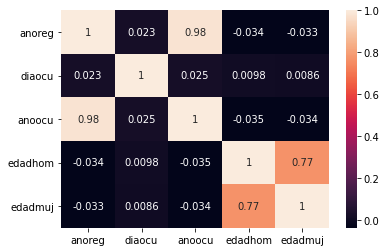

In [38]:
correlacion = divorcios.corr()
fig, axis = plt.subplots()
sns.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

### Muestra representativa de la población matrimonios

In [39]:
sample_mat = matrimonios1.copy().dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#crear lista vacia y recorer las columnas, 
list_of_columns = []
for col in matrimonios1.columns:
    list_of_columns.append(sample_mat[col])

#crear una nueva columan haciendo un zip de todas las columnas
sample_mat["combinados"] = list(zip(*list_of_columns))

#crear un df con el value_counts de las combinaciones
combined_weight = sample_mat['combinados'].value_counts(normalize=True)
#crear una columnna usuando el valor de cada combinacion
sample_mat['peso_combinado'] = sample_mat['combinados'].apply(lambda x: combined_weight[x])
#crear un sample de 50 muestras usando como peso las combinaciones
sample_mat = sample_mat.sample(50, weights=sample_mat['peso_combinado'])
sample_mat = sample_mat.drop(["peso_combinado"], axis=1)

sample_mat.describe()

,anoreg,edadhom,edadmuj,puehom,puemuj,anoocu,eschom,escmuj,diaocu,edad_dif
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2014.900000,25.260000,24.18000,1.320000,1.160000,2014.820000,2.040000,1.900000,16.220000,2.880000
std,0.952976,5.576225,5.40102,0.652781,0.710274,0.896478,0.988918,1.233048,9.274257,2.387382
min,2010.000000,17.000000,16.00000,0.000000,0.000000,2010.000000,0.000000,0.000000,1.000000,0.000000
25%,2015.000000,21.000000,20.00000,1.000000,1.000000,2015.000000,1.000000,1.000000,8.250000,1.000000
50%,2015.000000,24.000000,23.00000,1.000000,1.000000,2015.000000,2.000000,2.000000,16.500000,2.000000
75%,2015.000000,29.000000,27.00000,2.000000,2.000000,2015.000000,3.000000,3.000000,25.000000,4.000000
max,2016.000000,43.000000,38.00000,2.000000,2.000000,2015.000000,4.000000,4.000000,31.000000,11.000000


### Muestra representativa de la población divorcios

In [40]:
sample_div = divorcios.copy().dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

sample_div["combined"] = list(
    zip(
        sample_div["edadhom"],
        sample_div["edadmuj"],
        sample_div["anoreg"],
        sample_div["anoocu"],
    )
)

combined_weight = sample_div['combined'].value_counts(normalize=True)

sample_div['combined_weight'] = sample_div['combined'].apply(lambda x: combined_weight[x])

sample_div = sample_div.sample(50, weights=sample_div['combined_weight'])
sample_div = sample_div.drop(["combined_weight"], axis=1)

sample_div.describe()

,anoreg,diaocu,anoocu,edadhom,edadmuj
count,50.00000,50.00000,50.000000,50.000000,50.000000
mean,2015.04000,14.96000,2014.920000,31.560000,28.920000
std,0.66884,8.48278,0.565685,6.054716,6.660392
min,2011.00000,2.00000,2011.000000,23.000000,17.000000
25%,2015.00000,8.00000,2015.000000,27.000000,23.000000
50%,2015.00000,16.00000,2015.000000,30.500000,28.500000
75%,2015.00000,22.50000,2015.000000,36.000000,33.500000
max,2016.00000,30.00000,2015.000000,43.000000,43.000000


### Análisis de agrupamiento

Las variables con mayor correlación para el dataset de matrimonio son:
- Edades de mujer vs edades de hombres
- Número de nupcias contraídas por el hombre vs número de nupcias contraídas por la mujer

En el caso del dataset de divorcios, estas son las variables con mayor correlación:
- Edades de mujer vs edades de hombres 

Por lo tanto, estas variables serán candidatas para el análisis de agrupamiento

Adicionalmente, las variables de año de ocurrencia vs año de registro tienen demasiada correlación, pero los datos muestran que son prácticamente la misma información, por lo que no vale la pena considerar su agrupamiento.

#### Agrupamiento edad de hombres vs edad de mujeres en matrimonios

In [41]:
edades_matrimonio = matrimonios[["edadhom", "edadmuj"]]

# remove Nan
edades_matrimonio = edades_matrimonio.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# convert to int
edades_matrimonio = edades_matrimonio.astype(int)

pyclustertend.hopkins(edades_matrimonio, len(edades_matrimonio))

1.621704788508114e-05

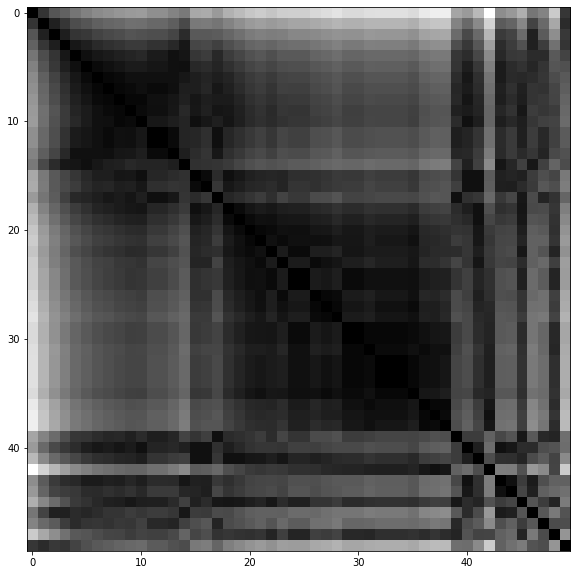

In [42]:
edades_matrimonio_sam = sample_mat[["edadhom", "edadmuj"]]

pyclustertend.vat(edades_matrimonio_sam)

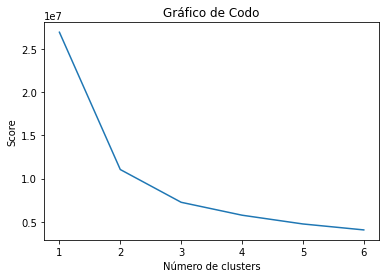

Numero indicado de clusters: 3


In [43]:
numeroClusters = range(1,7)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(edades_matrimonio)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

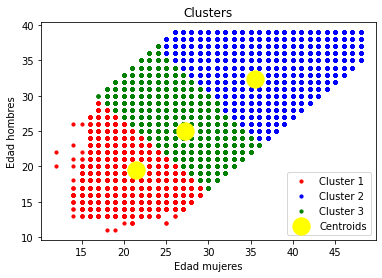

In [44]:
kmeans = cluster.KMeans(n_clusters = 3)
X = matrimonios.iloc[:, [5, 6]].dropna().values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Edad hombres')
plt.xlabel('Edad mujeres')
plt.legend()
plt.show()

Los resultados anteriores demuestran que las variables edad hombres y edad mujeres en el matrimonio pueden categorizarse en 3 clusters distintos. La relación muestra que en la primer categoría las parejas son jóvenes, seunda categoría las parejas son parejas más grandes, y la tercera parejas ancianas. De aquí se concluye que la mayoría de parejas se casa cuando forman parte del último cluster, a una edad avanzada.

#### Agrupamiento número de nupcias contraídas por el hombre vs número de nupcias contraídas por la mujer en matrimonios

In [ ]:
nupcias_matrimonio = matrimonios[["nunuho", "nunumu"]]

# remove Nan
nupcias_matrimonio = nupcias_matrimonio.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# convert to int
nupcias_matrimonio = nupcias_matrimonio.astype(int)

pyclustertend.hopkins(nupcias_matrimonio, len(nupcias_matrimonio))

In [ ]:
numeroClusters = range(1,7)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(nupcias_matrimonio)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 2')

In [ ]:
kmeans = cluster.KMeans(n_clusters = 2)
X = matrimonios.iloc[:, [13, 14]].values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Nupcias hombres')
plt.xlabel('Nupcias mujeres')
plt.legend()
plt.show()

En cuando a la cantidad de nupcias para hombres y mujeres, se pueden categorizar en 2 clusters, pero lamentablemente la mayoría de registros en este set de datos son inválidos o nulos, por lo que no se tiene la suficiente información para interpretar estos grupos.

## Agrupamiento de puebhom vs puebmuj en matrimonios

In [ ]:
pueblos_matrimonio = matrimonios[["puehom", "puemuj"]]

In [ ]:
pueblos_matrimonio = matrimonios[["puehom", "puemuj"]]

# remove Nan
pueblos_matrimonio = pueblos_matrimonio.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# convert to int
pueblos_matrimonio = pueblos_matrimonio.astype(int)

pyclustertend.hopkins(pueblos_matrimonio, len(pueblos_matrimonio))

In [ ]:
pueblos_matrimonio_sam = sample_mat[["puehom", "puemuj"]]

pyclustertend.vat(pueblos_matrimonio_sam)

In [ ]:
numeroClusters = range(1,7)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(pueblos_matrimonio)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 2')

In [ ]:
kmeans = cluster.KMeans(n_clusters = 2)
X = np.array(matrimonios[["puehom", "puemuj"]].dropna().values)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Raza hombres')
plt.xlabel('Raza mujeres')
plt.legend()
plt.show()

## Agrupamiento de escolaridad hombres vs escolaridad mujeres en matrimonios

In [ ]:
esco_matrimonio = matrimonios[["eschom", "escmuj"]].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
esco_matrimonio = matrimonios[["eschom", "escmuj"]]

# remove Nan
esco_matrimonio = esco_matrimonio.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# convert to int
esco_matrimonio = esco_matrimonio.astype(int)

pyclustertend.hopkins(esco_matrimonio, len(esco_matrimonio))

In [ ]:
esco_matrimonio_sam = sample_mat[["eschom", "escmuj"]]

pyclustertend.vat(esco_matrimonio_sam)

In [ ]:
numeroClusters = range(1,7)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(esco_matrimonio)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 2')

In [ ]:
kmeans = cluster.KMeans(n_clusters = 2)
X = np.array(matrimonios[["eschom", "escmuj"]].dropna().values)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Escolaridad hombres')
plt.xlabel('Escolaridad mujeres')
plt.legend()
plt.show()

## Agrupamiento de edades de mujer y hombres y la diferencia entre los matrimonios

In [ ]:
dif_matrimonio = matrimonios[["edad_dif", "edadhom", "edadmuj"]].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
dif_matrimonio = matrimonios[["edad_dif", "edadhom", "edadmuj"]]

# remove Nan
dif_matrimonio = dif_matrimonio.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# convert to int
dif_matrimonio = dif_matrimonio.astype(int)

pyclustertend.hopkins(dif_matrimonio, len(dif_matrimonio))

In [ ]:
dif_matrimonio_sam = sample_mat[["eschom", "escmuj"]]

pyclustertend.vat(dif_matrimonio_sam)

In [ ]:
numeroClusters = range(1,7)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dif_matrimonio)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 2')

In [ ]:
kmeans = cluster.KMeans(n_clusters = 3)
X = np.array(matrimonios[["edad_dif", "edadhom", "edadmuj"]].dropna().values)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Escolaridad hombres')
plt.xlabel('Escolaridad mujeres')
plt.legend()
plt.show()

#### Agrupamiento edad de hombres vs edad de mujeres en divorcios

In [ ]:
edades_divorcio = divorcios[["edadhom", "edadmuj"]]

# remove Nan
edades_divorcio = edades_divorcio.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# convert to int
edades_divorcio = edades_divorcio.astype(int)

pyclustertend.hopkins(edades_divorcio, len(edades_divorcio))

In [ ]:
edades_divorcio_sam = sample_div[["edadhom", "edadmuj"]]

pyclustertend.vat(edades_divorcio_sam)

In [ ]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(edades_divorcio_sam)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

print('Numero indicado de clusters: 3')

In [ ]:
kmeans = cluster.KMeans(n_clusters = 3)
X = divorcios.iloc[:, [9, 10]].dropna().values
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.ylabel('Edad hombres')
plt.xlabel('Edad mujeres')
plt.legend()
plt.show()

Los divorcios se pueden categorizar en 3 clusters según la edad del hombre y la edad de la mujer. El primer cluster son las parejas jóvenes, el segundo cluster las parejas mayores, y el tercer cluster las parejas ancianas. Se puede concluir que la mayoría de parejas se encuentra en el cluster de los jóvenes, lo que implica que se divorcian a tempranas edades.

### Describa la situación problemática que lo lleva a acotar un problema a resolver.
El enfoque principal que nuestro grupo tomó fue determinar las características que se compartían entre los conjuntos de datos de Matrimonios y Divorcios y de esta forma buscarle una explicación del ¿Por qué ocurren una gran cantidad de Matrimonios/Divorcios y los aspectos que pueden llegar a tomar esta acción? 

### Enuncie un problema científico y unos objetivos preliminares.
El problema científico como tal es; Razones/Aspectos/Características que ocasionan la gran cantidad de Matrimonios/Divorcios en Guatemala

#### Objetivo General:
- Encontrar las razones/aspectos/características que ocasionan la cantidad de matrimonios/divorcios en Guatemala

#### Objetivos Preliminares
- Descubrir las características que comparten los conjuntos de Matrimonios y Divorcios en Guatemala
- Buscar posibles soluciones para uno de estos aspectos/razones/características.

### Describa los datos que tiene para responder el problema planteado. Esto incluye el ### estado en que encontró el o los conjuntos de datos y las operaciones de limpieza que ### le realizó, en caso de que hayan sido necesarias.
Los datos que tenemos pertenecen a dos conjuntos que almacenan Matrimonios/Divorcios, donde ambos son un recopilatorio de los años 2009 al 2020 de los distintos archivos .xslx. Dentro de estos se pueden encontrar información específica del hombre y mujer que pertenecen al matrimonio/divorcio. Estos son del tipo; Dia, mes, año registro, nacionalidades, lugar de nacimiento, residencia, entre otros.

Las operaciones de limpieza que tuvimos que ejecutar para tener los datos más significativos para nuestro análisis, consistieron en;
- Eliminar datos atípicos
- Eliminar datos que tuvieran más de alguna columna vacía
- Eliminación de columnas que no se encontraban en el código de variables del Instituto  Nacional de Estadístico(eschom, escmuj, mever, anover).
- Cambiar tipo de variables(str a int, float a int, y viceversa)

### Escriba unas conclusiones con los hallazgos encontrados durante el análisis exploratorio
En el conjunto de divorcios se halló que la mayoría de estas personas contrajeron matrimonio durante sus últimos años de estudio.
En el conjunto de matrimonios se halló que la mayoría de estos que contrajeron matrimonio, tenían un nivel de escolaridad de primaria.

Teniendo la variable edad como base para la realización de los clusters (junto a otras variables), se pudieron obtener resultados interesantes. Por lo tanto, con estos concluimos que:

- La mayoría de estas personas que se casaron jóvenes, con un nivel de escolaridad posiblemente bajo, seguramente se divorciaron al poco tiempo.

- La mayoría de personas que se han casado, han pertenecido a la zona urbana del país, donde se sufre de una fuerte carencia de estudios.

- Las razones/características/aspectos que afectan que haya tanta cantidad de personas casadas o divorciadas es la edad donde estos contrajeron matrimonio, pues fueron en edades en pleno desarrollo tales como los matrimonios en primaria o fueron en pleno descubrimiento de la vida adulta.
